# Clustering participants based on their prosume aspects

In [1]:
%%capture

# Boilerplate required to import other notebooks
import ipynb.fs

# From the full "data_preparation" notebook import function(s)
from .full.data_preparation import *

In [2]:
from sklearn.preprocessing import scale
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [3]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

## Defining the set of items which represent the prosume aspects of the survey

### In Spanish

In [4]:
def get_prosume_items_esp():
    # Creating lists that includes the items from the prosume construct

    all_prosume_items = ['Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos]',
                         'Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil]',
                         'Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta]',
                         # 'Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [Otro]',
                         '¿Con qué frecuencia haces fotografías?',
                         # 'En caso afirmativo, ¿compartes habitualmente las imágenes que tomas?',
                         'Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos)',
                         '¿Repites las imágenes hasta conseguir el resultado esperado?',
                         'En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?',
                         'Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?',
                         'Cuando compartes imágenes, ¿habitualmente las envías a otras personas?',
                         'Cuando compartes imágenes, ¿habitualmente las produces tú?',
                         'Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?',
                         'Si encuentras esta información visual sugerida, ¿cómo actúas?',
                         'Si tienes que crear una presentación de contenidos...',
                         'Si las buscas en Internet...',
                         # 'Si las generas tú...',
                         # 'Si las generas tú... [Otro]',
                         '¿Cuándo prosumes (produces y consumes) imágenes?',
                         'Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar]',
                         'Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro]',
                         'Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones]',
                         'Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras]',
                         'Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos]',
                         # 'Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [Otro]',
                         'Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan]',
                         'Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen]',
                         'Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología]',
                         'Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan]',
                         'Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio]',
                         'Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil]',
                         # 'Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [Otro]',
                         '¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas]',
                         '¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme]',
                         '¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa]',
                         '¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)]',
                         # '¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [Otro]',
                         '¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos]',
                         '¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia]',
                         '¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros]',
                         '¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos]',
                         '¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie]',
                         # '¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [Otro]',
                         'Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?',
                         '¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?',
                         # '¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)? [Otro]',
                         ]

    return all_prosume_items

### In English

In [5]:
def get_prosume_items_en():
    # Creating lists that includes the items from the prosume construct

    all_prosume_items = ['When you take a picture, what type of capture device do you use? (Multiple answer) [1. Photo camera]',
                         'When you take a picture, what type of capture device do you use? (Multiple answer) [2. Mobile phone]',
                         'When you take a picture, what type of capture device do you use? (Multiple answer) [3. Tablet]',
                         # 'When you take a picture, what type of capture device do you use? (Multiple answer) [Other]',
                         'How often do you produce images?',
                         # 'If yes, do you usually share the images it produces?',
                         'When you produce images, how much time do you spend preparing it? (minutes)',
                         'Do you repeat the images until you get the expected result?',
                         'In your environment, do people who use technology create images and share them?',
                         'When you share images, do you usually receive them from other people?',
                         'When you share images, do you usually send them to other people?',
                         'When you submit an image, have you treated an image that you have previously received or that has been generated by you?',
                         'Within your social networks or mobile applications, do you see visual information that you are not looking for (social awareness campaigns, jokes, advertising, etc.)?',
                         'If you find that suggested information, what is your attitude?',
                         'If you have to create a content presentation...',
                         'If you look for images in the Internet...',
                         # 'If you generate your own images ...',
                         # 'If you generate your own images ... [Other]',
                         'When do you prosume (produce and consume) images?',
                         'If you produce images, what do you use for? [1. In order to better understand the meaning of what I want to express]',
                         'If you produce images, what do you use for? [2. In order to better explain where I am]',
                         'If you produce images, what do you use for? [3. To express emotions]',
                         'If you produce images, what do you use for? [4. To save words]',
                         'If you produce images, what do you use for? [5. In order to share moments]',
                         # 'If you produce images, what do you use for? [Other]',
                         'If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [1. I do not like]',
                         'If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [2. I do not know how they are made]',
                         'If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [3. I do not use technology]',
                         'If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [4. When I share them, I do not know what they mean]',
                         'If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [5. Because they take up a lot of space]',
                         'If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [6. I find it useless]',
                         # 'If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [Other]',
                         'What images do you decide to share in social networks or other technological media? [1. Images I make to keep networks active]',
                         'What images do you decide to share in social networks or other technological media? [2. Images from day to day, which are part of my life, I use them to express myself]',
                         'What images do you decide to share in social networks or other technological media? [3. Referential images in order to show something informative]',
                         'What images do you decide to share in social networks or other technological media? [4. Images with which I intend to cause a reaction (eg. likes)]',
                         # 'What images do you decide to share in social networks or other technological media? [Other]',
                         'With whom do you usually share images? [1. Friends]',
                         'With whom do you usually share images? [2. Family]',
                         'With whom do you usually share images? [3. Partners]',
                         'With whom do you usually share images? [4. With all my acquaintances]',
                         'With whom do you usually share images? [5. With nobody]',
                         # 'With whom do you usually share images? [Other]',
                         'When you produce images, do you think about the image you want to create before doing it?',
                         'How much of your consumption of digital images comes from digital media (digital press, internet, television,etc.) and how much by analogical means?',
                         # 'How much of your consumption of digital images comes from digital media (digital press, internet, television,etc.) and how much by analogical means? [Other]',
                         ]

    return all_prosume_items

## Exploring possible clusters

These functions explore the main clusters available in a dataframe. Functions to manage the data (and column names) available in Spanish and English


Also, we include two examples to show how to use the functions

In [6]:
def test_find_clusters_prosume_en(dataframe):
    clusters = dataframe.copy(True)
    clusters = drop_text_columns_en(clusters)
    clusters = drop_optional_columns_en(clusters)

    all_prosume_items = get_prosume_items_en()

    my_subset = all_prosume_items
    clusters = clusters[sorted(clusters, key=lambda x: x not in my_subset)]

    columns_vC = clusters.columns.values.tolist()

    for item in all_prosume_items:
        columns_vC.remove(item)

    z_vCluster = scale(clusters.iloc[:, len(my_subset):])
    z_vCluster = pd.DataFrame(z_vCluster, columns=columns_vC)

    display(z_vCluster.head())

    # Fitting our model.
    cluster_tree = linkage(z_vCluster, 'ward')

    # Ploting our dendrogram.
    colors = ['g', 'b', 'r', 'p', 'y', 'b', 'w']
    plt.figure(figsize=(25, 10))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Sources')
    plt.ylabel('Distance')
    dendrogram(cluster_tree, leaf_rotation=80.,
               leaf_font_size=14.,  color_threshold=4.5)
    plt.show()

    fancy_dendrogram(
        cluster_tree,
        truncate_mode='lastp',
        p=12,
        leaf_rotation=80.,
        leaf_font_size=14.,
        show_contracted=True,
        annotate_above=5,  # useful in small plots so annotations don't overlap
        color_threshold=4.5,
    )

    plt.show()

In [7]:
def test_find_clusters_prosume_esp(dataframe):
    clusters = dataframe.copy(True)
    clusters = drop_text_columns_esp(clusters)
    clusters = drop_optional_columns_esp(clusters)

    all_prosume_items = get_prosume_items_esp()

    my_subset = all_prosume_items
    clusters = clusters[sorted(clusters, key=lambda x: x not in my_subset)]

    columns_vC = clusters.columns.values.tolist()

    for item in all_prosume_items:
        columns_vC.remove(item)

    z_vCluster = scale(clusters.iloc[:, len(my_subset):])
    z_vCluster = pd.DataFrame(z_vCluster, columns=columns_vC)

    display(z_vCluster.head())

    # Fitting our model.
    cluster_tree = linkage(z_vCluster, 'ward')

    # Ploting our dendrogram.
    colors = ['g', 'b', 'r', 'p', 'y', 'b', 'w']
    plt.figure(figsize=(25, 10))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Sources')
    plt.ylabel('Distance')
    dendrogram(cluster_tree, leaf_rotation=80.,
               leaf_font_size=14.,  color_threshold=4.5)
    plt.show()

    fancy_dendrogram(
        cluster_tree,
        truncate_mode='lastp',
        p=12,
        leaf_rotation=80.,
        leaf_font_size=14.,
        show_contracted=True,
        annotate_above=5,  # useful in small plots so annotations don't overlap
        color_threshold=4.5,
    )

    plt.show()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by the scale function.



Age  \
0  0.348981   
1  2.356095   
2 -0.373580   
3 -0.132726   
4 -0.694718   

   Are you able to express verbally the emotions produced by an image you have seen?  \
0                                          -0.484991                                   
1                                          -0.484991                                   
2                                          -0.484991                                   
3                                          -0.484991                                   
4                                          -1.535804                                   

   By reusing an image, can you redefine the message that the sender has thought about?  \
0                                          -0.322794                                      
1                                          -0.322794                                      
2                                          -0.322794                                      
3                                          -0.322794                                      
4                                           1.581690                                      

   Classify your degree of vision  \
0                       -1.218193   
1                       -1.218193   
2                       -0.035466   
3                       -0.035466   
4                       -0.035466   

   Do you have access to devices (computer, mobile, tablet, etc.) connected to the Internet usually?  \
0                                           0.542426                                                   
1                                           0.542426                                                   
2                                           0.542426                                                   
3                                           0.542426                                                   
4                                           0.542426                                                   

   Do you have any visual deficiencies that affect the visual reception of shapes, colors, distances, etc.?  \
0                                          -0.430664                                                          
1                                          -0.430664                                                          
2                                          -0.430664                                                          
3                                          -0.430664                                                          
4                                          -0.430664                                                          

   Do you know authors who work producing images?  \
0                                       -0.640255   
1                                       -0.640255   
2                                        1.561878   
3                                        1.561878   
4                                       -0.640255   

   Do you like to follow people you admire in social networks? Are you a fan or follower of any of them? Do you sometimes write comments in their publications?  \
0                                           0.324719                                                                                                              
1                                          -1.591123                                                                                                              
2                                           0.324719                                                                                                              
3                                           0.324719                                                                                                              
4                                          -0.633202                                                                                                              

   Do you think that images 

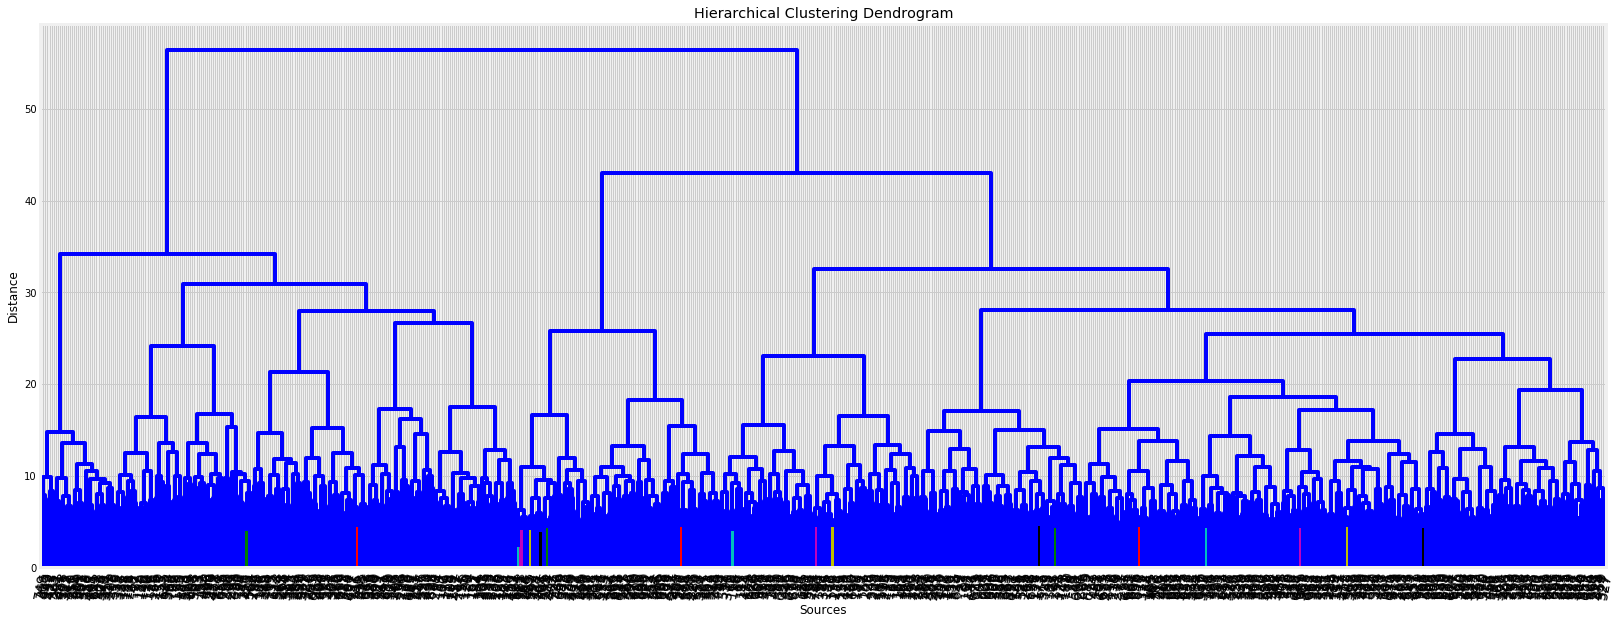

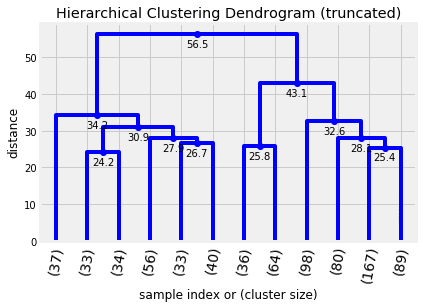

In [8]:
test_find_clusters_prosume_en(get_dataframe_analysis_en(True))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by the scale function.



Al reutilizar una imagen, ¿crees puedes redefinir el mensaje que el emisor ha pensado?  \
0                                          -0.322794                                        
1                                          -0.322794                                        
2                                          -0.322794                                        
3                                          -0.322794                                        
4                                           1.581690                                        

   Clasifica tu grado de visión  \
0                     -1.218193   
1                     -1.218193   
2                     -0.035466   
3                     -0.035466   
4                     -0.035466   

   Cuando compartes imágenes en redes sociales, ¿las acompañas de texto siguiendo las indicaciones que te sugieren las aplicaciones (etiquetado, explicación de la imagen, texto inspirador, etc.)?  \
0                                          -1.860199                                                                                                                                                  
1                                           0.027066                                                                                                                                                  
2                                           0.027066                                                                                                                                                  
3                                           1.914332                                                                                                                                                  
4                                           0.970699                                                                                                                                                  

   Cuando haces fotos desde cualquiera de los medios a tu alcance, ¿te facilitan el proceso las opciones que te ofrecen las aplicaciones (filtros, recortes, edición mediante grafismo, etc.)?  \
0                                          -0.143225                                                                                                                                             
1                                          -0.143225                                                                                                                                             
2                                           1.687670                                                                                                                                             
3                                           1.687670                                                                                                                                             
4                                          -0.143225                                                                                                                                             

   Cuando observas estas imágenes, ¿entiendes lo que pasa, aunque los sujetos/objetos no se muestren de forma completa? 1 2 3 4  \
0                                          -0.180359                                                                              
1                                          -0.180359                                                                              
2                                          -0.180359                                                                              
3                                          -0.180359                                                                              
4                                          -0.180359                                                                              

   Cuando observas una imagen, ¿te preguntas cosas acerca de los personajes/objetos qu

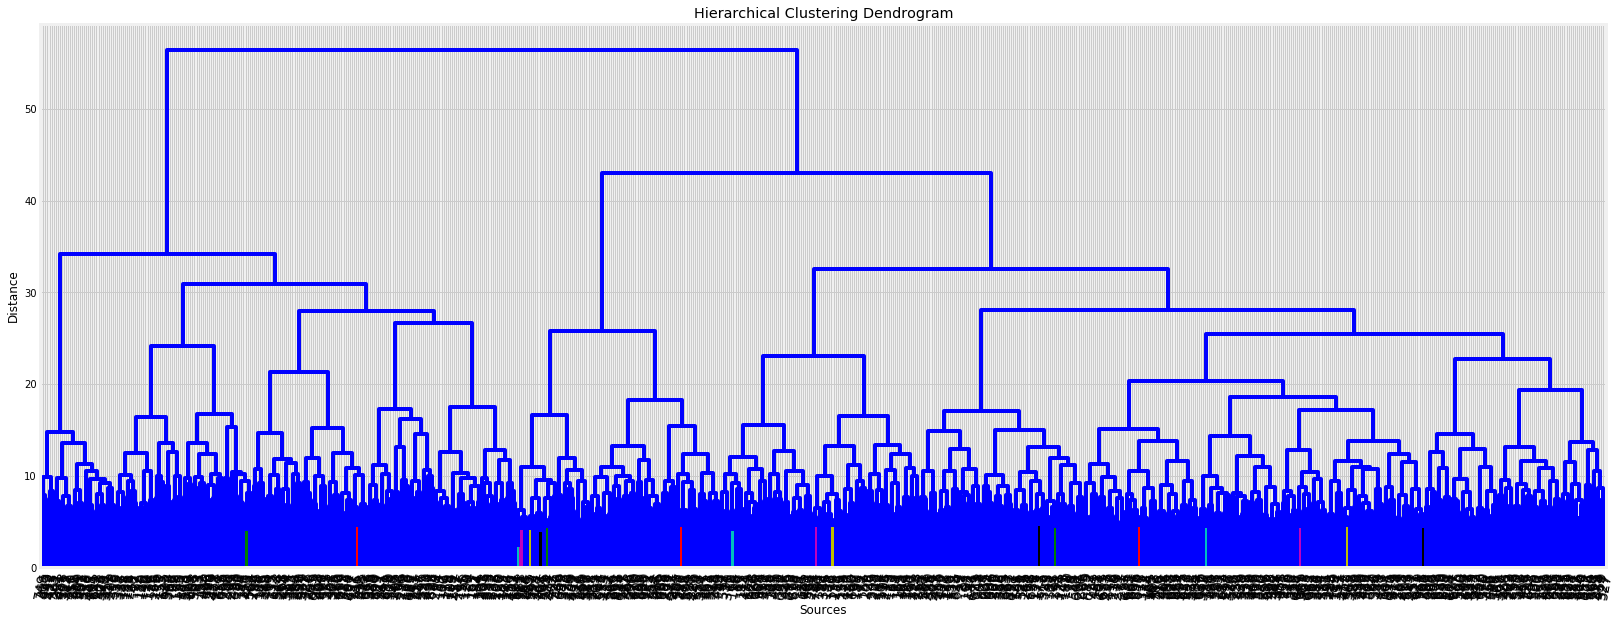

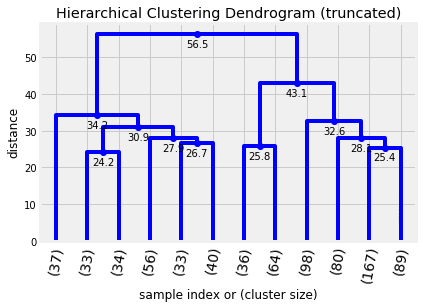

In [9]:
test_find_clusters_prosume_esp(get_dataframe_analysis_esp(True))

## Obtaining clusters from data

These functions obtain the clusters from a dataframe and return another dataframe with a new column called 'prosume_cluster' which represents the cluster related to prosume aspects assigned to each participant 

Also, we include two examples to show how to use the functions. The Euclidean distance used as a cutoff point to get the clusters in the examples is '28' as shown in the graphs displayed in the test functions `test_find_clusters_en()` and `test_find_clusters_esp()`

In [10]:
def get_dataframe_with_clusters_en(dataframe, max_euc_distance):
    
    clusters = dataframe.copy(True)
    clusters = drop_text_columns_en(clusters)
    clusters = drop_optional_columns_en(clusters)

    all_prosume_items = get_prosume_items_en()

    my_subset = all_prosume_items
    clusters = clusters[sorted(clusters, key=lambda x: x not in my_subset)]

    columns_vC = clusters.columns.values.tolist()

    for item in all_prosume_items:
        columns_vC.remove(item)

    z_vCluster = scale(clusters.iloc[:, len(my_subset):])
    z_vCluster = pd.DataFrame(z_vCluster, columns=columns_vC)

    # display(z_vCluster.head())

    # Fitting our model.
    cluster_tree = linkage(z_vCluster, 'ward')
    
    dataframe_with_clusters = clusters
    clusters_got = fcluster(cluster_tree, max_euc_distance, criterion='distance')
    dataframe_with_clusters['prosume_cluster'] = clusters_got
    
    return dataframe_with_clusters

In [11]:
def get_dataframe_with_clusters_esp(dataframe, max_euc_distance):
    
    clusters = dataframe.copy(True)
    clusters = drop_text_columns_esp(clusters)
    clusters = drop_optional_columns_esp(clusters)

    all_prosume_items = get_prosume_items_esp()

    my_subset = all_prosume_items
    clusters = clusters[sorted(clusters, key=lambda x: x not in my_subset)]

    columns_vC = clusters.columns.values.tolist()

    for item in all_prosume_items:
        columns_vC.remove(item)

    z_vCluster = scale(clusters.iloc[:, len(my_subset):])
    z_vCluster = pd.DataFrame(z_vCluster, columns=columns_vC)

    # display(z_vCluster.head())

    # Fitting our model.
    cluster_tree = linkage(z_vCluster, 'ward')
    
    dataframe_with_clusters = clusters
    clusters_got = fcluster(cluster_tree, max_euc_distance, criterion='distance')
    dataframe_with_clusters['prosume_cluster'] = clusters_got
    
    return dataframe_with_clusters

In [12]:
dataframe_with_clusters_en = get_dataframe_with_clusters_en(get_dataframe_analysis_en(True), 24)

print("Number of clusters: "+ str(len(dataframe_with_clusters_en['prosume_cluster'].unique())))
dataframe_with_clusters_en['prosume_cluster'].value_counts()

Number of clusters: 12


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by the scale function.



11    167
9      98
12     89
10     80
8      64
4      56
6      40
1      37
7      36
3      34
5      33
2      33
Name: prosume_cluster, dtype: int64

In [13]:
dataframe_with_clusters_esp = get_dataframe_with_clusters_esp(get_dataframe_analysis_esp(True), 24)

print("Número de clusters: "+ str(len(dataframe_with_clusters_esp['prosume_cluster'].unique())))
dataframe_with_clusters_esp['prosume_cluster'].value_counts()

Número de clusters: 12


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by the scale function.



11    167
9      98
12     89
10     80
8      64
4      56
6      40
1      37
7      36
3      34
5      33
2      33
Name: prosume_cluster, dtype: int64

In [14]:
def visualize_prosume_clusters_esp(dataframe):
    # Visualizing the clusters
    # We don't use a discrete colorscale due to Plotly does not support that in this moment https://github.com/plotly/plotly.js/issues/1968

    # Using Cividis color scale for visualization. https://arxiv.org/abs/1712.01662

    cultural_items_dict = [
        {'id': 'PR1', 'label': 'Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos]'},
        {'id': 'PR2', 'label': 'Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil]'},
        {'id': 'PR3', 'label': 'Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta]'},
        {'id': 'PR4', 'label': '¿Con qué frecuencia haces fotografías?'},
        {'id': 'PR5', 'label': 'Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos)'},
        {'id': 'PR6', 'label': '¿Repites las imágenes hasta conseguir el resultado esperado?'},
        {'id': 'PR7', 'label': 'En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?'},
        {'id': 'PR8', 'label': 'Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?'},
        {'id': 'PR9', 'label': 'Cuando compartes imágenes, ¿habitualmente las envías a otras personas?'},
        {'id': 'PR10', 'label': 'Cuando compartes imágenes, ¿habitualmente las produces tú?'},
        {'id': 'PR11', 'label': 'Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?'},
        {'id': 'PR12', 'label': 'Si encuentras esta información visual sugerida, ¿cómo actúas?'},
        {'id': 'PR13', 'label': 'Si tienes que crear una presentación de contenidos...'},
        {'id': 'PR14', 'label': 'Si las buscas en Internet...'},
        {'id': 'PR15', 'label': '¿Cuándo prosumes (produces y consumes) imágenes?'},
        {'id': 'PR16', 'label': 'Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar]'},
        {'id': 'PR17', 'label': 'Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro]'},
        {'id': 'PR18', 'label': 'Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones]'},
        {'id': 'PR19', 'label': 'Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras]'},
        {'id': 'PR20', 'label': 'Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos]'},
        {'id': 'PR21', 'label': 'Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan]'},
        {'id': 'PR22', 'label': 'Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen]'},
        {'id': 'PR23', 'label': 'Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología]'},
        {'id': 'PR24', 'label': 'Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan]'},
        {'id': 'PR25', 'label': 'Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio]'},
        {'id': 'PR26', 'label': 'Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil]'},
        {'id': 'PR27', 'label': '¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas]'},
        {'id': 'PR28', 'label': '¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme]'},
        {'id': 'PR29', 'label': '¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa]'},
        {'id': 'PR30', 'label': '¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)]'},
        {'id': 'PR31', 'label': '¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos]'},
        {'id': 'PR32', 'label': '¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia]'},
        {'id': 'PR33', 'label': '¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros]'},
        {'id': 'PR34', 'label': '¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos]'},
        {'id': 'PR35', 'label': '¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie]'},
        {'id': 'PR36', 'label': 'Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?'},
        {'id': 'PR37', 'label': '¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?'},   
    ]

    #
    dimensions_list = []

    for item in cultural_items_dict:
        dimensions_list.append(
            dict(range=[dataframe[item['label']].min(), dataframe[item['label']].max()],
                 #constraintrange = [workCleanDummiesCluster[item['label']].min(), workCleanDummiesCluster[item['label']].max()/3],
                 label=item['id'],
                 values=dataframe[item['label']])
        )

    data = [
        go.Parcoords(
            showlegend=True,
            line=dict(color=dataframe['prosume_cluster'].unique().astype(int),
                      colorscale='Cividis',
                      showscale=True,
                      reversescale=False,
                      cmin=dataframe['prosume_cluster'].min(),
                      cmax=dataframe['prosume_cluster'].max()
                      ),
            dimensions=dimensions_list,
        )
    ]

    '''
    layout = Layout()
    '''

    fig = go.Figure(data=data)
    iplot(fig)

    for item in cultural_items_dict:
        print(item['id']+": "+item['label'])

    all_prosume_items = get_prosume_items_esp()

    for selected_cluster in dataframe['prosume_cluster'].unique():
        for column in all_prosume_items:
            print("\n\nCluster "+str(selected_cluster) +
                  " || variable: "+str(column))
            display(dataframe.loc[dataframe['prosume_cluster']
                                  == selected_cluster][column].describe())
            print("Media de la variable :"+str(column)+": " +
                  str(dataframe.loc[dataframe['prosume_cluster'] == selected_cluster][column].mean().round(2)))
            # sns.distplot(workCleanDummiesCluster.loc[workCleanDummiesCluster['cluster'] == selected_cluster][column], kde=False, rug=True);
            data = [go.Bar(x=dataframe.loc[dataframe['prosume_cluster'] == selected_cluster][column],
                           y=dataframe.loc[dataframe['prosume_cluster'] == selected_cluster][column].value_counts())]
            iplot(data)
            plt.show()

In [15]:
def visualize_prosume_clusters_en(dataframe):
    # Visualizing the clusters
    # We don't use a discrete colorscale due to Plotly does not support that in this moment https://github.com/plotly/plotly.js/issues/1968

    # Using Cividis color scale for visualization. https://arxiv.org/abs/1712.01662

    cultural_items_dict = [
        {'id': 'PR1', 'label': 'When you take a picture, what type of capture device do you use? (Multiple answer) [1. Photo camera]'},
        {'id': 'PR2', 'label': 'When you take a picture, what type of capture device do you use? (Multiple answer) [2. Mobile phone]'},
        {'id': 'PR3', 'label': 'When you take a picture, what type of capture device do you use? (Multiple answer) [3. Tablet]'},
        {'id': 'PR4', 'label': 'How often do you produce images?'},
        {'id': 'PR5', 'label': 'When you produce images, how much time do you spend preparing it? (minutes)'},
        {'id': 'PR6', 'label': 'Do you repeat the images until you get the expected result?'},
        {'id': 'PR7', 'label': 'In your environment, do people who use technology create images and share them?'},
        {'id': 'PR8', 'label': 'When you share images, do you usually receive them from other people?'},
        {'id': 'PR9', 'label': 'When you share images, do you usually send them to other people?'},
        {'id': 'PR10', 'label': 'When you submit an image, have you treated an image that you have previously received or that has been generated by you?'},
        {'id': 'PR11', 'label': 'Within your social networks or mobile applications, do you see visual information that you are not looking for (social awareness campaigns, jokes, advertising, etc.)?'},
        {'id': 'PR12', 'label': 'If you find that suggested information, what is your attitude?'},
        {'id': 'PR13', 'label': 'If you have to create a content presentation...'},
        {'id': 'PR14', 'label': 'If you look for images in the Internet...'},
        {'id': 'PR15', 'label': 'When do you prosume (produce and consume) images?'},
        {'id': 'PR16', 'label': 'If you produce images, what do you use for? [1. In order to better understand the meaning of what I want to express]'},
        {'id': 'PR17', 'label': 'If you produce images, what do you use for? [2. In order to better explain where I am]'},
        {'id': 'PR18', 'label': 'If you produce images, what do you use for? [3. To express emotions]'},
        {'id': 'PR19', 'label': 'If you produce images, what do you use for? [4. To save words]'},
        {'id': 'PR20', 'label': 'If you produce images, what do you use for? [5. In order to share moments]'},
        {'id': 'PR21', 'label': 'If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [1. I do not like]'},
        {'id': 'PR22', 'label': 'If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [2. I do not know how they are made]'},
        {'id': 'PR23', 'label': 'If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [3. I do not use technology]'},
        {'id': 'PR24', 'label': 'If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [4. When I share them, I do not know what they mean]'},
        {'id': 'PR25', 'label': 'If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [5. Because they take up a lot of space]'},
        {'id': 'PR26', 'label': 'If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [6. I find it useless]'},
        {'id': 'PR27', 'label': 'What images do you decide to share in social networks or other technological media? [1. Images I make to keep networks active]'},
        {'id': 'PR28', 'label': 'What images do you decide to share in social networks or other technological media? [2. Images from day to day, which are part of my life, I use them to express myself]'},
        {'id': 'PR29', 'label': 'What images do you decide to share in social networks or other technological media? [3. Referential images in order to show something informative]'},
        {'id': 'PR30', 'label': 'What images do you decide to share in social networks or other technological media? [4. Images with which I intend to cause a reaction (eg. likes)]'},
        {'id': 'PR31', 'label': 'With whom do you usually share images? [1. Friends]'},
        {'id': 'PR32', 'label': 'With whom do you usually share images? [2. Family]'},
        {'id': 'PR33', 'label': 'With whom do you usually share images? [3. Partners]'},
        {'id': 'PR34', 'label': 'With whom do you usually share images? [4. With all my acquaintances]'},
        {'id': 'PR35', 'label': 'With whom do you usually share images? [5. With nobody]'},
        {'id': 'PR36', 'label': 'When you produce images, do you think about the image you want to create before doing it?'},
        {'id': 'PR37', 'label': 'How much of your consumption of digital images comes from digital media (digital press, internet, television,etc.) and how much by analogical means?'},   
    ]
                        
    #
    dimensions_list = []

    for item in cultural_items_dict:
        dimensions_list.append(
            dict(range=[dataframe[item['label']].min(), dataframe[item['label']].max()],
                 #constraintrange = [workCleanDummiesCluster[item['label']].min(), workCleanDummiesCluster[item['label']].max()/3],
                 label=item['id'],
                 values=dataframe[item['label']])
        )

    data = [
        go.Parcoords(
            showlegend=True,
            line=dict(color=dataframe['prosume_cluster'].unique().astype(int),
                      colorscale='Cividis',
                      showscale=True,
                      reversescale=False,
                      cmin=dataframe['prosume_cluster'].min(),
                      cmax=dataframe['prosume_cluster'].max()
                      ),
            dimensions=dimensions_list,
        )
    ]

    '''
    layout = Layout()
    '''

    fig = go.Figure(data=data)
    iplot(fig)

    for item in cultural_items_dict:
        print(item['id']+": "+item['label'])

    all_prosume_items = get_prosume_items_en()

    for selected_cluster in dataframe['prosume_cluster'].unique():
        for column in all_prosume_items:
            print("\n\nCluster "+str(selected_cluster) +
                  " || feature: "+str(column))
            display(dataframe.loc[dataframe['prosume_cluster']
                                  == selected_cluster][column].describe())
            print("Mean of feature :"+str(column)+": " +
                  str(dataframe.loc[dataframe['prosume_cluster'] == selected_cluster][column].mean().round(2)))
            # sns.distplot(workCleanDummiesCluster.loc[workCleanDummiesCluster['cluster'] == selected_cluster][column], kde=False, rug=True);
            data = [go.Bar(x=dataframe.loc[dataframe['prosume_cluster'] == selected_cluster][column],
                           y=dataframe.loc[dataframe['prosume_cluster'] == selected_cluster][column].value_counts())]
            iplot(data)
            plt.show()

In [16]:
visualize_prosume_clusters_esp(dataframe_with_clusters_esp)

PR1: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos]
PR2: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil]
PR3: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta]
PR4: ¿Con qué frecuencia haces fotografías?
PR5: Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos)
PR6: ¿Repites las imágenes hasta conseguir el resultado esperado?
PR7: En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?
PR8: Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?
PR9: Cuando compartes imágenes, ¿habitualmente las envías a otras personas?
PR10: Cuando compartes imágenes, ¿habitualmente las produces tú?
PR11: Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?
PR12: Si encuentras e

count    80.000000
mean      0.250000
std       0.435745
min       0.000000
25%       0.000000
50%       0.000000
75%       0.250000
max       1.000000
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos], dtype: float64

Media de la variable :Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos]: 0.25




Cluster 10 || variable: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil]


count    80.000000
mean      0.937500
std       0.243589
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil], dtype: float64

Media de la variable :Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil]: 0.94




Cluster 10 || variable: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta]


count    80.000000
mean      0.075000
std       0.265053
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta], dtype: float64

Media de la variable :Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta]: 0.08




Cluster 10 || variable: ¿Con qué frecuencia haces fotografías?


count    80.000000
mean      3.662500
std       0.992934
min       2.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: ¿Con qué frecuencia haces fotografías?, dtype: float64

Media de la variable :¿Con qué frecuencia haces fotografías?: 3.66




Cluster 10 || variable: Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos)


count      80.000000
mean       51.431250
std       401.963321
min         0.000000
25%         1.000000
50%         2.000000
75%         5.000000
max      3600.000000
Name: Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos), dtype: float64

Media de la variable :Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos): 51.43




Cluster 10 || variable: ¿Repites las imágenes hasta conseguir el resultado esperado?


count    80.000000
mean      0.700000
std       0.461149
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: ¿Repites las imágenes hasta conseguir el resultado esperado?, dtype: float64

Media de la variable :¿Repites las imágenes hasta conseguir el resultado esperado?: 0.7




Cluster 10 || variable: En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?


count    80.000000
mean      3.537500
std       0.940559
min       1.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?, dtype: float64

Media de la variable :En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?: 3.54




Cluster 10 || variable: Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?


count    80.000000
mean      3.312500
std       0.880071
min       1.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?, dtype: float64

Media de la variable :Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?: 3.31




Cluster 10 || variable: Cuando compartes imágenes, ¿habitualmente las envías a otras personas?


count    80.000000
mean      3.162500
std       0.719419
min       2.000000
25%       3.000000
50%       3.000000
75%       3.250000
max       5.000000
Name: Cuando compartes imágenes, ¿habitualmente las envías a otras personas?, dtype: float64

Media de la variable :Cuando compartes imágenes, ¿habitualmente las envías a otras personas?: 3.16




Cluster 10 || variable: Cuando compartes imágenes, ¿habitualmente las produces tú?


count    80.000000
mean      3.025000
std       0.711123
min       2.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       4.000000
Name: Cuando compartes imágenes, ¿habitualmente las produces tú?, dtype: float64

Media de la variable :Cuando compartes imágenes, ¿habitualmente las produces tú?: 3.02




Cluster 10 || variable: Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?


count    80.000000
mean      3.612500
std       0.892922
min       2.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?, dtype: float64

Media de la variable :Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?: 3.61




Cluster 10 || variable: Si encuentras esta información visual sugerida, ¿cómo actúas?


count    80.000000
mean      1.262500
std       0.442769
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       2.000000
Name: Si encuentras esta información visual sugerida, ¿cómo actúas?, dtype: float64

Media de la variable :Si encuentras esta información visual sugerida, ¿cómo actúas?: 1.26




Cluster 10 || variable: Si tienes que crear una presentación de contenidos...


count    80.000000
mean      1.100000
std       0.301893
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       2.000000
Name: Si tienes que crear una presentación de contenidos..., dtype: float64

Media de la variable :Si tienes que crear una presentación de contenidos...: 1.1




Cluster 10 || variable: Si las buscas en Internet...


count    80.00000
mean      1.63750
std       0.73336
min       1.00000
25%       1.00000
50%       1.00000
75%       2.00000
max       3.00000
Name: Si las buscas en Internet..., dtype: float64

Media de la variable :Si las buscas en Internet...: 1.64




Cluster 10 || variable: ¿Cuándo prosumes (produces y consumes) imágenes?


count    80.000000
mean      3.437500
std       1.134541
min       1.000000
25%       2.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: ¿Cuándo prosumes (produces y consumes) imágenes?, dtype: float64

Media de la variable :¿Cuándo prosumes (produces y consumes) imágenes?: 3.44




Cluster 10 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar]


count    80.000000
mean      0.475000
std       0.502525
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar]: 0.48




Cluster 10 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro]


count    80.000000
mean      0.187500
std       0.392775
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro]: 0.19




Cluster 10 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones]


count    80.00000
mean      0.41250
std       0.49539
min       0.00000
25%       0.00000
50%       0.00000
75%       1.00000
max       1.00000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones]: 0.41




Cluster 10 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras]


count    80.000000
mean      0.112500
std       0.317974
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras]: 0.11




Cluster 10 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos]


count    80.00000
mean      0.58750
std       0.49539
min       0.00000
25%       0.00000
50%       1.00000
75%       1.00000
max       1.00000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos]: 0.59




Cluster 10 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan]


count    80.00000
mean      0.02500
std       0.15711
min       0.00000
25%       0.00000
50%       0.00000
75%       0.00000
max       1.00000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan]: 0.02




Cluster 10 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen]


count    80.00000
mean      0.02500
std       0.15711
min       0.00000
25%       0.00000
50%       0.00000
75%       0.00000
max       1.00000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen]: 0.02




Cluster 10 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología]


count    80.000000
mean      0.012500
std       0.111803
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología]: 0.01




Cluster 10 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan]


count    80.00000
mean      0.05000
std       0.21932
min       0.00000
25%       0.00000
50%       0.00000
75%       0.00000
max       1.00000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan]: 0.05




Cluster 10 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio]


count    80.000000
mean      0.075000
std       0.265053
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio]: 0.08




Cluster 10 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil]


count    80.000000
mean      0.012500
std       0.111803
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil]: 0.01




Cluster 10 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas]


count    80.000000
mean      0.162500
std       0.371236
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas], dtype: float64

Media de la variable :¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas]: 0.16




Cluster 10 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme]


count    80.000000
mean      0.475000
std       0.502525
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme], dtype: float64

Media de la variable :¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme]: 0.48




Cluster 10 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa]


count    80.000000
mean      0.500000
std       0.503155
min       0.000000
25%       0.000000
50%       0.500000
75%       1.000000
max       1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa], dtype: float64

Media de la variable :¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa]: 0.5




Cluster 10 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)]


count    80.000000
mean      0.187500
std       0.392775
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)], dtype: float64

Media de la variable :¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)]: 0.19




Cluster 10 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos]


count    80.000000
mean      0.825000
std       0.382364
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos]: 0.82




Cluster 10 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia]


count    80.000000
mean      0.762500
std       0.428236
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia]: 0.76




Cluster 10 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros]


count    80.00000
mean      0.41250
std       0.49539
min       0.00000
25%       0.00000
50%       0.00000
75%       1.00000
max       1.00000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros]: 0.41




Cluster 10 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos]


count    80.000000
mean      0.112500
std       0.317974
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos]: 0.11




Cluster 10 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie]


count    80.000000
mean      0.037500
std       0.191182
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie]: 0.04




Cluster 10 || variable: Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?


count    80.000000
mean      3.262500
std       0.990381
min       1.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?, dtype: float64

Media de la variable :Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?: 3.26




Cluster 10 || variable: ¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?


count    80.000000
mean      2.162500
std       0.736804
min       1.000000
25%       2.000000
50%       2.000000
75%       2.250000
max       5.000000
Name: ¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?, dtype: float64

Media de la variable :¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?: 2.16




Cluster 12 || variable: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos]


count    89.000000
mean      0.337079
std       0.475390
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos], dtype: float64

Media de la variable :Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos]: 0.34




Cluster 12 || variable: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil]


count    89.000000
mean      0.876404
std       0.330984
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil], dtype: float64

Media de la variable :Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil]: 0.88




Cluster 12 || variable: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta]


count    89.000000
mean      0.089888
std       0.287641
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta], dtype: float64

Media de la variable :Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta]: 0.09




Cluster 12 || variable: ¿Con qué frecuencia haces fotografías?


count    89.000000
mean      3.696629
std       0.981702
min       1.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: ¿Con qué frecuencia haces fotografías?, dtype: float64

Media de la variable :¿Con qué frecuencia haces fotografías?: 3.7




Cluster 12 || variable: Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos)


count     89.000000
mean       6.348315
std       14.562640
min        0.000000
25%        1.000000
50%        2.000000
75%        5.000000
max      120.000000
Name: Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos), dtype: float64

Media de la variable :Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos): 6.35




Cluster 12 || variable: ¿Repites las imágenes hasta conseguir el resultado esperado?


count    89.000000
mean      0.662921
std       0.475390
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: ¿Repites las imágenes hasta conseguir el resultado esperado?, dtype: float64

Media de la variable :¿Repites las imágenes hasta conseguir el resultado esperado?: 0.66




Cluster 12 || variable: En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?


count    89.000000
mean      3.808989
std       0.927808
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?, dtype: float64

Media de la variable :En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?: 3.81




Cluster 12 || variable: Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?


count    89.000000
mean      3.359551
std       0.920069
min       1.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?, dtype: float64

Media de la variable :Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?: 3.36




Cluster 12 || variable: Cuando compartes imágenes, ¿habitualmente las envías a otras personas?


count    89.000000
mean      3.337079
std       0.987925
min       1.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: Cuando compartes imágenes, ¿habitualmente las envías a otras personas?, dtype: float64

Media de la variable :Cuando compartes imágenes, ¿habitualmente las envías a otras personas?: 3.34




Cluster 12 || variable: Cuando compartes imágenes, ¿habitualmente las produces tú?


count    89.000000
mean      2.932584
std       0.822935
min       1.000000
25%       3.000000
50%       3.000000
75%       3.000000
max       5.000000
Name: Cuando compartes imágenes, ¿habitualmente las produces tú?, dtype: float64

Media de la variable :Cuando compartes imágenes, ¿habitualmente las produces tú?: 2.93




Cluster 12 || variable: Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?


count    89.000000
mean      3.651685
std       1.045566
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?, dtype: float64

Media de la variable :Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?: 3.65




Cluster 12 || variable: Si encuentras esta información visual sugerida, ¿cómo actúas?


count    89.000000
mean      1.382022
std       0.488635
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       2.000000
Name: Si encuentras esta información visual sugerida, ¿cómo actúas?, dtype: float64

Media de la variable :Si encuentras esta información visual sugerida, ¿cómo actúas?: 1.38




Cluster 12 || variable: Si tienes que crear una presentación de contenidos...


count    89.000000
mean      1.269663
std       0.446299
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       2.000000
Name: Si tienes que crear una presentación de contenidos..., dtype: float64

Media de la variable :Si tienes que crear una presentación de contenidos...: 1.27




Cluster 12 || variable: Si las buscas en Internet...


count    89.000000
mean      1.786517
std       0.760859
min       1.000000
25%       1.000000
50%       2.000000
75%       2.000000
max       3.000000
Name: Si las buscas en Internet..., dtype: float64

Media de la variable :Si las buscas en Internet...: 1.79




Cluster 12 || variable: ¿Cuándo prosumes (produces y consumes) imágenes?


count    89.000000
mean      3.258427
std       1.163147
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: ¿Cuándo prosumes (produces y consumes) imágenes?, dtype: float64

Media de la variable :¿Cuándo prosumes (produces y consumes) imágenes?: 3.26




Cluster 12 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar]


count    89.000000
mean      0.359551
std       0.482588
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar]: 0.36




Cluster 12 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro]


count    89.000000
mean      0.224719
std       0.419762
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro]: 0.22




Cluster 12 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones]


count    89.000000
mean      0.359551
std       0.482588
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones]: 0.36




Cluster 12 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras]


count    89.000000
mean      0.202247
std       0.403951
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras]: 0.2




Cluster 12 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos]


count    89.000000
mean      0.516854
std       0.502547
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos]: 0.52




Cluster 12 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan]


count    89.000000
mean      0.044944
std       0.208355
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan]: 0.04




Cluster 12 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen]


count    89.000000
mean      0.033708
std       0.181499
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen]: 0.03




Cluster 12 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología]


count    89.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología]: 0.0




Cluster 12 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan]


count    89.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan]: 0.0




Cluster 12 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio]


count    89.000000
mean      0.044944
std       0.208355
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio]: 0.04




Cluster 12 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil]


count    89.000000
mean      0.033708
std       0.181499
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil]: 0.03




Cluster 12 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas]


count    89.000000
mean      0.123596
std       0.330984
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas], dtype: float64

Media de la variable :¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas]: 0.12




Cluster 12 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme]


count    89.000000
mean      0.573034
std       0.497440
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme], dtype: float64

Media de la variable :¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme]: 0.57




Cluster 12 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa]


count    89.000000
mean      0.471910
std       0.502039
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa], dtype: float64

Media de la variable :¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa]: 0.47




Cluster 12 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)]


count    89.000000
mean      0.269663
std       0.446299
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)], dtype: float64

Media de la variable :¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)]: 0.27




Cluster 12 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos]


count    89.000000
mean      0.831461
std       0.376465
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos]: 0.83




Cluster 12 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia]


count    89.000000
mean      0.876404
std       0.330984
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia]: 0.88




Cluster 12 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros]


count    89.000000
mean      0.370787
std       0.485752
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros]: 0.37




Cluster 12 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos]


count    89.000000
mean      0.213483
std       0.412088
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos]: 0.21




Cluster 12 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie]


count    89.000000
mean      0.033708
std       0.181499
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie]: 0.03




Cluster 12 || variable: Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?


count    89.000000
mean      3.606742
std       1.103898
min       1.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?, dtype: float64

Media de la variable :Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?: 3.61




Cluster 12 || variable: ¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?


count    89.000000
mean      2.359551
std       0.882239
min       1.000000
25%       2.000000
50%       2.000000
75%       3.000000
max       5.000000
Name: ¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?, dtype: float64

Media de la variable :¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?: 2.36




Cluster 11 || variable: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos]


count    167.000000
mean       0.299401
std        0.459373
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos], dtype: float64

Media de la variable :Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos]: 0.3




Cluster 11 || variable: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil]


count    167.000000
mean       0.958084
std        0.201000
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil], dtype: float64

Media de la variable :Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil]: 0.96




Cluster 11 || variable: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta]


count    167.000000
mean       0.083832
std        0.277970
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta], dtype: float64

Media de la variable :Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta]: 0.08




Cluster 11 || variable: ¿Con qué frecuencia haces fotografías?


count    167.000000
mean       3.760479
std        0.939172
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: ¿Con qué frecuencia haces fotografías?, dtype: float64

Media de la variable :¿Con qué frecuencia haces fotografías?: 3.76




Cluster 11 || variable: Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos)


count    167.000000
mean       7.791617
std       20.422789
min        0.000000
25%        1.000000
50%        3.000000
75%       10.000000
max      240.000000
Name: Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos), dtype: float64

Media de la variable :Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos): 7.79




Cluster 11 || variable: ¿Repites las imágenes hasta conseguir el resultado esperado?


count    167.000000
mean       0.784431
std        0.412453
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: ¿Repites las imágenes hasta conseguir el resultado esperado?, dtype: float64

Media de la variable :¿Repites las imágenes hasta conseguir el resultado esperado?: 0.78




Cluster 11 || variable: En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?


count    167.000000
mean       3.736527
std        0.970676
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?, dtype: float64

Media de la variable :En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?: 3.74




Cluster 11 || variable: Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?


count    167.000000
mean       3.377246
std        0.847511
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?, dtype: float64

Media de la variable :Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?: 3.38




Cluster 11 || variable: Cuando compartes imágenes, ¿habitualmente las envías a otras personas?


count    167.000000
mean       3.461078
std        0.797198
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Cuando compartes imágenes, ¿habitualmente las envías a otras personas?, dtype: float64

Media de la variable :Cuando compartes imágenes, ¿habitualmente las envías a otras personas?: 3.46




Cluster 11 || variable: Cuando compartes imágenes, ¿habitualmente las produces tú?


count    167.000000
mean       3.239521
std        0.738034
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Cuando compartes imágenes, ¿habitualmente las produces tú?, dtype: float64

Media de la variable :Cuando compartes imágenes, ¿habitualmente las produces tú?: 3.24




Cluster 11 || variable: Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?


count    167.000000
mean       3.634731
std        1.060571
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?, dtype: float64

Media de la variable :Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?: 3.63




Cluster 11 || variable: Si encuentras esta información visual sugerida, ¿cómo actúas?


count    167.000000
mean       1.371257
std        0.484594
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: Si encuentras esta información visual sugerida, ¿cómo actúas?, dtype: float64

Media de la variable :Si encuentras esta información visual sugerida, ¿cómo actúas?: 1.37




Cluster 11 || variable: Si tienes que crear una presentación de contenidos...


count    167.000000
mean       1.239521
std        0.428075
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: Si tienes que crear una presentación de contenidos..., dtype: float64

Media de la variable :Si tienes que crear una presentación de contenidos...: 1.24




Cluster 11 || variable: Si las buscas en Internet...


count    167.000000
mean       1.676647
std        0.738522
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: Si las buscas en Internet..., dtype: float64

Media de la variable :Si las buscas en Internet...: 1.68




Cluster 11 || variable: ¿Cuándo prosumes (produces y consumes) imágenes?


count    167.000000
mean       3.473054
std        1.123754
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: ¿Cuándo prosumes (produces y consumes) imágenes?, dtype: float64

Media de la variable :¿Cuándo prosumes (produces y consumes) imágenes?: 3.47




Cluster 11 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar]


count    167.000000
mean       0.437126
std        0.497523
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar]: 0.44




Cluster 11 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro]


count    167.000000
mean       0.335329
std        0.473525
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro]: 0.34




Cluster 11 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones]


count    167.000000
mean       0.556886
std        0.498247
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones]: 0.56




Cluster 11 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras]


count    167.000000
mean       0.209581
std        0.408234
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras]: 0.21




Cluster 11 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos]


count    167.000000
mean       0.652695
std        0.477546
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos]: 0.65




Cluster 11 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan]


count    167.000000
mean       0.059880
std        0.237978
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan]: 0.06




Cluster 11 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen]


count    167.000000
mean       0.029940
std        0.170935
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen]: 0.03




Cluster 11 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología]


count    167.000000
mean       0.041916
std        0.201000
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología]: 0.04




Cluster 11 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan]


count    167.000000
mean       0.047904
std        0.214206
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan]: 0.05




Cluster 11 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio]


count    167.000000
mean       0.071856
std        0.259026
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio]: 0.07




Cluster 11 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil]


count    167.000000
mean       0.035928
std        0.186671
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil]: 0.04




Cluster 11 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas]


count    167.000000
mean       0.287425
std        0.453923
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas], dtype: float64

Media de la variable :¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas]: 0.29




Cluster 11 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme]


count    167.000000
mean       0.634731
std        0.482954
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme], dtype: float64

Media de la variable :¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme]: 0.63




Cluster 11 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa]


count    167.000000
mean       0.485030
std        0.501279
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa], dtype: float64

Media de la variable :¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa]: 0.49




Cluster 11 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)]


count    167.000000
mean       0.502994
std        0.501495
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)], dtype: float64

Media de la variable :¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)]: 0.5




Cluster 11 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos]


count    167.000000
mean       0.898204
std        0.303290
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos]: 0.9




Cluster 11 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia]


count    167.000000
mean       0.856287
std        0.351853
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia]: 0.86




Cluster 11 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros]


count    167.000000
mean       0.461078
std        0.499982
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros]: 0.46




Cluster 11 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos]


count    167.000000
mean       0.323353
std        0.469163
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos]: 0.32




Cluster 11 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie]


count    167.000000
mean       0.023952
std        0.153360
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie]: 0.02




Cluster 11 || variable: Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?


count    167.000000
mean       3.568862
std        1.008871
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?, dtype: float64

Media de la variable :Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?: 3.57




Cluster 11 || variable: ¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?


count    167.000000
mean       2.365269
std        0.794251
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: ¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?, dtype: float64

Media de la variable :¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?: 2.37




Cluster 6 || variable: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos]


count    40.000000
mean      0.400000
std       0.496139
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos], dtype: float64

Media de la variable :Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos]: 0.4




Cluster 6 || variable: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil]


count    40.000000
mean      0.975000
std       0.158114
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil], dtype: float64

Media de la variable :Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil]: 0.98




Cluster 6 || variable: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta]


count    40.000000
mean      0.100000
std       0.303822
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta], dtype: float64

Media de la variable :Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta]: 0.1




Cluster 6 || variable: ¿Con qué frecuencia haces fotografías?


count    40.000000
mean      3.400000
std       1.172331
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: ¿Con qué frecuencia haces fotografías?, dtype: float64

Media de la variable :¿Con qué frecuencia haces fotografías?: 3.4




Cluster 6 || variable: Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos)


count    40.000000
mean      9.382500
std       8.935435
min       0.300000
25%       2.750000
50%       5.000000
75%      10.000000
max      35.000000
Name: Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos), dtype: float64

Media de la variable :Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos): 9.38




Cluster 6 || variable: ¿Repites las imágenes hasta conseguir el resultado esperado?


count    40.000000
mean      0.750000
std       0.438529
min       0.000000
25%       0.750000
50%       1.000000
75%       1.000000
max       1.000000
Name: ¿Repites las imágenes hasta conseguir el resultado esperado?, dtype: float64

Media de la variable :¿Repites las imágenes hasta conseguir el resultado esperado?: 0.75




Cluster 6 || variable: En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?


count    40.000000
mean      3.625000
std       1.078639
min       1.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?, dtype: float64

Media de la variable :En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?: 3.62




Cluster 6 || variable: Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?


count    40.00000
mean      3.40000
std       1.08131
min       2.00000
25%       2.00000
50%       3.50000
75%       4.00000
max       5.00000
Name: Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?, dtype: float64

Media de la variable :Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?: 3.4




Cluster 6 || variable: Cuando compartes imágenes, ¿habitualmente las envías a otras personas?


count    40.000000
mean      3.250000
std       1.126601
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: Cuando compartes imágenes, ¿habitualmente las envías a otras personas?, dtype: float64

Media de la variable :Cuando compartes imágenes, ¿habitualmente las envías a otras personas?: 3.25




Cluster 6 || variable: Cuando compartes imágenes, ¿habitualmente las produces tú?


count    40.000000
mean      3.025000
std       0.973692
min       1.000000
25%       3.000000
50%       3.000000
75%       3.250000
max       5.000000
Name: Cuando compartes imágenes, ¿habitualmente las produces tú?, dtype: float64

Media de la variable :Cuando compartes imágenes, ¿habitualmente las produces tú?: 3.02




Cluster 6 || variable: Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?


count    40.000000
mean      3.550000
std       1.011473
min       1.000000
25%       3.000000
50%       3.500000
75%       4.000000
max       5.000000
Name: Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?, dtype: float64

Media de la variable :Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?: 3.55




Cluster 6 || variable: Si encuentras esta información visual sugerida, ¿cómo actúas?


count    40.000000
mean      1.225000
std       0.422902
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       2.000000
Name: Si encuentras esta información visual sugerida, ¿cómo actúas?, dtype: float64

Media de la variable :Si encuentras esta información visual sugerida, ¿cómo actúas?: 1.23




Cluster 6 || variable: Si tienes que crear una presentación de contenidos...


count    40.000000
mean      1.175000
std       0.384808
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       2.000000
Name: Si tienes que crear una presentación de contenidos..., dtype: float64

Media de la variable :Si tienes que crear una presentación de contenidos...: 1.18




Cluster 6 || variable: Si las buscas en Internet...


count    40.000000
mean      1.650000
std       0.769615
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       3.000000
Name: Si las buscas en Internet..., dtype: float64

Media de la variable :Si las buscas en Internet...: 1.65




Cluster 6 || variable: ¿Cuándo prosumes (produces y consumes) imágenes?


count    40.000000
mean      3.325000
std       1.474353
min       1.000000
25%       2.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: ¿Cuándo prosumes (produces y consumes) imágenes?, dtype: float64

Media de la variable :¿Cuándo prosumes (produces y consumes) imágenes?: 3.32




Cluster 6 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar]


count    40.000000
mean      0.250000
std       0.438529
min       0.000000
25%       0.000000
50%       0.000000
75%       0.250000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar]: 0.25




Cluster 6 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro]


count    40.000000
mean      0.175000
std       0.384808
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro]: 0.18




Cluster 6 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones]


count    40.00000
mean      0.37500
std       0.49029
min       0.00000
25%       0.00000
50%       0.00000
75%       1.00000
max       1.00000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones]: 0.38




Cluster 6 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras]


count    40.000000
mean      0.300000
std       0.464095
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras]: 0.3




Cluster 6 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos]


count    40.000000
mean      0.675000
std       0.474342
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos]: 0.68




Cluster 6 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan]


count    40.000000
mean      0.075000
std       0.266747
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan]: 0.08




Cluster 6 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen]


count    40.000000
mean      0.025000
std       0.158114
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen]: 0.02




Cluster 6 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología]


count    40.000000
mean      0.075000
std       0.266747
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología]: 0.08




Cluster 6 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan]


count    40.000000
mean      0.050000
std       0.220721
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan]: 0.05




Cluster 6 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio]


count    40.000000
mean      0.100000
std       0.303822
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio]: 0.1




Cluster 6 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil]


count    40.000000
mean      0.025000
std       0.158114
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil]: 0.02




Cluster 6 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas]


count    40.000000
mean      0.525000
std       0.505736
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas], dtype: float64

Media de la variable :¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas]: 0.52




Cluster 6 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme]


count    40.000000
mean      0.300000
std       0.464095
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme], dtype: float64

Media de la variable :¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme]: 0.3




Cluster 6 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa]


count    40.000000
mean      0.325000
std       0.474342
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa], dtype: float64

Media de la variable :¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa]: 0.32




Cluster 6 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)]


count    40.000000
mean      0.350000
std       0.483046
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)], dtype: float64

Media de la variable :¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)]: 0.35




Cluster 6 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos]


count    40.000000
mean      0.825000
std       0.384808
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos]: 0.82




Cluster 6 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia]


count    40.000000
mean      0.650000
std       0.483046
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia]: 0.65




Cluster 6 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros]


count    40.000000
mean      0.400000
std       0.496139
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros]: 0.4




Cluster 6 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos]


count    40.000000
mean      0.125000
std       0.334932
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos]: 0.12




Cluster 6 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie]


count    40.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie]: 0.0




Cluster 6 || variable: Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?


count    40.000000
mean      3.300000
std       1.223698
min       1.000000
25%       3.000000
50%       3.500000
75%       4.000000
max       5.000000
Name: Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?, dtype: float64

Media de la variable :Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?: 3.3




Cluster 6 || variable: ¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?


count    40.000000
mean      2.175000
std       0.902631
min       1.000000
25%       1.750000
50%       2.000000
75%       3.000000
max       4.000000
Name: ¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?, dtype: float64

Media de la variable :¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?: 2.17




Cluster 9 || variable: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos]


count    98.000000
mean      0.469388
std       0.501628
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos], dtype: float64

Media de la variable :Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos]: 0.47




Cluster 9 || variable: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil]


count    98.000000
mean      0.908163
std       0.290280
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil], dtype: float64

Media de la variable :Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil]: 0.91




Cluster 9 || variable: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta]


count    98.000000
mean      0.071429
std       0.258863
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta], dtype: float64

Media de la variable :Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta]: 0.07




Cluster 9 || variable: ¿Con qué frecuencia haces fotografías?


count    98.000000
mean      3.989796
std       0.946996
min       1.000000
25%       4.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: ¿Con qué frecuencia haces fotografías?, dtype: float64

Media de la variable :¿Con qué frecuencia haces fotografías?: 3.99




Cluster 9 || variable: Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos)


count    98.000000
mean      8.015306
std      11.538026
min       0.000000
25%       1.000000
50%       5.000000
75%      10.000000
max      60.000000
Name: Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos), dtype: float64

Media de la variable :Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos): 8.02




Cluster 9 || variable: ¿Repites las imágenes hasta conseguir el resultado esperado?


count    98.000000
mean      0.826531
std       0.380599
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: ¿Repites las imágenes hasta conseguir el resultado esperado?, dtype: float64

Media de la variable :¿Repites las imágenes hasta conseguir el resultado esperado?: 0.83




Cluster 9 || variable: En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?


count    98.000000
mean      4.051020
std       0.912371
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?, dtype: float64

Media de la variable :En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?: 4.05




Cluster 9 || variable: Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?


count    98.000000
mean      3.510204
std       1.057569
min       1.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?, dtype: float64

Media de la variable :Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?: 3.51




Cluster 9 || variable: Cuando compartes imágenes, ¿habitualmente las envías a otras personas?


count    98.000000
mean      3.469388
std       0.954685
min       1.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: Cuando compartes imágenes, ¿habitualmente las envías a otras personas?, dtype: float64

Media de la variable :Cuando compartes imágenes, ¿habitualmente las envías a otras personas?: 3.47




Cluster 9 || variable: Cuando compartes imágenes, ¿habitualmente las produces tú?


count    98.000000
mean      3.153061
std       0.708593
min       1.000000
25%       3.000000
50%       3.000000
75%       3.750000
max       5.000000
Name: Cuando compartes imágenes, ¿habitualmente las produces tú?, dtype: float64

Media de la variable :Cuando compartes imágenes, ¿habitualmente las produces tú?: 3.15




Cluster 9 || variable: Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?


count    98.000000
mean      3.928571
std       1.017881
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?, dtype: float64

Media de la variable :Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?: 3.93




Cluster 9 || variable: Si encuentras esta información visual sugerida, ¿cómo actúas?


count    98.000000
mean      1.265306
std       0.443766
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       2.000000
Name: Si encuentras esta información visual sugerida, ¿cómo actúas?, dtype: float64

Media de la variable :Si encuentras esta información visual sugerida, ¿cómo actúas?: 1.27




Cluster 9 || variable: Si tienes que crear una presentación de contenidos...


count    98.000000
mean      1.265306
std       0.443766
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       2.000000
Name: Si tienes que crear una presentación de contenidos..., dtype: float64

Media de la variable :Si tienes que crear una presentación de contenidos...: 1.27




Cluster 9 || variable: Si las buscas en Internet...


count    98.000000
mean      1.581633
std       0.731098
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       3.000000
Name: Si las buscas en Internet..., dtype: float64

Media de la variable :Si las buscas en Internet...: 1.58




Cluster 9 || variable: ¿Cuándo prosumes (produces y consumes) imágenes?


count    98.000000
mean      3.867347
std       1.145477
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: ¿Cuándo prosumes (produces y consumes) imágenes?, dtype: float64

Media de la variable :¿Cuándo prosumes (produces y consumes) imágenes?: 3.87




Cluster 9 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar]


count    98.000000
mean      0.530612
std       0.501628
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar]: 0.53




Cluster 9 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro]


count    98.000000
mean      0.285714
std       0.454077
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro]: 0.29




Cluster 9 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones]


count    98.000000
mean      0.571429
std       0.497416
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones]: 0.57




Cluster 9 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras]


count    98.000000
mean      0.306122
std       0.463251
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras]: 0.31




Cluster 9 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos]


count    98.000000
mean      0.622449
std       0.487267
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos]: 0.62




Cluster 9 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan]


count    98.000000
mean      0.030612
std       0.173150
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan]: 0.03




Cluster 9 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen]


count    98.000000
mean      0.020408
std       0.142119
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen]: 0.02




Cluster 9 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología]


count    98.000000
mean      0.020408
std       0.142119
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología]: 0.02




Cluster 9 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan]


count    98.000000
mean      0.020408
std       0.142119
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan]: 0.02




Cluster 9 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio]


count    98.000000
mean      0.030612
std       0.173150
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio]: 0.03




Cluster 9 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil]


count    98.000000
mean      0.020408
std       0.142119
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil]: 0.02




Cluster 9 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas]


count    98.000000
mean      0.285714
std       0.454077
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas], dtype: float64

Media de la variable :¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas]: 0.29




Cluster 9 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme]


count    98.000000
mean      0.510204
std       0.502466
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme], dtype: float64

Media de la variable :¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme]: 0.51




Cluster 9 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa]


count    98.000000
mean      0.489796
std       0.502466
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa], dtype: float64

Media de la variable :¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa]: 0.49




Cluster 9 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)]


count    98.000000
mean      0.397959
std       0.491994
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)], dtype: float64

Media de la variable :¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)]: 0.4




Cluster 9 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos]


count    98.000000
mean      0.887755
std       0.317290
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos]: 0.89




Cluster 9 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia]


count    98.000000
mean      0.765306
std       0.425986
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia]: 0.77




Cluster 9 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros]


count    98.000000
mean      0.438776
std       0.498789
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros]: 0.44




Cluster 9 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos]


count    98.000000
mean      0.265306
std       0.443766
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos]: 0.27




Cluster 9 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie]


count    98.000000
mean      0.010204
std       0.101015
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie]: 0.01




Cluster 9 || variable: Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?


count    98.000000
mean      3.969388
std       1.069291
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?, dtype: float64

Media de la variable :Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?: 3.97




Cluster 9 || variable: ¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?


count    98.000000
mean      2.102041
std       0.695935
min       1.000000
25%       2.000000
50%       2.000000
75%       2.000000
max       4.000000
Name: ¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?, dtype: float64

Media de la variable :¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?: 2.1




Cluster 2 || variable: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos]


count    33.000000
mean      0.272727
std       0.452267
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos], dtype: float64

Media de la variable :Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos]: 0.27




Cluster 2 || variable: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil]


count    33.000000
mean      0.878788
std       0.331434
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil], dtype: float64

Media de la variable :Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil]: 0.88




Cluster 2 || variable: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta]


count    33.000000
mean      0.030303
std       0.174078
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta], dtype: float64

Media de la variable :Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta]: 0.03




Cluster 2 || variable: ¿Con qué frecuencia haces fotografías?


count    33.000000
mean      3.666667
std       1.020621
min       1.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: ¿Con qué frecuencia haces fotografías?, dtype: float64

Media de la variable :¿Con qué frecuencia haces fotografías?: 3.67




Cluster 2 || variable: Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos)


count    33.000000
mean      5.909091
std      12.602985
min       0.000000
25%       1.000000
50%       2.000000
75%       5.000000
max      60.000000
Name: Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos), dtype: float64

Media de la variable :Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos): 5.91




Cluster 2 || variable: ¿Repites las imágenes hasta conseguir el resultado esperado?


count    33.000000
mean      0.666667
std       0.478714
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: ¿Repites las imágenes hasta conseguir el resultado esperado?, dtype: float64

Media de la variable :¿Repites las imágenes hasta conseguir el resultado esperado?: 0.67




Cluster 2 || variable: En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?


count    33.000000
mean      3.666667
std       0.989529
min       1.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?, dtype: float64

Media de la variable :En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?: 3.67




Cluster 2 || variable: Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?


count    33.000000
mean      3.212121
std       0.857233
min       1.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?, dtype: float64

Media de la variable :Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?: 3.21




Cluster 2 || variable: Cuando compartes imágenes, ¿habitualmente las envías a otras personas?


count    33.000000
mean      2.909091
std       0.765001
min       1.000000
25%       3.000000
50%       3.000000
75%       3.000000
max       5.000000
Name: Cuando compartes imágenes, ¿habitualmente las envías a otras personas?, dtype: float64

Media de la variable :Cuando compartes imágenes, ¿habitualmente las envías a otras personas?: 2.91




Cluster 2 || variable: Cuando compartes imágenes, ¿habitualmente las produces tú?


count    33.000000
mean      3.181818
std       0.982807
min       1.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: Cuando compartes imágenes, ¿habitualmente las produces tú?, dtype: float64

Media de la variable :Cuando compartes imágenes, ¿habitualmente las produces tú?: 3.18




Cluster 2 || variable: Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?


count    33.000000
mean      3.545455
std       1.301223
min       1.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?, dtype: float64

Media de la variable :Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?: 3.55




Cluster 2 || variable: Si encuentras esta información visual sugerida, ¿cómo actúas?


count    33.000000
mean      1.212121
std       0.415149
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       2.000000
Name: Si encuentras esta información visual sugerida, ¿cómo actúas?, dtype: float64

Media de la variable :Si encuentras esta información visual sugerida, ¿cómo actúas?: 1.21




Cluster 2 || variable: Si tienes que crear una presentación de contenidos...


count    33.000000
mean      1.242424
std       0.435194
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       2.000000
Name: Si tienes que crear una presentación de contenidos..., dtype: float64

Media de la variable :Si tienes que crear una presentación de contenidos...: 1.24




Cluster 2 || variable: Si las buscas en Internet...


count    33.000000
mean      1.606061
std       0.747470
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       3.000000
Name: Si las buscas en Internet..., dtype: float64

Media de la variable :Si las buscas en Internet...: 1.61




Cluster 2 || variable: ¿Cuándo prosumes (produces y consumes) imágenes?


count    33.000000
mean      3.303030
std       1.015038
min       1.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: ¿Cuándo prosumes (produces y consumes) imágenes?, dtype: float64

Media de la variable :¿Cuándo prosumes (produces y consumes) imágenes?: 3.3




Cluster 2 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar]


count    33.000000
mean      0.303030
std       0.466694
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar]: 0.3




Cluster 2 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro]


count    33.000000
mean      0.151515
std       0.364110
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro]: 0.15




Cluster 2 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones]


count    33.000000
mean      0.303030
std       0.466694
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones]: 0.3




Cluster 2 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras]


count    33.000000
mean      0.242424
std       0.435194
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras]: 0.24




Cluster 2 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos]


count    33.000000
mean      0.636364
std       0.488504
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos]: 0.64




Cluster 2 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan]


count    33.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan]: 0.0




Cluster 2 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen]


count    33.000000
mean      0.030303
std       0.174078
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen]: 0.03




Cluster 2 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología]


count    33.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología]: 0.0




Cluster 2 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan]


count    33.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan]: 0.0




Cluster 2 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio]


count    33.000000
mean      0.030303
std       0.174078
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio]: 0.03




Cluster 2 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil]


count    33.000000
mean      0.030303
std       0.174078
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil]: 0.03




Cluster 2 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas]


count    33.000000
mean      0.151515
std       0.364110
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas], dtype: float64

Media de la variable :¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas]: 0.15




Cluster 2 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme]


count    33.000000
mean      0.333333
std       0.478714
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme], dtype: float64

Media de la variable :¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme]: 0.33




Cluster 2 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa]


count    33.000000
mean      0.424242
std       0.501890
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa], dtype: float64

Media de la variable :¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa]: 0.42




Cluster 2 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)]


count    33.000000
mean      0.181818
std       0.391675
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)], dtype: float64

Media de la variable :¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)]: 0.18




Cluster 2 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos]


count    33.000000
mean      0.787879
std       0.415149
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos]: 0.79




Cluster 2 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia]


count    33.000000
mean      0.757576
std       0.435194
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia]: 0.76




Cluster 2 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros]


count    33.000000
mean      0.212121
std       0.415149
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros]: 0.21




Cluster 2 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos]


count    33.000000
mean      0.090909
std       0.291937
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos]: 0.09




Cluster 2 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie]


count    33.000000
mean      0.030303
std       0.174078
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie]: 0.03




Cluster 2 || variable: Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?


count    33.000000
mean      3.242424
std       1.346994
min       1.000000
25%       2.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?, dtype: float64

Media de la variable :Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?: 3.24




Cluster 2 || variable: ¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?


count    33.000000
mean      2.030303
std       0.636634
min       1.000000
25%       2.000000
50%       2.000000
75%       2.000000
max       3.000000
Name: ¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?, dtype: float64

Media de la variable :¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?: 2.03




Cluster 4 || variable: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos]


count    56.000000
mean      0.500000
std       0.504525
min       0.000000
25%       0.000000
50%       0.500000
75%       1.000000
max       1.000000
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos], dtype: float64

Media de la variable :Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos]: 0.5




Cluster 4 || variable: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil]


count    56.000000
mean      0.892857
std       0.312094
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil], dtype: float64

Media de la variable :Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil]: 0.89




Cluster 4 || variable: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta]


count    56.000000
mean      0.035714
std       0.187256
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta], dtype: float64

Media de la variable :Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta]: 0.04




Cluster 4 || variable: ¿Con qué frecuencia haces fotografías?


count    56.000000
mean      3.178571
std       0.916657
min       1.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: ¿Con qué frecuencia haces fotografías?, dtype: float64

Media de la variable :¿Con qué frecuencia haces fotografías?: 3.18




Cluster 4 || variable: Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos)


count    56.000000
mean     13.250000
std      13.476242
min       0.000000
25%       3.500000
50%      10.000000
75%      20.000000
max      60.000000
Name: Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos), dtype: float64

Media de la variable :Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos): 13.25




Cluster 4 || variable: ¿Repites las imágenes hasta conseguir el resultado esperado?


count    56.000000
mean      0.660714
std       0.477752
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: ¿Repites las imágenes hasta conseguir el resultado esperado?, dtype: float64

Media de la variable :¿Repites las imágenes hasta conseguir el resultado esperado?: 0.66




Cluster 4 || variable: En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?


count    56.000000
mean      3.232143
std       0.873677
min       1.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?, dtype: float64

Media de la variable :En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?: 3.23




Cluster 4 || variable: Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?


count    56.000000
mean      3.017857
std       0.750541
min       1.000000
25%       3.000000
50%       3.000000
75%       3.000000
max       5.000000
Name: Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?, dtype: float64

Media de la variable :Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?: 3.02




Cluster 4 || variable: Cuando compartes imágenes, ¿habitualmente las envías a otras personas?


count    56.000000
mean      3.017857
std       0.774387
min       1.000000
25%       3.000000
50%       3.000000
75%       3.000000
max       5.000000
Name: Cuando compartes imágenes, ¿habitualmente las envías a otras personas?, dtype: float64

Media de la variable :Cuando compartes imágenes, ¿habitualmente las envías a otras personas?: 3.02




Cluster 4 || variable: Cuando compartes imágenes, ¿habitualmente las produces tú?


count    56.000000
mean      3.178571
std       0.974346
min       1.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: Cuando compartes imágenes, ¿habitualmente las produces tú?, dtype: float64

Media de la variable :Cuando compartes imágenes, ¿habitualmente las produces tú?: 3.18




Cluster 4 || variable: Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?


count    56.000000
mean      3.232143
std       0.914352
min       1.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?, dtype: float64

Media de la variable :Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?: 3.23




Cluster 4 || variable: Si encuentras esta información visual sugerida, ¿cómo actúas?


count    56.000000
mean      1.553571
std       0.501621
min       1.000000
25%       1.000000
50%       2.000000
75%       2.000000
max       2.000000
Name: Si encuentras esta información visual sugerida, ¿cómo actúas?, dtype: float64

Media de la variable :Si encuentras esta información visual sugerida, ¿cómo actúas?: 1.55




Cluster 4 || variable: Si tienes que crear una presentación de contenidos...


count    56.000000
mean      1.250000
std       0.436931
min       1.000000
25%       1.000000
50%       1.000000
75%       1.250000
max       2.000000
Name: Si tienes que crear una presentación de contenidos..., dtype: float64

Media de la variable :Si tienes que crear una presentación de contenidos...: 1.25




Cluster 4 || variable: Si las buscas en Internet...


count    56.000000
mean      1.696429
std       0.658363
min       1.000000
25%       1.000000
50%       2.000000
75%       2.000000
max       3.000000
Name: Si las buscas en Internet..., dtype: float64

Media de la variable :Si las buscas en Internet...: 1.7




Cluster 4 || variable: ¿Cuándo prosumes (produces y consumes) imágenes?


count    56.000000
mean      2.982143
std       0.924241
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: ¿Cuándo prosumes (produces y consumes) imágenes?, dtype: float64

Media de la variable :¿Cuándo prosumes (produces y consumes) imágenes?: 2.98




Cluster 4 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar]


count    56.000000
mean      0.285714
std       0.455842
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar]: 0.29




Cluster 4 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro]


count    56.000000
mean      0.339286
std       0.477752
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro]: 0.34




Cluster 4 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones]


count    56.000000
mean      0.500000
std       0.504525
min       0.000000
25%       0.000000
50%       0.500000
75%       1.000000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones]: 0.5




Cluster 4 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras]


count    56.000000
mean      0.160714
std       0.370591
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras]: 0.16




Cluster 4 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos]


count    56.000000
mean      0.267857
std       0.446850
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos]: 0.27




Cluster 4 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan]


count    56.000000
mean      0.053571
std       0.227208
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan]: 0.05




Cluster 4 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen]


count    56.000000
mean      0.089286
std       0.287736
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen]: 0.09




Cluster 4 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología]


count    56.000000
mean      0.089286
std       0.287736
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología]: 0.09




Cluster 4 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan]


count    56.000000
mean      0.178571
std       0.386459
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan]: 0.18




Cluster 4 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio]


count    56.000000
mean      0.214286
std       0.414039
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio]: 0.21




Cluster 4 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil]


count    56.000000
mean      0.089286
std       0.287736
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil]: 0.09




Cluster 4 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas]


count    56.000000
mean      0.339286
std       0.477752
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas], dtype: float64

Media de la variable :¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas]: 0.34




Cluster 4 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme]


count    56.000000
mean      0.428571
std       0.499350
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme], dtype: float64

Media de la variable :¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme]: 0.43




Cluster 4 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa]


count    56.000000
mean      0.339286
std       0.477752
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa], dtype: float64

Media de la variable :¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa]: 0.34




Cluster 4 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)]


count    56.000000
mean      0.125000
std       0.333712
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)], dtype: float64

Media de la variable :¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)]: 0.12




Cluster 4 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos]


count    56.000000
mean      0.732143
std       0.446850
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos]: 0.73




Cluster 4 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia]


count    56.000000
mean      0.803571
std       0.400892
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia]: 0.8




Cluster 4 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros]


count    56.000000
mean      0.232143
std       0.426021
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros]: 0.23




Cluster 4 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos]


count    56.000000
mean      0.178571
std       0.386459
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos]: 0.18




Cluster 4 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie]


count    56.000000
mean      0.017857
std       0.133631
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie]: 0.02




Cluster 4 || variable: Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?


count    56.000000
mean      3.142857
std       0.923010
min       1.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?, dtype: float64

Media de la variable :Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?: 3.14




Cluster 4 || variable: ¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?


count    56.000000
mean      2.321429
std       0.855084
min       1.000000
25%       2.000000
50%       2.000000
75%       3.000000
max       4.000000
Name: ¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?, dtype: float64

Media de la variable :¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?: 2.32




Cluster 3 || variable: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos]


count    34.000000
mean      0.205882
std       0.410426
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos], dtype: float64

Media de la variable :Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos]: 0.21




Cluster 3 || variable: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil]


count    34.000000
mean      0.941176
std       0.238833
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil], dtype: float64

Media de la variable :Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil]: 0.94




Cluster 3 || variable: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta]


count    34.000000
mean      0.029412
std       0.171499
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta], dtype: float64

Media de la variable :Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta]: 0.03




Cluster 3 || variable: ¿Con qué frecuencia haces fotografías?


count    34.000000
mean      2.382353
std       1.181029
min       1.000000
25%       1.250000
50%       2.000000
75%       3.000000
max       5.000000
Name: ¿Con qué frecuencia haces fotografías?, dtype: float64

Media de la variable :¿Con qué frecuencia haces fotografías?: 2.38




Cluster 3 || variable: Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos)


count     34.000000
mean       8.647059
std       22.411959
min        0.000000
25%        1.000000
50%        2.000000
75%        5.000000
max      120.000000
Name: Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos), dtype: float64

Media de la variable :Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos): 8.65




Cluster 3 || variable: ¿Repites las imágenes hasta conseguir el resultado esperado?


count    34.000000
mean      0.470588
std       0.506640
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: ¿Repites las imágenes hasta conseguir el resultado esperado?, dtype: float64

Media de la variable :¿Repites las imágenes hasta conseguir el resultado esperado?: 0.47




Cluster 3 || variable: En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?


count    34.000000
mean      2.911765
std       1.239933
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?, dtype: float64

Media de la variable :En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?: 2.91




Cluster 3 || variable: Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?


count    34.000000
mean      2.529412
std       0.960912
min       1.000000
25%       2.000000
50%       3.000000
75%       3.000000
max       5.000000
Name: Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?, dtype: float64

Media de la variable :Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?: 2.53




Cluster 3 || variable: Cuando compartes imágenes, ¿habitualmente las envías a otras personas?


count    34.000000
mean      2.323529
std       1.120622
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       5.000000
Name: Cuando compartes imágenes, ¿habitualmente las envías a otras personas?, dtype: float64

Media de la variable :Cuando compartes imágenes, ¿habitualmente las envías a otras personas?: 2.32




Cluster 3 || variable: Cuando compartes imágenes, ¿habitualmente las produces tú?


count    34.000000
mean      2.647059
std       1.124988
min       1.000000
25%       1.250000
50%       3.000000
75%       3.000000
max       5.000000
Name: Cuando compartes imágenes, ¿habitualmente las produces tú?, dtype: float64

Media de la variable :Cuando compartes imágenes, ¿habitualmente las produces tú?: 2.65




Cluster 3 || variable: Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?


count    34.000000
mean      2.676471
std       1.364498
min       1.000000
25%       1.250000
50%       3.000000
75%       3.000000
max       5.000000
Name: Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?, dtype: float64

Media de la variable :Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?: 2.68




Cluster 3 || variable: Si encuentras esta información visual sugerida, ¿cómo actúas?


count    34.000000
mean      1.235294
std       0.430562
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       2.000000
Name: Si encuentras esta información visual sugerida, ¿cómo actúas?, dtype: float64

Media de la variable :Si encuentras esta información visual sugerida, ¿cómo actúas?: 1.24




Cluster 3 || variable: Si tienes que crear una presentación de contenidos...


count    34.000000
mean      1.294118
std       0.462497
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       2.000000
Name: Si tienes que crear una presentación de contenidos..., dtype: float64

Media de la variable :Si tienes que crear una presentación de contenidos...: 1.29




Cluster 3 || variable: Si las buscas en Internet...


count    34.000000
mean      1.441176
std       0.660173
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       3.000000
Name: Si las buscas en Internet..., dtype: float64

Media de la variable :Si las buscas en Internet...: 1.44




Cluster 3 || variable: ¿Cuándo prosumes (produces y consumes) imágenes?


count    34.000000
mean      2.441176
std       1.185549
min       1.000000
25%       2.000000
50%       2.000000
75%       3.000000
max       5.000000
Name: ¿Cuándo prosumes (produces y consumes) imágenes?, dtype: float64

Media de la variable :¿Cuándo prosumes (produces y consumes) imágenes?: 2.44




Cluster 3 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar]


count    34.000000
mean      0.323529
std       0.474858
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar]: 0.32




Cluster 3 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro]


count    34.000000
mean      0.205882
std       0.410426
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro]: 0.21




Cluster 3 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones]


count    34.000000
mean      0.147059
std       0.359491
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones]: 0.15




Cluster 3 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras]


count    34.000000
mean      0.264706
std       0.447811
min       0.000000
25%       0.000000
50%       0.000000
75%       0.750000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras]: 0.26




Cluster 3 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos]


count    34.000000
mean      0.352941
std       0.485071
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos]: 0.35




Cluster 3 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan]


count    34.000000
mean      0.147059
std       0.359491
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan]: 0.15




Cluster 3 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen]


count    34.000000
mean      0.176471
std       0.386953
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen]: 0.18




Cluster 3 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología]


count    34.000000
mean      0.029412
std       0.171499
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología]: 0.03




Cluster 3 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan]


count    34.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan]: 0.0




Cluster 3 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio]


count    34.000000
mean      0.058824
std       0.238833
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio]: 0.06




Cluster 3 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil]


count    34.000000
mean      0.176471
std       0.386953
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil]: 0.18




Cluster 3 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas]


count    34.000000
mean      0.294118
std       0.462497
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas], dtype: float64

Media de la variable :¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas]: 0.29




Cluster 3 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme]


count    34.000000
mean      0.352941
std       0.485071
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme], dtype: float64

Media de la variable :¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme]: 0.35




Cluster 3 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa]


count    34.000000
mean      0.235294
std       0.430562
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa], dtype: float64

Media de la variable :¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa]: 0.24




Cluster 3 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)]


count    34.000000
mean      0.058824
std       0.238833
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)], dtype: float64

Media de la variable :¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)]: 0.06




Cluster 3 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos]


count    34.000000
mean      0.617647
std       0.493270
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos]: 0.62




Cluster 3 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia]


count    34.000000
mean      0.676471
std       0.474858
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia]: 0.68




Cluster 3 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros]


count    34.000000
mean      0.176471
std       0.386953
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros]: 0.18




Cluster 3 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos]


count    34.000000
mean      0.117647
std       0.327035
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos]: 0.12




Cluster 3 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie]


count    34.000000
mean      0.088235
std       0.287902
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie]: 0.09




Cluster 3 || variable: Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?


count    34.000000
mean      2.558824
std       1.307117
min       1.000000
25%       1.000000
50%       3.000000
75%       3.000000
max       5.000000
Name: Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?, dtype: float64

Media de la variable :Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?: 2.56




Cluster 3 || variable: ¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?


count    34.000000
mean      2.088235
std       0.933149
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       4.000000
Name: ¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?, dtype: float64

Media de la variable :¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?: 2.09




Cluster 7 || variable: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos]


count    36.000000
mean      0.638889
std       0.487136
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos], dtype: float64

Media de la variable :Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos]: 0.64




Cluster 7 || variable: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil]


count    36.000000
mean      0.916667
std       0.280306
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil], dtype: float64

Media de la variable :Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil]: 0.92




Cluster 7 || variable: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta]


count    36.000000
mean      0.083333
std       0.280306
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta], dtype: float64

Media de la variable :Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta]: 0.08




Cluster 7 || variable: ¿Con qué frecuencia haces fotografías?


count    36.000000
mean      3.694444
std       0.821825
min       1.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: ¿Con qué frecuencia haces fotografías?, dtype: float64

Media de la variable :¿Con qué frecuencia haces fotografías?: 3.69




Cluster 7 || variable: Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos)


count    36.000000
mean     22.833333
std      14.155262
min       1.000000
25%      10.000000
50%      30.000000
75%      30.000000
max      50.000000
Name: Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos), dtype: float64

Media de la variable :Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos): 22.83




Cluster 7 || variable: ¿Repites las imágenes hasta conseguir el resultado esperado?


count    36.000000
mean      0.888889
std       0.318728
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: ¿Repites las imágenes hasta conseguir el resultado esperado?, dtype: float64

Media de la variable :¿Repites las imágenes hasta conseguir el resultado esperado?: 0.89




Cluster 7 || variable: En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?


count    36.000000
mean      3.972222
std       0.654047
min       3.000000
25%       4.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?, dtype: float64

Media de la variable :En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?: 3.97




Cluster 7 || variable: Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?


count    36.000000
mean      3.722222
std       0.778684
min       2.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?, dtype: float64

Media de la variable :Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?: 3.72




Cluster 7 || variable: Cuando compartes imágenes, ¿habitualmente las envías a otras personas?


count    36.000000
mean      3.694444
std       0.624246
min       2.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: Cuando compartes imágenes, ¿habitualmente las envías a otras personas?, dtype: float64

Media de la variable :Cuando compartes imágenes, ¿habitualmente las envías a otras personas?: 3.69




Cluster 7 || variable: Cuando compartes imágenes, ¿habitualmente las produces tú?


count    36.000000
mean      3.583333
std       0.806226
min       1.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: Cuando compartes imágenes, ¿habitualmente las produces tú?, dtype: float64

Media de la variable :Cuando compartes imágenes, ¿habitualmente las produces tú?: 3.58




Cluster 7 || variable: Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?


count    36.000000
mean      3.777778
std       0.929243
min       2.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?, dtype: float64

Media de la variable :Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?: 3.78




Cluster 7 || variable: Si encuentras esta información visual sugerida, ¿cómo actúas?


count    36.000000
mean      1.944444
std       0.232311
min       1.000000
25%       2.000000
50%       2.000000
75%       2.000000
max       2.000000
Name: Si encuentras esta información visual sugerida, ¿cómo actúas?, dtype: float64

Media de la variable :Si encuentras esta información visual sugerida, ¿cómo actúas?: 1.94




Cluster 7 || variable: Si tienes que crear una presentación de contenidos...


count    36.000000
mean      1.555556
std       0.503953
min       1.000000
25%       1.000000
50%       2.000000
75%       2.000000
max       2.000000
Name: Si tienes que crear una presentación de contenidos..., dtype: float64

Media de la variable :Si tienes que crear una presentación de contenidos...: 1.56




Cluster 7 || variable: Si las buscas en Internet...


count    36.000000
mean      1.833333
std       0.609449
min       1.000000
25%       1.000000
50%       2.000000
75%       2.000000
max       3.000000
Name: Si las buscas en Internet..., dtype: float64

Media de la variable :Si las buscas en Internet...: 1.83




Cluster 7 || variable: ¿Cuándo prosumes (produces y consumes) imágenes?


count    36.000000
mean      3.638889
std       0.798312
min       1.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: ¿Cuándo prosumes (produces y consumes) imágenes?, dtype: float64

Media de la variable :¿Cuándo prosumes (produces y consumes) imágenes?: 3.64




Cluster 7 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar]


count    36.000000
mean      0.138889
std       0.350736
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar]: 0.14




Cluster 7 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro]


count    36.000000
mean      0.250000
std       0.439155
min       0.000000
25%       0.000000
50%       0.000000
75%       0.250000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro]: 0.25




Cluster 7 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones]


count    36.000000
mean      0.583333
std       0.500000
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones]: 0.58




Cluster 7 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras]


count    36.000000
mean      0.416667
std       0.500000
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras]: 0.42




Cluster 7 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos]


count    36.000000
mean      0.111111
std       0.318728
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos]: 0.11




Cluster 7 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan]


count    36.000000
mean      0.027778
std       0.166667
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan]: 0.03




Cluster 7 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen]


count    36.000000
mean      0.055556
std       0.232311
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen]: 0.06




Cluster 7 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología]


count    36.000000
mean      0.138889
std       0.350736
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología]: 0.14




Cluster 7 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan]


count    36.000000
mean      0.444444
std       0.503953
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan]: 0.44




Cluster 7 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio]


count    36.000000
mean      0.583333
std       0.500000
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio]: 0.58




Cluster 7 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil]


count    36.000000
mean      0.083333
std       0.280306
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil]: 0.08




Cluster 7 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas]


count    36.000000
mean      0.166667
std       0.377964
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas], dtype: float64

Media de la variable :¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas]: 0.17




Cluster 7 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme]


count    36.000000
mean      0.527778
std       0.506309
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme], dtype: float64

Media de la variable :¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme]: 0.53




Cluster 7 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa]


count    36.000000
mean      0.555556
std       0.503953
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa], dtype: float64

Media de la variable :¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa]: 0.56




Cluster 7 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)]


count    36.000000
mean      0.111111
std       0.318728
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)], dtype: float64

Media de la variable :¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)]: 0.11




Cluster 7 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos]


count    36.000000
mean      0.722222
std       0.454257
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos]: 0.72




Cluster 7 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia]


count    36.000000
mean      0.611111
std       0.494413
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia]: 0.61




Cluster 7 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros]


count    36.000000
mean      0.250000
std       0.439155
min       0.000000
25%       0.000000
50%       0.000000
75%       0.250000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros]: 0.25




Cluster 7 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos]


count    36.000000
mean      0.194444
std       0.401386
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos]: 0.19




Cluster 7 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie]


count    36.000000
mean      0.027778
std       0.166667
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie]: 0.03




Cluster 7 || variable: Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?


count    36.000000
mean      3.500000
std       0.910259
min       1.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?, dtype: float64

Media de la variable :Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?: 3.5




Cluster 7 || variable: ¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?


count    36.000000
mean      3.111111
std       1.089634
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: ¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?, dtype: float64

Media de la variable :¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?: 3.11




Cluster 5 || variable: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos]


count    33.000000
mean      0.212121
std       0.415149
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos], dtype: float64

Media de la variable :Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos]: 0.21




Cluster 5 || variable: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil]


count    33.000000
mean      0.909091
std       0.291937
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil], dtype: float64

Media de la variable :Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil]: 0.91




Cluster 5 || variable: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta]


count    33.000000
mean      0.060606
std       0.242306
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta], dtype: float64

Media de la variable :Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta]: 0.06




Cluster 5 || variable: ¿Con qué frecuencia haces fotografías?


count    33.000000
mean      3.454545
std       0.971175
min       1.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: ¿Con qué frecuencia haces fotografías?, dtype: float64

Media de la variable :¿Con qué frecuencia haces fotografías?: 3.45




Cluster 5 || variable: Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos)


count    33.000000
mean     10.454545
std      16.859884
min       0.000000
25%       2.000000
50%       4.000000
75%      10.000000
max      90.000000
Name: Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos), dtype: float64

Media de la variable :Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos): 10.45




Cluster 5 || variable: ¿Repites las imágenes hasta conseguir el resultado esperado?


count    33.000000
mean      0.636364
std       0.488504
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: ¿Repites las imágenes hasta conseguir el resultado esperado?, dtype: float64

Media de la variable :¿Repites las imágenes hasta conseguir el resultado esperado?: 0.64




Cluster 5 || variable: En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?


count    33.000000
mean      3.393939
std       0.863836
min       2.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?, dtype: float64

Media de la variable :En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?: 3.39




Cluster 5 || variable: Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?


count    33.000000
mean      3.060606
std       0.933387
min       1.000000
25%       3.000000
50%       3.000000
75%       3.000000
max       5.000000
Name: Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?, dtype: float64

Media de la variable :Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?: 3.06




Cluster 5 || variable: Cuando compartes imágenes, ¿habitualmente las envías a otras personas?


count    33.000000
mean      3.090909
std       1.011300
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: Cuando compartes imágenes, ¿habitualmente las envías a otras personas?, dtype: float64

Media de la variable :Cuando compartes imágenes, ¿habitualmente las envías a otras personas?: 3.09




Cluster 5 || variable: Cuando compartes imágenes, ¿habitualmente las produces tú?


count    33.000000
mean      3.000000
std       0.901388
min       1.000000
25%       3.000000
50%       3.000000
75%       3.000000
max       5.000000
Name: Cuando compartes imágenes, ¿habitualmente las produces tú?, dtype: float64

Media de la variable :Cuando compartes imágenes, ¿habitualmente las produces tú?: 3.0




Cluster 5 || variable: Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?


count    33.000000
mean      3.272727
std       1.008487
min       1.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?, dtype: float64

Media de la variable :Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?: 3.27




Cluster 5 || variable: Si encuentras esta información visual sugerida, ¿cómo actúas?


count    33.000000
mean      1.575758
std       0.501890
min       1.000000
25%       1.000000
50%       2.000000
75%       2.000000
max       2.000000
Name: Si encuentras esta información visual sugerida, ¿cómo actúas?, dtype: float64

Media de la variable :Si encuentras esta información visual sugerida, ¿cómo actúas?: 1.58




Cluster 5 || variable: Si tienes que crear una presentación de contenidos...


count    33.000000
mean      1.363636
std       0.488504
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       2.000000
Name: Si tienes que crear una presentación de contenidos..., dtype: float64

Media de la variable :Si tienes que crear una presentación de contenidos...: 1.36




Cluster 5 || variable: Si las buscas en Internet...


count    33.000000
mean      1.909091
std       0.630656
min       1.000000
25%       2.000000
50%       2.000000
75%       2.000000
max       3.000000
Name: Si las buscas en Internet..., dtype: float64

Media de la variable :Si las buscas en Internet...: 1.91




Cluster 5 || variable: ¿Cuándo prosumes (produces y consumes) imágenes?


count    33.000000
mean      3.363636
std       1.084498
min       1.000000
25%       2.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: ¿Cuándo prosumes (produces y consumes) imágenes?, dtype: float64

Media de la variable :¿Cuándo prosumes (produces y consumes) imágenes?: 3.36




Cluster 5 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar]


count    33.000000
mean      0.303030
std       0.466694
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar]: 0.3




Cluster 5 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro]


count    33.000000
mean      0.151515
std       0.364110
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro]: 0.15




Cluster 5 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones]


count    33.000000
mean      0.333333
std       0.478714
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones]: 0.33




Cluster 5 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras]


count    33.000000
mean      0.181818
std       0.391675
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras]: 0.18




Cluster 5 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos]


count    33.000000
mean      0.454545
std       0.505650
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos]: 0.45




Cluster 5 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan]


count    33.000000
mean      0.121212
std       0.331434
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan]: 0.12




Cluster 5 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen]


count    33.000000
mean      0.060606
std       0.242306
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen]: 0.06




Cluster 5 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología]


count    33.000000
mean      0.060606
std       0.242306
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología]: 0.06




Cluster 5 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan]


count    33.000000
mean      0.030303
std       0.174078
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan]: 0.03




Cluster 5 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio]


count    33.000000
mean      0.060606
std       0.242306
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio]: 0.06




Cluster 5 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil]


count    33.000000
mean      0.121212
std       0.331434
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil]: 0.12




Cluster 5 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas]


count    33.000000
mean      0.121212
std       0.331434
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas], dtype: float64

Media de la variable :¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas]: 0.12




Cluster 5 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme]


count    33.000000
mean      0.545455
std       0.505650
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme], dtype: float64

Media de la variable :¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme]: 0.55




Cluster 5 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa]


count    33.000000
mean      0.424242
std       0.501890
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa], dtype: float64

Media de la variable :¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa]: 0.42




Cluster 5 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)]


count    33.000000
mean      0.363636
std       0.488504
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)], dtype: float64

Media de la variable :¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)]: 0.36




Cluster 5 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos]


count    33.000000
mean      0.818182
std       0.391675
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos]: 0.82




Cluster 5 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia]


count    33.000000
mean      0.757576
std       0.435194
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia]: 0.76




Cluster 5 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros]


count    33.000000
mean      0.393939
std       0.496198
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros]: 0.39




Cluster 5 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos]


count    33.000000
mean      0.212121
std       0.415149
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos]: 0.21




Cluster 5 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie]


count    33.000000
mean      0.090909
std       0.291937
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie]: 0.09




Cluster 5 || variable: Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?


count    33.000000
mean      3.242424
std       0.936426
min       2.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?, dtype: float64

Media de la variable :Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?: 3.24




Cluster 5 || variable: ¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?


count    33.000000
mean      2.000000
std       0.790569
min       1.000000
25%       1.000000
50%       2.000000
75%       2.000000
max       4.000000
Name: ¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?, dtype: float64

Media de la variable :¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?: 2.0




Cluster 1 || variable: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos]


count    37.000000
mean      0.540541
std       0.505228
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos], dtype: float64

Media de la variable :Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos]: 0.54




Cluster 1 || variable: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil]


count    37.000000
mean      0.648649
std       0.483978
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil], dtype: float64

Media de la variable :Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil]: 0.65




Cluster 1 || variable: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta]


count    37.000000
mean      0.135135
std       0.346583
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta], dtype: float64

Media de la variable :Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta]: 0.14




Cluster 1 || variable: ¿Con qué frecuencia haces fotografías?


count    37.000000
mean      2.891892
std       0.774015
min       2.000000
25%       2.000000
50%       3.000000
75%       3.000000
max       5.000000
Name: ¿Con qué frecuencia haces fotografías?, dtype: float64

Media de la variable :¿Con qué frecuencia haces fotografías?: 2.89




Cluster 1 || variable: Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos)


count    37.000000
mean     13.837838
std      14.453976
min       1.000000
25%       2.000000
50%       9.000000
75%      25.000000
max      60.000000
Name: Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos), dtype: float64

Media de la variable :Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos): 13.84




Cluster 1 || variable: ¿Repites las imágenes hasta conseguir el resultado esperado?


count    37.000000
mean      0.729730
std       0.450225
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: ¿Repites las imágenes hasta conseguir el resultado esperado?, dtype: float64

Media de la variable :¿Repites las imágenes hasta conseguir el resultado esperado?: 0.73




Cluster 1 || variable: En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?


count    37.000000
mean      2.891892
std       0.657596
min       1.000000
25%       3.000000
50%       3.000000
75%       3.000000
max       4.000000
Name: En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?, dtype: float64

Media de la variable :En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?: 2.89




Cluster 1 || variable: Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?


count    37.000000
mean      2.675676
std       0.709227
min       1.000000
25%       2.000000
50%       3.000000
75%       3.000000
max       4.000000
Name: Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?, dtype: float64

Media de la variable :Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?: 2.68




Cluster 1 || variable: Cuando compartes imágenes, ¿habitualmente las envías a otras personas?


count    37.000000
mean      3.027027
std       0.897109
min       1.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: Cuando compartes imágenes, ¿habitualmente las envías a otras personas?, dtype: float64

Media de la variable :Cuando compartes imágenes, ¿habitualmente las envías a otras personas?: 3.03




Cluster 1 || variable: Cuando compartes imágenes, ¿habitualmente las produces tú?


count    37.000000
mean      2.810811
std       0.995485
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: Cuando compartes imágenes, ¿habitualmente las produces tú?, dtype: float64

Media de la variable :Cuando compartes imágenes, ¿habitualmente las produces tú?: 2.81




Cluster 1 || variable: Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?


count    37.000000
mean      3.027027
std       0.865592
min       1.000000
25%       3.000000
50%       3.000000
75%       3.000000
max       5.000000
Name: Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?, dtype: float64

Media de la variable :Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?: 3.03




Cluster 1 || variable: Si encuentras esta información visual sugerida, ¿cómo actúas?


count    37.000000
mean      1.594595
std       0.497743
min       1.000000
25%       1.000000
50%       2.000000
75%       2.000000
max       2.000000
Name: Si encuentras esta información visual sugerida, ¿cómo actúas?, dtype: float64

Media de la variable :Si encuentras esta información visual sugerida, ¿cómo actúas?: 1.59




Cluster 1 || variable: Si tienes que crear una presentación de contenidos...


count    37.000000
mean      1.324324
std       0.474579
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       2.000000
Name: Si tienes que crear una presentación de contenidos..., dtype: float64

Media de la variable :Si tienes que crear una presentación de contenidos...: 1.32




Cluster 1 || variable: Si las buscas en Internet...


count    37.000000
mean      1.783784
std       0.534121
min       1.000000
25%       1.000000
50%       2.000000
75%       2.000000
max       3.000000
Name: Si las buscas en Internet..., dtype: float64

Media de la variable :Si las buscas en Internet...: 1.78




Cluster 1 || variable: ¿Cuándo prosumes (produces y consumes) imágenes?


count    37.000000
mean      2.540541
std       0.690997
min       1.000000
25%       2.000000
50%       2.000000
75%       3.000000
max       4.000000
Name: ¿Cuándo prosumes (produces y consumes) imágenes?, dtype: float64

Media de la variable :¿Cuándo prosumes (produces y consumes) imágenes?: 2.54




Cluster 1 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar]


count    37.000000
mean      0.189189
std       0.397061
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar]: 0.19




Cluster 1 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro]


count    37.000000
mean      0.405405
std       0.497743
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro]: 0.41




Cluster 1 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones]


count    37.000000
mean      0.621622
std       0.491672
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones]: 0.62




Cluster 1 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras]


count    37.000000
mean      0.054054
std       0.229243
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras]: 0.05




Cluster 1 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos]


count    37.000000
mean      0.054054
std       0.229243
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos]: 0.05




Cluster 1 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan]


count    37.000000
mean      0.162162
std       0.373684
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan]: 0.16




Cluster 1 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen]


count    37.000000
mean      0.189189
std       0.397061
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen]: 0.19




Cluster 1 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología]


count    37.000000
mean      0.378378
std       0.491672
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología]: 0.38




Cluster 1 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan]


count    37.000000
mean      0.432432
std       0.502247
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan]: 0.43




Cluster 1 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio]


count    37.000000
mean      0.108108
std       0.314800
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio]: 0.11




Cluster 1 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil]


count    37.000000
mean      0.108108
std       0.314800
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil]: 0.11




Cluster 1 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas]


count    37.000000
mean      0.216216
std       0.417342
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas], dtype: float64

Media de la variable :¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas]: 0.22




Cluster 1 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme]


count    37.000000
mean      0.567568
std       0.502247
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme], dtype: float64

Media de la variable :¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme]: 0.57




Cluster 1 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa]


count    37.000000
mean      0.405405
std       0.497743
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa], dtype: float64

Media de la variable :¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa]: 0.41




Cluster 1 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)]


count    37.000000
mean      0.135135
std       0.346583
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)], dtype: float64

Media de la variable :¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)]: 0.14




Cluster 1 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos]


count    37.000000
mean      0.378378
std       0.491672
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos]: 0.38




Cluster 1 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia]


count    37.000000
mean      0.513514
std       0.506712
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia]: 0.51




Cluster 1 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros]


count    37.000000
mean      0.459459
std       0.505228
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros]: 0.46




Cluster 1 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos]


count    37.000000
mean      0.135135
std       0.346583
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos]: 0.14




Cluster 1 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie]


count    37.000000
mean      0.027027
std       0.164399
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie]: 0.03




Cluster 1 || variable: Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?


count    37.000000
mean      3.081081
std       0.640242
min       2.000000
25%       3.000000
50%       3.000000
75%       3.000000
max       4.000000
Name: Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?, dtype: float64

Media de la variable :Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?: 3.08




Cluster 1 || variable: ¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?


count    37.000000
mean      2.540541
std       0.900450
min       1.000000
25%       2.000000
50%       3.000000
75%       3.000000
max       5.000000
Name: ¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?, dtype: float64

Media de la variable :¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?: 2.54




Cluster 8 || variable: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos]


count    64.000000
mean      0.546875
std       0.501733
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos], dtype: float64

Media de la variable :Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos]: 0.55




Cluster 8 || variable: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil]


count    64.000000
mean      0.937500
std       0.243975
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil], dtype: float64

Media de la variable :Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil]: 0.94




Cluster 8 || variable: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta]


count    64.000000
mean      0.093750
std       0.293785
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta], dtype: float64

Media de la variable :Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta]: 0.09




Cluster 8 || variable: ¿Con qué frecuencia haces fotografías?


count    64.000000
mean      3.812500
std       0.973865
min       1.000000
25%       3.000000
50%       4.000000
75%       4.250000
max       5.000000
Name: ¿Con qué frecuencia haces fotografías?, dtype: float64

Media de la variable :¿Con qué frecuencia haces fotografías?: 3.81




Cluster 8 || variable: Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos)


count     64.000000
mean      25.203125
std       48.772937
min        1.000000
25%        5.000000
50%       10.000000
75%       30.000000
max      300.000000
Name: Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos), dtype: float64

Media de la variable :Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos): 25.2




Cluster 8 || variable: ¿Repites las imágenes hasta conseguir el resultado esperado?


count    64.000000
mean      0.828125
std       0.380254
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: ¿Repites las imágenes hasta conseguir el resultado esperado?, dtype: float64

Media de la variable :¿Repites las imágenes hasta conseguir el resultado esperado?: 0.83




Cluster 8 || variable: En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?


count    64.000000
mean      3.734375
std       0.858980
min       2.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?, dtype: float64

Media de la variable :En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?: 3.73




Cluster 8 || variable: Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?


count    64.000000
mean      3.671875
std       0.891845
min       2.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?, dtype: float64

Media de la variable :Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?: 3.67




Cluster 8 || variable: Cuando compartes imágenes, ¿habitualmente las envías a otras personas?


count    64.000000
mean      3.796875
std       0.978818
min       2.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: Cuando compartes imágenes, ¿habitualmente las envías a otras personas?, dtype: float64

Media de la variable :Cuando compartes imágenes, ¿habitualmente las envías a otras personas?: 3.8




Cluster 8 || variable: Cuando compartes imágenes, ¿habitualmente las produces tú?


count    64.000000
mean      3.500000
std       0.755929
min       2.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: Cuando compartes imágenes, ¿habitualmente las produces tú?, dtype: float64

Media de la variable :Cuando compartes imágenes, ¿habitualmente las produces tú?: 3.5




Cluster 8 || variable: Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?


count    64.000000
mean      3.500000
std       1.023533
min       1.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?, dtype: float64

Media de la variable :Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?: 3.5




Cluster 8 || variable: Si encuentras esta información visual sugerida, ¿cómo actúas?


count    64.000000
mean      1.796875
std       0.405505
min       1.000000
25%       2.000000
50%       2.000000
75%       2.000000
max       2.000000
Name: Si encuentras esta información visual sugerida, ¿cómo actúas?, dtype: float64

Media de la variable :Si encuentras esta información visual sugerida, ¿cómo actúas?: 1.8




Cluster 8 || variable: Si tienes que crear una presentación de contenidos...


count    64.000000
mean      1.453125
std       0.501733
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       2.000000
Name: Si tienes que crear una presentación de contenidos..., dtype: float64

Media de la variable :Si tienes que crear una presentación de contenidos...: 1.45




Cluster 8 || variable: Si las buscas en Internet...


count    64.000000
mean      2.031250
std       0.689346
min       1.000000
25%       2.000000
50%       2.000000
75%       2.250000
max       3.000000
Name: Si las buscas en Internet..., dtype: float64

Media de la variable :Si las buscas en Internet...: 2.03




Cluster 8 || variable: ¿Cuándo prosumes (produces y consumes) imágenes?


count    64.000000
mean      3.421875
std       0.972718
min       1.000000
25%       3.000000
50%       3.500000
75%       4.000000
max       5.000000
Name: ¿Cuándo prosumes (produces y consumes) imágenes?, dtype: float64

Media de la variable :¿Cuándo prosumes (produces y consumes) imágenes?: 3.42




Cluster 8 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar]


count    64.000000
mean      0.359375
std       0.483610
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar]: 0.36




Cluster 8 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro]


count    64.0000
mean      0.4375
std       0.5000
min       0.0000
25%       0.0000
50%       0.0000
75%       1.0000
max       1.0000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro]: 0.44




Cluster 8 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones]


count    64.000000
mean      0.750000
std       0.436436
min       0.000000
25%       0.750000
50%       1.000000
75%       1.000000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones]: 0.75




Cluster 8 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras]


count    64.000000
mean      0.390625
std       0.491747
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras]: 0.39




Cluster 8 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos]


count    64.000000
mean      0.296875
std       0.460493
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos], dtype: float64

Media de la variable :Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos]: 0.3




Cluster 8 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan]


count    64.000000
mean      0.140625
std       0.350382
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan]: 0.14




Cluster 8 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen]


count    64.000000
mean      0.125000
std       0.333333
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen]: 0.12




Cluster 8 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología]


count    64.000000
mean      0.093750
std       0.293785
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología]: 0.09




Cluster 8 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan]


count    64.000000
mean      0.250000
std       0.436436
min       0.000000
25%       0.000000
50%       0.000000
75%       0.250000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan]: 0.25




Cluster 8 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio]


count    64.000000
mean      0.312500
std       0.467177
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio]: 0.31




Cluster 8 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil]


count    64.000000
mean      0.125000
std       0.333333
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil], dtype: float64

Media de la variable :Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil]: 0.12




Cluster 8 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas]


count    64.000000
mean      0.359375
std       0.483610
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas], dtype: float64

Media de la variable :¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas]: 0.36




Cluster 8 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme]


count    64.00000
mean      0.62500
std       0.48795
min       0.00000
25%       0.00000
50%       1.00000
75%       1.00000
max       1.00000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme], dtype: float64

Media de la variable :¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme]: 0.62




Cluster 8 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa]


count    64.000000
mean      0.578125
std       0.497763
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa], dtype: float64

Media de la variable :¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa]: 0.58




Cluster 8 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)]


count    64.000000
mean      0.296875
std       0.460493
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)], dtype: float64

Media de la variable :¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)]: 0.3




Cluster 8 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos]


count    64.000000
mean      0.859375
std       0.350382
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos]: 0.86




Cluster 8 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia]


count    64.000000
mean      0.843750
std       0.365963
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia]: 0.84




Cluster 8 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros]


count    64.000000
mean      0.531250
std       0.502967
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros]: 0.53




Cluster 8 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos]


count    64.0000
mean      0.4375
std       0.5000
min       0.0000
25%       0.0000
50%       0.0000
75%       1.0000
max       1.0000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos]: 0.44




Cluster 8 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie]


count    64.000000
mean      0.046875
std       0.213042
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie], dtype: float64

Media de la variable :¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie]: 0.05




Cluster 8 || variable: Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?


count    64.000000
mean      3.687500
std       0.731925
min       2.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?, dtype: float64

Media de la variable :Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?: 3.69




Cluster 8 || variable: ¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?


count    64.00000
mean      2.65625
std       1.19813
min       1.00000
25%       2.00000
50%       3.00000
75%       3.25000
max       5.00000
Name: ¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?, dtype: float64

Media de la variable :¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?: 2.66


In [17]:
visualize_prosume_clusters_en(dataframe_with_clusters_en)

PR1: When you take a picture, what type of capture device do you use? (Multiple answer) [1. Photo camera]
PR2: When you take a picture, what type of capture device do you use? (Multiple answer) [2. Mobile phone]
PR3: When you take a picture, what type of capture device do you use? (Multiple answer) [3. Tablet]
PR4: How often do you produce images?
PR5: When you produce images, how much time do you spend preparing it? (minutes)
PR6: Do you repeat the images until you get the expected result?
PR7: In your environment, do people who use technology create images and share them?
PR8: When you share images, do you usually receive them from other people?
PR9: When you share images, do you usually send them to other people?
PR10: When you submit an image, have you treated an image that you have previously received or that has been generated by you?
PR11: Within your social networks or mobile applications, do you see visual information that you are not looking for (social awareness campaigns, j

count    80.000000
mean      0.250000
std       0.435745
min       0.000000
25%       0.000000
50%       0.000000
75%       0.250000
max       1.000000
Name: When you take a picture, what type of capture device do you use? (Multiple answer) [1. Photo camera], dtype: float64

Mean of feature :When you take a picture, what type of capture device do you use? (Multiple answer) [1. Photo camera]: 0.25




Cluster 10 || feature: When you take a picture, what type of capture device do you use? (Multiple answer) [2. Mobile phone]


count    80.000000
mean      0.937500
std       0.243589
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: When you take a picture, what type of capture device do you use? (Multiple answer) [2. Mobile phone], dtype: float64

Mean of feature :When you take a picture, what type of capture device do you use? (Multiple answer) [2. Mobile phone]: 0.94




Cluster 10 || feature: When you take a picture, what type of capture device do you use? (Multiple answer) [3. Tablet]


count    80.000000
mean      0.075000
std       0.265053
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: When you take a picture, what type of capture device do you use? (Multiple answer) [3. Tablet], dtype: float64

Mean of feature :When you take a picture, what type of capture device do you use? (Multiple answer) [3. Tablet]: 0.08




Cluster 10 || feature: How often do you produce images?


count    80.000000
mean      3.662500
std       0.992934
min       2.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: How often do you produce images?, dtype: float64

Mean of feature :How often do you produce images?: 3.66




Cluster 10 || feature: When you produce images, how much time do you spend preparing it? (minutes)


count      80.000000
mean       51.431250
std       401.963321
min         0.000000
25%         1.000000
50%         2.000000
75%         5.000000
max      3600.000000
Name: When you produce images, how much time do you spend preparing it? (minutes), dtype: float64

Mean of feature :When you produce images, how much time do you spend preparing it? (minutes): 51.43




Cluster 10 || feature: Do you repeat the images until you get the expected result?


count    80.000000
mean      0.700000
std       0.461149
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Do you repeat the images until you get the expected result?, dtype: float64

Mean of feature :Do you repeat the images until you get the expected result?: 0.7




Cluster 10 || feature: In your environment, do people who use technology create images and share them?


count    80.000000
mean      3.537500
std       0.940559
min       1.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: In your environment, do people who use technology create images and share them?, dtype: float64

Mean of feature :In your environment, do people who use technology create images and share them?: 3.54




Cluster 10 || feature: When you share images, do you usually receive them from other people?


count    80.000000
mean      3.312500
std       0.880071
min       1.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: When you share images, do you usually receive them from other people?, dtype: float64

Mean of feature :When you share images, do you usually receive them from other people?: 3.31




Cluster 10 || feature: When you share images, do you usually send them to other people?


count    80.000000
mean      3.162500
std       0.719419
min       2.000000
25%       3.000000
50%       3.000000
75%       3.250000
max       5.000000
Name: When you share images, do you usually send them to other people?, dtype: float64

Mean of feature :When you share images, do you usually send them to other people?: 3.16




Cluster 10 || feature: When you submit an image, have you treated an image that you have previously received or that has been generated by you?


count    80.000000
mean      3.025000
std       0.711123
min       2.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       4.000000
Name: When you submit an image, have you treated an image that you have previously received or that has been generated by you?, dtype: float64

Mean of feature :When you submit an image, have you treated an image that you have previously received or that has been generated by you?: 3.02




Cluster 10 || feature: Within your social networks or mobile applications, do you see visual information that you are not looking for (social awareness campaigns, jokes, advertising, etc.)?


count    80.000000
mean      3.612500
std       0.892922
min       2.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: Within your social networks or mobile applications, do you see visual information that you are not looking for (social awareness campaigns, jokes, advertising, etc.)?, dtype: float64

Mean of feature :Within your social networks or mobile applications, do you see visual information that you are not looking for (social awareness campaigns, jokes, advertising, etc.)?: 3.61




Cluster 10 || feature: If you find that suggested information, what is your attitude?


count    80.000000
mean      1.262500
std       0.442769
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       2.000000
Name: If you find that suggested information, what is your attitude?, dtype: float64

Mean of feature :If you find that suggested information, what is your attitude?: 1.26




Cluster 10 || feature: If you have to create a content presentation...


count    80.000000
mean      1.100000
std       0.301893
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       2.000000
Name: If you have to create a content presentation..., dtype: float64

Mean of feature :If you have to create a content presentation...: 1.1




Cluster 10 || feature: If you look for images in the Internet...


count    80.00000
mean      1.63750
std       0.73336
min       1.00000
25%       1.00000
50%       1.00000
75%       2.00000
max       3.00000
Name: If you look for images in the Internet..., dtype: float64

Mean of feature :If you look for images in the Internet...: 1.64




Cluster 10 || feature: When do you prosume (produce and consume) images?


count    80.000000
mean      3.437500
std       1.134541
min       1.000000
25%       2.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: When do you prosume (produce and consume) images?, dtype: float64

Mean of feature :When do you prosume (produce and consume) images?: 3.44




Cluster 10 || feature: If you produce images, what do you use for? [1. In order to better understand the meaning of what I want to express]


count    80.000000
mean      0.475000
std       0.502525
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: If you produce images, what do you use for? [1. In order to better understand the meaning of what I want to express], dtype: float64

Mean of feature :If you produce images, what do you use for? [1. In order to better understand the meaning of what I want to express]: 0.48




Cluster 10 || feature: If you produce images, what do you use for? [2. In order to better explain where I am]


count    80.000000
mean      0.187500
std       0.392775
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you produce images, what do you use for? [2. In order to better explain where I am], dtype: float64

Mean of feature :If you produce images, what do you use for? [2. In order to better explain where I am]: 0.19




Cluster 10 || feature: If you produce images, what do you use for? [3. To express emotions]


count    80.00000
mean      0.41250
std       0.49539
min       0.00000
25%       0.00000
50%       0.00000
75%       1.00000
max       1.00000
Name: If you produce images, what do you use for? [3. To express emotions], dtype: float64

Mean of feature :If you produce images, what do you use for? [3. To express emotions]: 0.41




Cluster 10 || feature: If you produce images, what do you use for? [4. To save words]


count    80.000000
mean      0.112500
std       0.317974
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you produce images, what do you use for? [4. To save words], dtype: float64

Mean of feature :If you produce images, what do you use for? [4. To save words]: 0.11




Cluster 10 || feature: If you produce images, what do you use for? [5. In order to share moments]


count    80.00000
mean      0.58750
std       0.49539
min       0.00000
25%       0.00000
50%       1.00000
75%       1.00000
max       1.00000
Name: If you produce images, what do you use for? [5. In order to share moments], dtype: float64

Mean of feature :If you produce images, what do you use for? [5. In order to share moments]: 0.59




Cluster 10 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [1. I do not like]


count    80.00000
mean      0.02500
std       0.15711
min       0.00000
25%       0.00000
50%       0.00000
75%       0.00000
max       1.00000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [1. I do not like], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [1. I do not like]: 0.02




Cluster 10 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [2. I do not know how they are made]


count    80.00000
mean      0.02500
std       0.15711
min       0.00000
25%       0.00000
50%       0.00000
75%       0.00000
max       1.00000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [2. I do not know how they are made], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [2. I do not know how they are made]: 0.02




Cluster 10 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [3. I do not use technology]


count    80.000000
mean      0.012500
std       0.111803
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [3. I do not use technology], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [3. I do not use technology]: 0.01




Cluster 10 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [4. When I share them, I do not know what they mean]


count    80.00000
mean      0.05000
std       0.21932
min       0.00000
25%       0.00000
50%       0.00000
75%       0.00000
max       1.00000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [4. When I share them, I do not know what they mean], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [4. When I share them, I do not know what they mean]: 0.05




Cluster 10 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [5. Because they take up a lot of space]


count    80.000000
mean      0.075000
std       0.265053
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [5. Because they take up a lot of space], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [5. Because they take up a lot of space]: 0.08




Cluster 10 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [6. I find it useless]


count    80.000000
mean      0.012500
std       0.111803
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [6. I find it useless], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [6. I find it useless]: 0.01




Cluster 10 || feature: What images do you decide to share in social networks or other technological media? [1. Images I make to keep networks active]


count    80.000000
mean      0.162500
std       0.371236
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: What images do you decide to share in social networks or other technological media? [1. Images I make to keep networks active], dtype: float64

Mean of feature :What images do you decide to share in social networks or other technological media? [1. Images I make to keep networks active]: 0.16




Cluster 10 || feature: What images do you decide to share in social networks or other technological media? [2. Images from day to day, which are part of my life, I use them to express myself]


count    80.000000
mean      0.475000
std       0.502525
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: What images do you decide to share in social networks or other technological media? [2. Images from day to day, which are part of my life, I use them to express myself], dtype: float64

Mean of feature :What images do you decide to share in social networks or other technological media? [2. Images from day to day, which are part of my life, I use them to express myself]: 0.48




Cluster 10 || feature: What images do you decide to share in social networks or other technological media? [3. Referential images in order to show something informative]


count    80.000000
mean      0.500000
std       0.503155
min       0.000000
25%       0.000000
50%       0.500000
75%       1.000000
max       1.000000
Name: What images do you decide to share in social networks or other technological media? [3. Referential images in order to show something informative], dtype: float64

Mean of feature :What images do you decide to share in social networks or other technological media? [3. Referential images in order to show something informative]: 0.5




Cluster 10 || feature: What images do you decide to share in social networks or other technological media? [4. Images with which I intend to cause a reaction (eg. likes)]


count    80.000000
mean      0.187500
std       0.392775
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: What images do you decide to share in social networks or other technological media? [4. Images with which I intend to cause a reaction (eg. likes)], dtype: float64

Mean of feature :What images do you decide to share in social networks or other technological media? [4. Images with which I intend to cause a reaction (eg. likes)]: 0.19




Cluster 10 || feature: With whom do you usually share images? [1. Friends]


count    80.000000
mean      0.825000
std       0.382364
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: With whom do you usually share images? [1. Friends], dtype: float64

Mean of feature :With whom do you usually share images? [1. Friends]: 0.82




Cluster 10 || feature: With whom do you usually share images? [2. Family]


count    80.000000
mean      0.762500
std       0.428236
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: With whom do you usually share images? [2. Family], dtype: float64

Mean of feature :With whom do you usually share images? [2. Family]: 0.76




Cluster 10 || feature: With whom do you usually share images? [3. Partners]


count    80.00000
mean      0.41250
std       0.49539
min       0.00000
25%       0.00000
50%       0.00000
75%       1.00000
max       1.00000
Name: With whom do you usually share images? [3. Partners], dtype: float64

Mean of feature :With whom do you usually share images? [3. Partners]: 0.41




Cluster 10 || feature: With whom do you usually share images? [4. With all my acquaintances]


count    80.000000
mean      0.112500
std       0.317974
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: With whom do you usually share images? [4. With all my acquaintances], dtype: float64

Mean of feature :With whom do you usually share images? [4. With all my acquaintances]: 0.11




Cluster 10 || feature: With whom do you usually share images? [5. With nobody]


count    80.000000
mean      0.037500
std       0.191182
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: With whom do you usually share images? [5. With nobody], dtype: float64

Mean of feature :With whom do you usually share images? [5. With nobody]: 0.04




Cluster 10 || feature: When you produce images, do you think about the image you want to create before doing it?


count    80.000000
mean      3.262500
std       0.990381
min       1.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: When you produce images, do you think about the image you want to create before doing it?, dtype: float64

Mean of feature :When you produce images, do you think about the image you want to create before doing it?: 3.26




Cluster 10 || feature: How much of your consumption of digital images comes from digital media (digital press, internet, television,etc.) and how much by analogical means?


count    80.000000
mean      2.162500
std       0.736804
min       1.000000
25%       2.000000
50%       2.000000
75%       2.250000
max       5.000000
Name: How much of your consumption of digital images comes from digital media (digital press, internet, television,etc.) and how much by analogical means?, dtype: float64

Mean of feature :How much of your consumption of digital images comes from digital media (digital press, internet, television,etc.) and how much by analogical means?: 2.16




Cluster 12 || feature: When you take a picture, what type of capture device do you use? (Multiple answer) [1. Photo camera]


count    89.000000
mean      0.337079
std       0.475390
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: When you take a picture, what type of capture device do you use? (Multiple answer) [1. Photo camera], dtype: float64

Mean of feature :When you take a picture, what type of capture device do you use? (Multiple answer) [1. Photo camera]: 0.34




Cluster 12 || feature: When you take a picture, what type of capture device do you use? (Multiple answer) [2. Mobile phone]


count    89.000000
mean      0.876404
std       0.330984
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: When you take a picture, what type of capture device do you use? (Multiple answer) [2. Mobile phone], dtype: float64

Mean of feature :When you take a picture, what type of capture device do you use? (Multiple answer) [2. Mobile phone]: 0.88




Cluster 12 || feature: When you take a picture, what type of capture device do you use? (Multiple answer) [3. Tablet]


count    89.000000
mean      0.089888
std       0.287641
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: When you take a picture, what type of capture device do you use? (Multiple answer) [3. Tablet], dtype: float64

Mean of feature :When you take a picture, what type of capture device do you use? (Multiple answer) [3. Tablet]: 0.09




Cluster 12 || feature: How often do you produce images?


count    89.000000
mean      3.696629
std       0.981702
min       1.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: How often do you produce images?, dtype: float64

Mean of feature :How often do you produce images?: 3.7




Cluster 12 || feature: When you produce images, how much time do you spend preparing it? (minutes)


count     89.000000
mean       6.348315
std       14.562640
min        0.000000
25%        1.000000
50%        2.000000
75%        5.000000
max      120.000000
Name: When you produce images, how much time do you spend preparing it? (minutes), dtype: float64

Mean of feature :When you produce images, how much time do you spend preparing it? (minutes): 6.35




Cluster 12 || feature: Do you repeat the images until you get the expected result?


count    89.000000
mean      0.662921
std       0.475390
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Do you repeat the images until you get the expected result?, dtype: float64

Mean of feature :Do you repeat the images until you get the expected result?: 0.66




Cluster 12 || feature: In your environment, do people who use technology create images and share them?


count    89.000000
mean      3.808989
std       0.927808
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: In your environment, do people who use technology create images and share them?, dtype: float64

Mean of feature :In your environment, do people who use technology create images and share them?: 3.81




Cluster 12 || feature: When you share images, do you usually receive them from other people?


count    89.000000
mean      3.359551
std       0.920069
min       1.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: When you share images, do you usually receive them from other people?, dtype: float64

Mean of feature :When you share images, do you usually receive them from other people?: 3.36




Cluster 12 || feature: When you share images, do you usually send them to other people?


count    89.000000
mean      3.337079
std       0.987925
min       1.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: When you share images, do you usually send them to other people?, dtype: float64

Mean of feature :When you share images, do you usually send them to other people?: 3.34




Cluster 12 || feature: When you submit an image, have you treated an image that you have previously received or that has been generated by you?


count    89.000000
mean      2.932584
std       0.822935
min       1.000000
25%       3.000000
50%       3.000000
75%       3.000000
max       5.000000
Name: When you submit an image, have you treated an image that you have previously received or that has been generated by you?, dtype: float64

Mean of feature :When you submit an image, have you treated an image that you have previously received or that has been generated by you?: 2.93




Cluster 12 || feature: Within your social networks or mobile applications, do you see visual information that you are not looking for (social awareness campaigns, jokes, advertising, etc.)?


count    89.000000
mean      3.651685
std       1.045566
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: Within your social networks or mobile applications, do you see visual information that you are not looking for (social awareness campaigns, jokes, advertising, etc.)?, dtype: float64

Mean of feature :Within your social networks or mobile applications, do you see visual information that you are not looking for (social awareness campaigns, jokes, advertising, etc.)?: 3.65




Cluster 12 || feature: If you find that suggested information, what is your attitude?


count    89.000000
mean      1.382022
std       0.488635
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       2.000000
Name: If you find that suggested information, what is your attitude?, dtype: float64

Mean of feature :If you find that suggested information, what is your attitude?: 1.38




Cluster 12 || feature: If you have to create a content presentation...


count    89.000000
mean      1.269663
std       0.446299
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       2.000000
Name: If you have to create a content presentation..., dtype: float64

Mean of feature :If you have to create a content presentation...: 1.27




Cluster 12 || feature: If you look for images in the Internet...


count    89.000000
mean      1.786517
std       0.760859
min       1.000000
25%       1.000000
50%       2.000000
75%       2.000000
max       3.000000
Name: If you look for images in the Internet..., dtype: float64

Mean of feature :If you look for images in the Internet...: 1.79




Cluster 12 || feature: When do you prosume (produce and consume) images?


count    89.000000
mean      3.258427
std       1.163147
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: When do you prosume (produce and consume) images?, dtype: float64

Mean of feature :When do you prosume (produce and consume) images?: 3.26




Cluster 12 || feature: If you produce images, what do you use for? [1. In order to better understand the meaning of what I want to express]


count    89.000000
mean      0.359551
std       0.482588
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: If you produce images, what do you use for? [1. In order to better understand the meaning of what I want to express], dtype: float64

Mean of feature :If you produce images, what do you use for? [1. In order to better understand the meaning of what I want to express]: 0.36




Cluster 12 || feature: If you produce images, what do you use for? [2. In order to better explain where I am]


count    89.000000
mean      0.224719
std       0.419762
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you produce images, what do you use for? [2. In order to better explain where I am], dtype: float64

Mean of feature :If you produce images, what do you use for? [2. In order to better explain where I am]: 0.22




Cluster 12 || feature: If you produce images, what do you use for? [3. To express emotions]


count    89.000000
mean      0.359551
std       0.482588
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: If you produce images, what do you use for? [3. To express emotions], dtype: float64

Mean of feature :If you produce images, what do you use for? [3. To express emotions]: 0.36




Cluster 12 || feature: If you produce images, what do you use for? [4. To save words]


count    89.000000
mean      0.202247
std       0.403951
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you produce images, what do you use for? [4. To save words], dtype: float64

Mean of feature :If you produce images, what do you use for? [4. To save words]: 0.2




Cluster 12 || feature: If you produce images, what do you use for? [5. In order to share moments]


count    89.000000
mean      0.516854
std       0.502547
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: If you produce images, what do you use for? [5. In order to share moments], dtype: float64

Mean of feature :If you produce images, what do you use for? [5. In order to share moments]: 0.52




Cluster 12 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [1. I do not like]


count    89.000000
mean      0.044944
std       0.208355
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [1. I do not like], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [1. I do not like]: 0.04




Cluster 12 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [2. I do not know how they are made]


count    89.000000
mean      0.033708
std       0.181499
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [2. I do not know how they are made], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [2. I do not know how they are made]: 0.03




Cluster 12 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [3. I do not use technology]


count    89.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [3. I do not use technology], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [3. I do not use technology]: 0.0




Cluster 12 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [4. When I share them, I do not know what they mean]


count    89.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [4. When I share them, I do not know what they mean], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [4. When I share them, I do not know what they mean]: 0.0




Cluster 12 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [5. Because they take up a lot of space]


count    89.000000
mean      0.044944
std       0.208355
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [5. Because they take up a lot of space], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [5. Because they take up a lot of space]: 0.04




Cluster 12 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [6. I find it useless]


count    89.000000
mean      0.033708
std       0.181499
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [6. I find it useless], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [6. I find it useless]: 0.03




Cluster 12 || feature: What images do you decide to share in social networks or other technological media? [1. Images I make to keep networks active]


count    89.000000
mean      0.123596
std       0.330984
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: What images do you decide to share in social networks or other technological media? [1. Images I make to keep networks active], dtype: float64

Mean of feature :What images do you decide to share in social networks or other technological media? [1. Images I make to keep networks active]: 0.12




Cluster 12 || feature: What images do you decide to share in social networks or other technological media? [2. Images from day to day, which are part of my life, I use them to express myself]


count    89.000000
mean      0.573034
std       0.497440
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: What images do you decide to share in social networks or other technological media? [2. Images from day to day, which are part of my life, I use them to express myself], dtype: float64

Mean of feature :What images do you decide to share in social networks or other technological media? [2. Images from day to day, which are part of my life, I use them to express myself]: 0.57




Cluster 12 || feature: What images do you decide to share in social networks or other technological media? [3. Referential images in order to show something informative]


count    89.000000
mean      0.471910
std       0.502039
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: What images do you decide to share in social networks or other technological media? [3. Referential images in order to show something informative], dtype: float64

Mean of feature :What images do you decide to share in social networks or other technological media? [3. Referential images in order to show something informative]: 0.47




Cluster 12 || feature: What images do you decide to share in social networks or other technological media? [4. Images with which I intend to cause a reaction (eg. likes)]


count    89.000000
mean      0.269663
std       0.446299
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: What images do you decide to share in social networks or other technological media? [4. Images with which I intend to cause a reaction (eg. likes)], dtype: float64

Mean of feature :What images do you decide to share in social networks or other technological media? [4. Images with which I intend to cause a reaction (eg. likes)]: 0.27




Cluster 12 || feature: With whom do you usually share images? [1. Friends]


count    89.000000
mean      0.831461
std       0.376465
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: With whom do you usually share images? [1. Friends], dtype: float64

Mean of feature :With whom do you usually share images? [1. Friends]: 0.83




Cluster 12 || feature: With whom do you usually share images? [2. Family]


count    89.000000
mean      0.876404
std       0.330984
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: With whom do you usually share images? [2. Family], dtype: float64

Mean of feature :With whom do you usually share images? [2. Family]: 0.88




Cluster 12 || feature: With whom do you usually share images? [3. Partners]


count    89.000000
mean      0.370787
std       0.485752
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: With whom do you usually share images? [3. Partners], dtype: float64

Mean of feature :With whom do you usually share images? [3. Partners]: 0.37




Cluster 12 || feature: With whom do you usually share images? [4. With all my acquaintances]


count    89.000000
mean      0.213483
std       0.412088
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: With whom do you usually share images? [4. With all my acquaintances], dtype: float64

Mean of feature :With whom do you usually share images? [4. With all my acquaintances]: 0.21




Cluster 12 || feature: With whom do you usually share images? [5. With nobody]


count    89.000000
mean      0.033708
std       0.181499
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: With whom do you usually share images? [5. With nobody], dtype: float64

Mean of feature :With whom do you usually share images? [5. With nobody]: 0.03




Cluster 12 || feature: When you produce images, do you think about the image you want to create before doing it?


count    89.000000
mean      3.606742
std       1.103898
min       1.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: When you produce images, do you think about the image you want to create before doing it?, dtype: float64

Mean of feature :When you produce images, do you think about the image you want to create before doing it?: 3.61




Cluster 12 || feature: How much of your consumption of digital images comes from digital media (digital press, internet, television,etc.) and how much by analogical means?


count    89.000000
mean      2.359551
std       0.882239
min       1.000000
25%       2.000000
50%       2.000000
75%       3.000000
max       5.000000
Name: How much of your consumption of digital images comes from digital media (digital press, internet, television,etc.) and how much by analogical means?, dtype: float64

Mean of feature :How much of your consumption of digital images comes from digital media (digital press, internet, television,etc.) and how much by analogical means?: 2.36




Cluster 11 || feature: When you take a picture, what type of capture device do you use? (Multiple answer) [1. Photo camera]


count    167.000000
mean       0.299401
std        0.459373
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: When you take a picture, what type of capture device do you use? (Multiple answer) [1. Photo camera], dtype: float64

Mean of feature :When you take a picture, what type of capture device do you use? (Multiple answer) [1. Photo camera]: 0.3




Cluster 11 || feature: When you take a picture, what type of capture device do you use? (Multiple answer) [2. Mobile phone]


count    167.000000
mean       0.958084
std        0.201000
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: When you take a picture, what type of capture device do you use? (Multiple answer) [2. Mobile phone], dtype: float64

Mean of feature :When you take a picture, what type of capture device do you use? (Multiple answer) [2. Mobile phone]: 0.96




Cluster 11 || feature: When you take a picture, what type of capture device do you use? (Multiple answer) [3. Tablet]


count    167.000000
mean       0.083832
std        0.277970
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: When you take a picture, what type of capture device do you use? (Multiple answer) [3. Tablet], dtype: float64

Mean of feature :When you take a picture, what type of capture device do you use? (Multiple answer) [3. Tablet]: 0.08




Cluster 11 || feature: How often do you produce images?


count    167.000000
mean       3.760479
std        0.939172
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: How often do you produce images?, dtype: float64

Mean of feature :How often do you produce images?: 3.76




Cluster 11 || feature: When you produce images, how much time do you spend preparing it? (minutes)


count    167.000000
mean       7.791617
std       20.422789
min        0.000000
25%        1.000000
50%        3.000000
75%       10.000000
max      240.000000
Name: When you produce images, how much time do you spend preparing it? (minutes), dtype: float64

Mean of feature :When you produce images, how much time do you spend preparing it? (minutes): 7.79




Cluster 11 || feature: Do you repeat the images until you get the expected result?


count    167.000000
mean       0.784431
std        0.412453
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Do you repeat the images until you get the expected result?, dtype: float64

Mean of feature :Do you repeat the images until you get the expected result?: 0.78




Cluster 11 || feature: In your environment, do people who use technology create images and share them?


count    167.000000
mean       3.736527
std        0.970676
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: In your environment, do people who use technology create images and share them?, dtype: float64

Mean of feature :In your environment, do people who use technology create images and share them?: 3.74




Cluster 11 || feature: When you share images, do you usually receive them from other people?


count    167.000000
mean       3.377246
std        0.847511
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: When you share images, do you usually receive them from other people?, dtype: float64

Mean of feature :When you share images, do you usually receive them from other people?: 3.38




Cluster 11 || feature: When you share images, do you usually send them to other people?


count    167.000000
mean       3.461078
std        0.797198
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: When you share images, do you usually send them to other people?, dtype: float64

Mean of feature :When you share images, do you usually send them to other people?: 3.46




Cluster 11 || feature: When you submit an image, have you treated an image that you have previously received or that has been generated by you?


count    167.000000
mean       3.239521
std        0.738034
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: When you submit an image, have you treated an image that you have previously received or that has been generated by you?, dtype: float64

Mean of feature :When you submit an image, have you treated an image that you have previously received or that has been generated by you?: 3.24




Cluster 11 || feature: Within your social networks or mobile applications, do you see visual information that you are not looking for (social awareness campaigns, jokes, advertising, etc.)?


count    167.000000
mean       3.634731
std        1.060571
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: Within your social networks or mobile applications, do you see visual information that you are not looking for (social awareness campaigns, jokes, advertising, etc.)?, dtype: float64

Mean of feature :Within your social networks or mobile applications, do you see visual information that you are not looking for (social awareness campaigns, jokes, advertising, etc.)?: 3.63




Cluster 11 || feature: If you find that suggested information, what is your attitude?


count    167.000000
mean       1.371257
std        0.484594
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: If you find that suggested information, what is your attitude?, dtype: float64

Mean of feature :If you find that suggested information, what is your attitude?: 1.37




Cluster 11 || feature: If you have to create a content presentation...


count    167.000000
mean       1.239521
std        0.428075
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: If you have to create a content presentation..., dtype: float64

Mean of feature :If you have to create a content presentation...: 1.24




Cluster 11 || feature: If you look for images in the Internet...


count    167.000000
mean       1.676647
std        0.738522
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: If you look for images in the Internet..., dtype: float64

Mean of feature :If you look for images in the Internet...: 1.68




Cluster 11 || feature: When do you prosume (produce and consume) images?


count    167.000000
mean       3.473054
std        1.123754
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: When do you prosume (produce and consume) images?, dtype: float64

Mean of feature :When do you prosume (produce and consume) images?: 3.47




Cluster 11 || feature: If you produce images, what do you use for? [1. In order to better understand the meaning of what I want to express]


count    167.000000
mean       0.437126
std        0.497523
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: If you produce images, what do you use for? [1. In order to better understand the meaning of what I want to express], dtype: float64

Mean of feature :If you produce images, what do you use for? [1. In order to better understand the meaning of what I want to express]: 0.44




Cluster 11 || feature: If you produce images, what do you use for? [2. In order to better explain where I am]


count    167.000000
mean       0.335329
std        0.473525
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: If you produce images, what do you use for? [2. In order to better explain where I am], dtype: float64

Mean of feature :If you produce images, what do you use for? [2. In order to better explain where I am]: 0.34




Cluster 11 || feature: If you produce images, what do you use for? [3. To express emotions]


count    167.000000
mean       0.556886
std        0.498247
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: If you produce images, what do you use for? [3. To express emotions], dtype: float64

Mean of feature :If you produce images, what do you use for? [3. To express emotions]: 0.56




Cluster 11 || feature: If you produce images, what do you use for? [4. To save words]


count    167.000000
mean       0.209581
std        0.408234
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: If you produce images, what do you use for? [4. To save words], dtype: float64

Mean of feature :If you produce images, what do you use for? [4. To save words]: 0.21




Cluster 11 || feature: If you produce images, what do you use for? [5. In order to share moments]


count    167.000000
mean       0.652695
std        0.477546
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: If you produce images, what do you use for? [5. In order to share moments], dtype: float64

Mean of feature :If you produce images, what do you use for? [5. In order to share moments]: 0.65




Cluster 11 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [1. I do not like]


count    167.000000
mean       0.059880
std        0.237978
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [1. I do not like], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [1. I do not like]: 0.06




Cluster 11 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [2. I do not know how they are made]


count    167.000000
mean       0.029940
std        0.170935
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [2. I do not know how they are made], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [2. I do not know how they are made]: 0.03




Cluster 11 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [3. I do not use technology]


count    167.000000
mean       0.041916
std        0.201000
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [3. I do not use technology], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [3. I do not use technology]: 0.04




Cluster 11 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [4. When I share them, I do not know what they mean]


count    167.000000
mean       0.047904
std        0.214206
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [4. When I share them, I do not know what they mean], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [4. When I share them, I do not know what they mean]: 0.05




Cluster 11 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [5. Because they take up a lot of space]


count    167.000000
mean       0.071856
std        0.259026
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [5. Because they take up a lot of space], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [5. Because they take up a lot of space]: 0.07




Cluster 11 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [6. I find it useless]


count    167.000000
mean       0.035928
std        0.186671
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [6. I find it useless], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [6. I find it useless]: 0.04




Cluster 11 || feature: What images do you decide to share in social networks or other technological media? [1. Images I make to keep networks active]


count    167.000000
mean       0.287425
std        0.453923
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: What images do you decide to share in social networks or other technological media? [1. Images I make to keep networks active], dtype: float64

Mean of feature :What images do you decide to share in social networks or other technological media? [1. Images I make to keep networks active]: 0.29




Cluster 11 || feature: What images do you decide to share in social networks or other technological media? [2. Images from day to day, which are part of my life, I use them to express myself]


count    167.000000
mean       0.634731
std        0.482954
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: What images do you decide to share in social networks or other technological media? [2. Images from day to day, which are part of my life, I use them to express myself], dtype: float64

Mean of feature :What images do you decide to share in social networks or other technological media? [2. Images from day to day, which are part of my life, I use them to express myself]: 0.63




Cluster 11 || feature: What images do you decide to share in social networks or other technological media? [3. Referential images in order to show something informative]


count    167.000000
mean       0.485030
std        0.501279
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: What images do you decide to share in social networks or other technological media? [3. Referential images in order to show something informative], dtype: float64

Mean of feature :What images do you decide to share in social networks or other technological media? [3. Referential images in order to show something informative]: 0.49




Cluster 11 || feature: What images do you decide to share in social networks or other technological media? [4. Images with which I intend to cause a reaction (eg. likes)]


count    167.000000
mean       0.502994
std        0.501495
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: What images do you decide to share in social networks or other technological media? [4. Images with which I intend to cause a reaction (eg. likes)], dtype: float64

Mean of feature :What images do you decide to share in social networks or other technological media? [4. Images with which I intend to cause a reaction (eg. likes)]: 0.5




Cluster 11 || feature: With whom do you usually share images? [1. Friends]


count    167.000000
mean       0.898204
std        0.303290
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: With whom do you usually share images? [1. Friends], dtype: float64

Mean of feature :With whom do you usually share images? [1. Friends]: 0.9




Cluster 11 || feature: With whom do you usually share images? [2. Family]


count    167.000000
mean       0.856287
std        0.351853
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: With whom do you usually share images? [2. Family], dtype: float64

Mean of feature :With whom do you usually share images? [2. Family]: 0.86




Cluster 11 || feature: With whom do you usually share images? [3. Partners]


count    167.000000
mean       0.461078
std        0.499982
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: With whom do you usually share images? [3. Partners], dtype: float64

Mean of feature :With whom do you usually share images? [3. Partners]: 0.46




Cluster 11 || feature: With whom do you usually share images? [4. With all my acquaintances]


count    167.000000
mean       0.323353
std        0.469163
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: With whom do you usually share images? [4. With all my acquaintances], dtype: float64

Mean of feature :With whom do you usually share images? [4. With all my acquaintances]: 0.32




Cluster 11 || feature: With whom do you usually share images? [5. With nobody]


count    167.000000
mean       0.023952
std        0.153360
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: With whom do you usually share images? [5. With nobody], dtype: float64

Mean of feature :With whom do you usually share images? [5. With nobody]: 0.02




Cluster 11 || feature: When you produce images, do you think about the image you want to create before doing it?


count    167.000000
mean       3.568862
std        1.008871
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: When you produce images, do you think about the image you want to create before doing it?, dtype: float64

Mean of feature :When you produce images, do you think about the image you want to create before doing it?: 3.57




Cluster 11 || feature: How much of your consumption of digital images comes from digital media (digital press, internet, television,etc.) and how much by analogical means?


count    167.000000
mean       2.365269
std        0.794251
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: How much of your consumption of digital images comes from digital media (digital press, internet, television,etc.) and how much by analogical means?, dtype: float64

Mean of feature :How much of your consumption of digital images comes from digital media (digital press, internet, television,etc.) and how much by analogical means?: 2.37




Cluster 6 || feature: When you take a picture, what type of capture device do you use? (Multiple answer) [1. Photo camera]


count    40.000000
mean      0.400000
std       0.496139
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: When you take a picture, what type of capture device do you use? (Multiple answer) [1. Photo camera], dtype: float64

Mean of feature :When you take a picture, what type of capture device do you use? (Multiple answer) [1. Photo camera]: 0.4




Cluster 6 || feature: When you take a picture, what type of capture device do you use? (Multiple answer) [2. Mobile phone]


count    40.000000
mean      0.975000
std       0.158114
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: When you take a picture, what type of capture device do you use? (Multiple answer) [2. Mobile phone], dtype: float64

Mean of feature :When you take a picture, what type of capture device do you use? (Multiple answer) [2. Mobile phone]: 0.98




Cluster 6 || feature: When you take a picture, what type of capture device do you use? (Multiple answer) [3. Tablet]


count    40.000000
mean      0.100000
std       0.303822
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: When you take a picture, what type of capture device do you use? (Multiple answer) [3. Tablet], dtype: float64

Mean of feature :When you take a picture, what type of capture device do you use? (Multiple answer) [3. Tablet]: 0.1




Cluster 6 || feature: How often do you produce images?


count    40.000000
mean      3.400000
std       1.172331
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: How often do you produce images?, dtype: float64

Mean of feature :How often do you produce images?: 3.4




Cluster 6 || feature: When you produce images, how much time do you spend preparing it? (minutes)


count    40.000000
mean      9.382500
std       8.935435
min       0.300000
25%       2.750000
50%       5.000000
75%      10.000000
max      35.000000
Name: When you produce images, how much time do you spend preparing it? (minutes), dtype: float64

Mean of feature :When you produce images, how much time do you spend preparing it? (minutes): 9.38




Cluster 6 || feature: Do you repeat the images until you get the expected result?


count    40.000000
mean      0.750000
std       0.438529
min       0.000000
25%       0.750000
50%       1.000000
75%       1.000000
max       1.000000
Name: Do you repeat the images until you get the expected result?, dtype: float64

Mean of feature :Do you repeat the images until you get the expected result?: 0.75




Cluster 6 || feature: In your environment, do people who use technology create images and share them?


count    40.000000
mean      3.625000
std       1.078639
min       1.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: In your environment, do people who use technology create images and share them?, dtype: float64

Mean of feature :In your environment, do people who use technology create images and share them?: 3.62




Cluster 6 || feature: When you share images, do you usually receive them from other people?


count    40.00000
mean      3.40000
std       1.08131
min       2.00000
25%       2.00000
50%       3.50000
75%       4.00000
max       5.00000
Name: When you share images, do you usually receive them from other people?, dtype: float64

Mean of feature :When you share images, do you usually receive them from other people?: 3.4




Cluster 6 || feature: When you share images, do you usually send them to other people?


count    40.000000
mean      3.250000
std       1.126601
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: When you share images, do you usually send them to other people?, dtype: float64

Mean of feature :When you share images, do you usually send them to other people?: 3.25




Cluster 6 || feature: When you submit an image, have you treated an image that you have previously received or that has been generated by you?


count    40.000000
mean      3.025000
std       0.973692
min       1.000000
25%       3.000000
50%       3.000000
75%       3.250000
max       5.000000
Name: When you submit an image, have you treated an image that you have previously received or that has been generated by you?, dtype: float64

Mean of feature :When you submit an image, have you treated an image that you have previously received or that has been generated by you?: 3.02




Cluster 6 || feature: Within your social networks or mobile applications, do you see visual information that you are not looking for (social awareness campaigns, jokes, advertising, etc.)?


count    40.000000
mean      3.550000
std       1.011473
min       1.000000
25%       3.000000
50%       3.500000
75%       4.000000
max       5.000000
Name: Within your social networks or mobile applications, do you see visual information that you are not looking for (social awareness campaigns, jokes, advertising, etc.)?, dtype: float64

Mean of feature :Within your social networks or mobile applications, do you see visual information that you are not looking for (social awareness campaigns, jokes, advertising, etc.)?: 3.55




Cluster 6 || feature: If you find that suggested information, what is your attitude?


count    40.000000
mean      1.225000
std       0.422902
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       2.000000
Name: If you find that suggested information, what is your attitude?, dtype: float64

Mean of feature :If you find that suggested information, what is your attitude?: 1.23




Cluster 6 || feature: If you have to create a content presentation...


count    40.000000
mean      1.175000
std       0.384808
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       2.000000
Name: If you have to create a content presentation..., dtype: float64

Mean of feature :If you have to create a content presentation...: 1.18




Cluster 6 || feature: If you look for images in the Internet...


count    40.000000
mean      1.650000
std       0.769615
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       3.000000
Name: If you look for images in the Internet..., dtype: float64

Mean of feature :If you look for images in the Internet...: 1.65




Cluster 6 || feature: When do you prosume (produce and consume) images?


count    40.000000
mean      3.325000
std       1.474353
min       1.000000
25%       2.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: When do you prosume (produce and consume) images?, dtype: float64

Mean of feature :When do you prosume (produce and consume) images?: 3.32




Cluster 6 || feature: If you produce images, what do you use for? [1. In order to better understand the meaning of what I want to express]


count    40.000000
mean      0.250000
std       0.438529
min       0.000000
25%       0.000000
50%       0.000000
75%       0.250000
max       1.000000
Name: If you produce images, what do you use for? [1. In order to better understand the meaning of what I want to express], dtype: float64

Mean of feature :If you produce images, what do you use for? [1. In order to better understand the meaning of what I want to express]: 0.25




Cluster 6 || feature: If you produce images, what do you use for? [2. In order to better explain where I am]


count    40.000000
mean      0.175000
std       0.384808
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you produce images, what do you use for? [2. In order to better explain where I am], dtype: float64

Mean of feature :If you produce images, what do you use for? [2. In order to better explain where I am]: 0.18




Cluster 6 || feature: If you produce images, what do you use for? [3. To express emotions]


count    40.00000
mean      0.37500
std       0.49029
min       0.00000
25%       0.00000
50%       0.00000
75%       1.00000
max       1.00000
Name: If you produce images, what do you use for? [3. To express emotions], dtype: float64

Mean of feature :If you produce images, what do you use for? [3. To express emotions]: 0.38




Cluster 6 || feature: If you produce images, what do you use for? [4. To save words]


count    40.000000
mean      0.300000
std       0.464095
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: If you produce images, what do you use for? [4. To save words], dtype: float64

Mean of feature :If you produce images, what do you use for? [4. To save words]: 0.3




Cluster 6 || feature: If you produce images, what do you use for? [5. In order to share moments]


count    40.000000
mean      0.675000
std       0.474342
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: If you produce images, what do you use for? [5. In order to share moments], dtype: float64

Mean of feature :If you produce images, what do you use for? [5. In order to share moments]: 0.68




Cluster 6 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [1. I do not like]


count    40.000000
mean      0.075000
std       0.266747
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [1. I do not like], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [1. I do not like]: 0.08




Cluster 6 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [2. I do not know how they are made]


count    40.000000
mean      0.025000
std       0.158114
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [2. I do not know how they are made], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [2. I do not know how they are made]: 0.02




Cluster 6 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [3. I do not use technology]


count    40.000000
mean      0.075000
std       0.266747
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [3. I do not use technology], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [3. I do not use technology]: 0.08




Cluster 6 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [4. When I share them, I do not know what they mean]


count    40.000000
mean      0.050000
std       0.220721
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [4. When I share them, I do not know what they mean], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [4. When I share them, I do not know what they mean]: 0.05




Cluster 6 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [5. Because they take up a lot of space]


count    40.000000
mean      0.100000
std       0.303822
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [5. Because they take up a lot of space], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [5. Because they take up a lot of space]: 0.1




Cluster 6 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [6. I find it useless]


count    40.000000
mean      0.025000
std       0.158114
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [6. I find it useless], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [6. I find it useless]: 0.02




Cluster 6 || feature: What images do you decide to share in social networks or other technological media? [1. Images I make to keep networks active]


count    40.000000
mean      0.525000
std       0.505736
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: What images do you decide to share in social networks or other technological media? [1. Images I make to keep networks active], dtype: float64

Mean of feature :What images do you decide to share in social networks or other technological media? [1. Images I make to keep networks active]: 0.52




Cluster 6 || feature: What images do you decide to share in social networks or other technological media? [2. Images from day to day, which are part of my life, I use them to express myself]


count    40.000000
mean      0.300000
std       0.464095
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: What images do you decide to share in social networks or other technological media? [2. Images from day to day, which are part of my life, I use them to express myself], dtype: float64

Mean of feature :What images do you decide to share in social networks or other technological media? [2. Images from day to day, which are part of my life, I use them to express myself]: 0.3




Cluster 6 || feature: What images do you decide to share in social networks or other technological media? [3. Referential images in order to show something informative]


count    40.000000
mean      0.325000
std       0.474342
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: What images do you decide to share in social networks or other technological media? [3. Referential images in order to show something informative], dtype: float64

Mean of feature :What images do you decide to share in social networks or other technological media? [3. Referential images in order to show something informative]: 0.32




Cluster 6 || feature: What images do you decide to share in social networks or other technological media? [4. Images with which I intend to cause a reaction (eg. likes)]


count    40.000000
mean      0.350000
std       0.483046
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: What images do you decide to share in social networks or other technological media? [4. Images with which I intend to cause a reaction (eg. likes)], dtype: float64

Mean of feature :What images do you decide to share in social networks or other technological media? [4. Images with which I intend to cause a reaction (eg. likes)]: 0.35




Cluster 6 || feature: With whom do you usually share images? [1. Friends]


count    40.000000
mean      0.825000
std       0.384808
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: With whom do you usually share images? [1. Friends], dtype: float64

Mean of feature :With whom do you usually share images? [1. Friends]: 0.82




Cluster 6 || feature: With whom do you usually share images? [2. Family]


count    40.000000
mean      0.650000
std       0.483046
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: With whom do you usually share images? [2. Family], dtype: float64

Mean of feature :With whom do you usually share images? [2. Family]: 0.65




Cluster 6 || feature: With whom do you usually share images? [3. Partners]


count    40.000000
mean      0.400000
std       0.496139
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: With whom do you usually share images? [3. Partners], dtype: float64

Mean of feature :With whom do you usually share images? [3. Partners]: 0.4




Cluster 6 || feature: With whom do you usually share images? [4. With all my acquaintances]


count    40.000000
mean      0.125000
std       0.334932
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: With whom do you usually share images? [4. With all my acquaintances], dtype: float64

Mean of feature :With whom do you usually share images? [4. With all my acquaintances]: 0.12




Cluster 6 || feature: With whom do you usually share images? [5. With nobody]


count    40.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: With whom do you usually share images? [5. With nobody], dtype: float64

Mean of feature :With whom do you usually share images? [5. With nobody]: 0.0




Cluster 6 || feature: When you produce images, do you think about the image you want to create before doing it?


count    40.000000
mean      3.300000
std       1.223698
min       1.000000
25%       3.000000
50%       3.500000
75%       4.000000
max       5.000000
Name: When you produce images, do you think about the image you want to create before doing it?, dtype: float64

Mean of feature :When you produce images, do you think about the image you want to create before doing it?: 3.3




Cluster 6 || feature: How much of your consumption of digital images comes from digital media (digital press, internet, television,etc.) and how much by analogical means?


count    40.000000
mean      2.175000
std       0.902631
min       1.000000
25%       1.750000
50%       2.000000
75%       3.000000
max       4.000000
Name: How much of your consumption of digital images comes from digital media (digital press, internet, television,etc.) and how much by analogical means?, dtype: float64

Mean of feature :How much of your consumption of digital images comes from digital media (digital press, internet, television,etc.) and how much by analogical means?: 2.17




Cluster 9 || feature: When you take a picture, what type of capture device do you use? (Multiple answer) [1. Photo camera]


count    98.000000
mean      0.469388
std       0.501628
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: When you take a picture, what type of capture device do you use? (Multiple answer) [1. Photo camera], dtype: float64

Mean of feature :When you take a picture, what type of capture device do you use? (Multiple answer) [1. Photo camera]: 0.47




Cluster 9 || feature: When you take a picture, what type of capture device do you use? (Multiple answer) [2. Mobile phone]


count    98.000000
mean      0.908163
std       0.290280
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: When you take a picture, what type of capture device do you use? (Multiple answer) [2. Mobile phone], dtype: float64

Mean of feature :When you take a picture, what type of capture device do you use? (Multiple answer) [2. Mobile phone]: 0.91




Cluster 9 || feature: When you take a picture, what type of capture device do you use? (Multiple answer) [3. Tablet]


count    98.000000
mean      0.071429
std       0.258863
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: When you take a picture, what type of capture device do you use? (Multiple answer) [3. Tablet], dtype: float64

Mean of feature :When you take a picture, what type of capture device do you use? (Multiple answer) [3. Tablet]: 0.07




Cluster 9 || feature: How often do you produce images?


count    98.000000
mean      3.989796
std       0.946996
min       1.000000
25%       4.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: How often do you produce images?, dtype: float64

Mean of feature :How often do you produce images?: 3.99




Cluster 9 || feature: When you produce images, how much time do you spend preparing it? (minutes)


count    98.000000
mean      8.015306
std      11.538026
min       0.000000
25%       1.000000
50%       5.000000
75%      10.000000
max      60.000000
Name: When you produce images, how much time do you spend preparing it? (minutes), dtype: float64

Mean of feature :When you produce images, how much time do you spend preparing it? (minutes): 8.02




Cluster 9 || feature: Do you repeat the images until you get the expected result?


count    98.000000
mean      0.826531
std       0.380599
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Do you repeat the images until you get the expected result?, dtype: float64

Mean of feature :Do you repeat the images until you get the expected result?: 0.83




Cluster 9 || feature: In your environment, do people who use technology create images and share them?


count    98.000000
mean      4.051020
std       0.912371
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: In your environment, do people who use technology create images and share them?, dtype: float64

Mean of feature :In your environment, do people who use technology create images and share them?: 4.05




Cluster 9 || feature: When you share images, do you usually receive them from other people?


count    98.000000
mean      3.510204
std       1.057569
min       1.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: When you share images, do you usually receive them from other people?, dtype: float64

Mean of feature :When you share images, do you usually receive them from other people?: 3.51




Cluster 9 || feature: When you share images, do you usually send them to other people?


count    98.000000
mean      3.469388
std       0.954685
min       1.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: When you share images, do you usually send them to other people?, dtype: float64

Mean of feature :When you share images, do you usually send them to other people?: 3.47




Cluster 9 || feature: When you submit an image, have you treated an image that you have previously received or that has been generated by you?


count    98.000000
mean      3.153061
std       0.708593
min       1.000000
25%       3.000000
50%       3.000000
75%       3.750000
max       5.000000
Name: When you submit an image, have you treated an image that you have previously received or that has been generated by you?, dtype: float64

Mean of feature :When you submit an image, have you treated an image that you have previously received or that has been generated by you?: 3.15




Cluster 9 || feature: Within your social networks or mobile applications, do you see visual information that you are not looking for (social awareness campaigns, jokes, advertising, etc.)?


count    98.000000
mean      3.928571
std       1.017881
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: Within your social networks or mobile applications, do you see visual information that you are not looking for (social awareness campaigns, jokes, advertising, etc.)?, dtype: float64

Mean of feature :Within your social networks or mobile applications, do you see visual information that you are not looking for (social awareness campaigns, jokes, advertising, etc.)?: 3.93




Cluster 9 || feature: If you find that suggested information, what is your attitude?


count    98.000000
mean      1.265306
std       0.443766
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       2.000000
Name: If you find that suggested information, what is your attitude?, dtype: float64

Mean of feature :If you find that suggested information, what is your attitude?: 1.27




Cluster 9 || feature: If you have to create a content presentation...


count    98.000000
mean      1.265306
std       0.443766
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       2.000000
Name: If you have to create a content presentation..., dtype: float64

Mean of feature :If you have to create a content presentation...: 1.27




Cluster 9 || feature: If you look for images in the Internet...


count    98.000000
mean      1.581633
std       0.731098
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       3.000000
Name: If you look for images in the Internet..., dtype: float64

Mean of feature :If you look for images in the Internet...: 1.58




Cluster 9 || feature: When do you prosume (produce and consume) images?


count    98.000000
mean      3.867347
std       1.145477
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: When do you prosume (produce and consume) images?, dtype: float64

Mean of feature :When do you prosume (produce and consume) images?: 3.87




Cluster 9 || feature: If you produce images, what do you use for? [1. In order to better understand the meaning of what I want to express]


count    98.000000
mean      0.530612
std       0.501628
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: If you produce images, what do you use for? [1. In order to better understand the meaning of what I want to express], dtype: float64

Mean of feature :If you produce images, what do you use for? [1. In order to better understand the meaning of what I want to express]: 0.53




Cluster 9 || feature: If you produce images, what do you use for? [2. In order to better explain where I am]


count    98.000000
mean      0.285714
std       0.454077
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: If you produce images, what do you use for? [2. In order to better explain where I am], dtype: float64

Mean of feature :If you produce images, what do you use for? [2. In order to better explain where I am]: 0.29




Cluster 9 || feature: If you produce images, what do you use for? [3. To express emotions]


count    98.000000
mean      0.571429
std       0.497416
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: If you produce images, what do you use for? [3. To express emotions], dtype: float64

Mean of feature :If you produce images, what do you use for? [3. To express emotions]: 0.57




Cluster 9 || feature: If you produce images, what do you use for? [4. To save words]


count    98.000000
mean      0.306122
std       0.463251
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: If you produce images, what do you use for? [4. To save words], dtype: float64

Mean of feature :If you produce images, what do you use for? [4. To save words]: 0.31




Cluster 9 || feature: If you produce images, what do you use for? [5. In order to share moments]


count    98.000000
mean      0.622449
std       0.487267
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: If you produce images, what do you use for? [5. In order to share moments], dtype: float64

Mean of feature :If you produce images, what do you use for? [5. In order to share moments]: 0.62




Cluster 9 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [1. I do not like]


count    98.000000
mean      0.030612
std       0.173150
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [1. I do not like], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [1. I do not like]: 0.03




Cluster 9 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [2. I do not know how they are made]


count    98.000000
mean      0.020408
std       0.142119
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [2. I do not know how they are made], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [2. I do not know how they are made]: 0.02




Cluster 9 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [3. I do not use technology]


count    98.000000
mean      0.020408
std       0.142119
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [3. I do not use technology], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [3. I do not use technology]: 0.02




Cluster 9 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [4. When I share them, I do not know what they mean]


count    98.000000
mean      0.020408
std       0.142119
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [4. When I share them, I do not know what they mean], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [4. When I share them, I do not know what they mean]: 0.02




Cluster 9 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [5. Because they take up a lot of space]


count    98.000000
mean      0.030612
std       0.173150
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [5. Because they take up a lot of space], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [5. Because they take up a lot of space]: 0.03




Cluster 9 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [6. I find it useless]


count    98.000000
mean      0.020408
std       0.142119
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [6. I find it useless], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [6. I find it useless]: 0.02




Cluster 9 || feature: What images do you decide to share in social networks or other technological media? [1. Images I make to keep networks active]


count    98.000000
mean      0.285714
std       0.454077
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: What images do you decide to share in social networks or other technological media? [1. Images I make to keep networks active], dtype: float64

Mean of feature :What images do you decide to share in social networks or other technological media? [1. Images I make to keep networks active]: 0.29




Cluster 9 || feature: What images do you decide to share in social networks or other technological media? [2. Images from day to day, which are part of my life, I use them to express myself]


count    98.000000
mean      0.510204
std       0.502466
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: What images do you decide to share in social networks or other technological media? [2. Images from day to day, which are part of my life, I use them to express myself], dtype: float64

Mean of feature :What images do you decide to share in social networks or other technological media? [2. Images from day to day, which are part of my life, I use them to express myself]: 0.51




Cluster 9 || feature: What images do you decide to share in social networks or other technological media? [3. Referential images in order to show something informative]


count    98.000000
mean      0.489796
std       0.502466
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: What images do you decide to share in social networks or other technological media? [3. Referential images in order to show something informative], dtype: float64

Mean of feature :What images do you decide to share in social networks or other technological media? [3. Referential images in order to show something informative]: 0.49




Cluster 9 || feature: What images do you decide to share in social networks or other technological media? [4. Images with which I intend to cause a reaction (eg. likes)]


count    98.000000
mean      0.397959
std       0.491994
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: What images do you decide to share in social networks or other technological media? [4. Images with which I intend to cause a reaction (eg. likes)], dtype: float64

Mean of feature :What images do you decide to share in social networks or other technological media? [4. Images with which I intend to cause a reaction (eg. likes)]: 0.4




Cluster 9 || feature: With whom do you usually share images? [1. Friends]


count    98.000000
mean      0.887755
std       0.317290
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: With whom do you usually share images? [1. Friends], dtype: float64

Mean of feature :With whom do you usually share images? [1. Friends]: 0.89




Cluster 9 || feature: With whom do you usually share images? [2. Family]


count    98.000000
mean      0.765306
std       0.425986
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: With whom do you usually share images? [2. Family], dtype: float64

Mean of feature :With whom do you usually share images? [2. Family]: 0.77




Cluster 9 || feature: With whom do you usually share images? [3. Partners]


count    98.000000
mean      0.438776
std       0.498789
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: With whom do you usually share images? [3. Partners], dtype: float64

Mean of feature :With whom do you usually share images? [3. Partners]: 0.44




Cluster 9 || feature: With whom do you usually share images? [4. With all my acquaintances]


count    98.000000
mean      0.265306
std       0.443766
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: With whom do you usually share images? [4. With all my acquaintances], dtype: float64

Mean of feature :With whom do you usually share images? [4. With all my acquaintances]: 0.27




Cluster 9 || feature: With whom do you usually share images? [5. With nobody]


count    98.000000
mean      0.010204
std       0.101015
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: With whom do you usually share images? [5. With nobody], dtype: float64

Mean of feature :With whom do you usually share images? [5. With nobody]: 0.01




Cluster 9 || feature: When you produce images, do you think about the image you want to create before doing it?


count    98.000000
mean      3.969388
std       1.069291
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: When you produce images, do you think about the image you want to create before doing it?, dtype: float64

Mean of feature :When you produce images, do you think about the image you want to create before doing it?: 3.97




Cluster 9 || feature: How much of your consumption of digital images comes from digital media (digital press, internet, television,etc.) and how much by analogical means?


count    98.000000
mean      2.102041
std       0.695935
min       1.000000
25%       2.000000
50%       2.000000
75%       2.000000
max       4.000000
Name: How much of your consumption of digital images comes from digital media (digital press, internet, television,etc.) and how much by analogical means?, dtype: float64

Mean of feature :How much of your consumption of digital images comes from digital media (digital press, internet, television,etc.) and how much by analogical means?: 2.1




Cluster 2 || feature: When you take a picture, what type of capture device do you use? (Multiple answer) [1. Photo camera]


count    33.000000
mean      0.272727
std       0.452267
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: When you take a picture, what type of capture device do you use? (Multiple answer) [1. Photo camera], dtype: float64

Mean of feature :When you take a picture, what type of capture device do you use? (Multiple answer) [1. Photo camera]: 0.27




Cluster 2 || feature: When you take a picture, what type of capture device do you use? (Multiple answer) [2. Mobile phone]


count    33.000000
mean      0.878788
std       0.331434
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: When you take a picture, what type of capture device do you use? (Multiple answer) [2. Mobile phone], dtype: float64

Mean of feature :When you take a picture, what type of capture device do you use? (Multiple answer) [2. Mobile phone]: 0.88




Cluster 2 || feature: When you take a picture, what type of capture device do you use? (Multiple answer) [3. Tablet]


count    33.000000
mean      0.030303
std       0.174078
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: When you take a picture, what type of capture device do you use? (Multiple answer) [3. Tablet], dtype: float64

Mean of feature :When you take a picture, what type of capture device do you use? (Multiple answer) [3. Tablet]: 0.03




Cluster 2 || feature: How often do you produce images?


count    33.000000
mean      3.666667
std       1.020621
min       1.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: How often do you produce images?, dtype: float64

Mean of feature :How often do you produce images?: 3.67




Cluster 2 || feature: When you produce images, how much time do you spend preparing it? (minutes)


count    33.000000
mean      5.909091
std      12.602985
min       0.000000
25%       1.000000
50%       2.000000
75%       5.000000
max      60.000000
Name: When you produce images, how much time do you spend preparing it? (minutes), dtype: float64

Mean of feature :When you produce images, how much time do you spend preparing it? (minutes): 5.91




Cluster 2 || feature: Do you repeat the images until you get the expected result?


count    33.000000
mean      0.666667
std       0.478714
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Do you repeat the images until you get the expected result?, dtype: float64

Mean of feature :Do you repeat the images until you get the expected result?: 0.67




Cluster 2 || feature: In your environment, do people who use technology create images and share them?


count    33.000000
mean      3.666667
std       0.989529
min       1.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: In your environment, do people who use technology create images and share them?, dtype: float64

Mean of feature :In your environment, do people who use technology create images and share them?: 3.67




Cluster 2 || feature: When you share images, do you usually receive them from other people?


count    33.000000
mean      3.212121
std       0.857233
min       1.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: When you share images, do you usually receive them from other people?, dtype: float64

Mean of feature :When you share images, do you usually receive them from other people?: 3.21




Cluster 2 || feature: When you share images, do you usually send them to other people?


count    33.000000
mean      2.909091
std       0.765001
min       1.000000
25%       3.000000
50%       3.000000
75%       3.000000
max       5.000000
Name: When you share images, do you usually send them to other people?, dtype: float64

Mean of feature :When you share images, do you usually send them to other people?: 2.91




Cluster 2 || feature: When you submit an image, have you treated an image that you have previously received or that has been generated by you?


count    33.000000
mean      3.181818
std       0.982807
min       1.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: When you submit an image, have you treated an image that you have previously received or that has been generated by you?, dtype: float64

Mean of feature :When you submit an image, have you treated an image that you have previously received or that has been generated by you?: 3.18




Cluster 2 || feature: Within your social networks or mobile applications, do you see visual information that you are not looking for (social awareness campaigns, jokes, advertising, etc.)?


count    33.000000
mean      3.545455
std       1.301223
min       1.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: Within your social networks or mobile applications, do you see visual information that you are not looking for (social awareness campaigns, jokes, advertising, etc.)?, dtype: float64

Mean of feature :Within your social networks or mobile applications, do you see visual information that you are not looking for (social awareness campaigns, jokes, advertising, etc.)?: 3.55




Cluster 2 || feature: If you find that suggested information, what is your attitude?


count    33.000000
mean      1.212121
std       0.415149
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       2.000000
Name: If you find that suggested information, what is your attitude?, dtype: float64

Mean of feature :If you find that suggested information, what is your attitude?: 1.21




Cluster 2 || feature: If you have to create a content presentation...


count    33.000000
mean      1.242424
std       0.435194
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       2.000000
Name: If you have to create a content presentation..., dtype: float64

Mean of feature :If you have to create a content presentation...: 1.24




Cluster 2 || feature: If you look for images in the Internet...


count    33.000000
mean      1.606061
std       0.747470
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       3.000000
Name: If you look for images in the Internet..., dtype: float64

Mean of feature :If you look for images in the Internet...: 1.61




Cluster 2 || feature: When do you prosume (produce and consume) images?


count    33.000000
mean      3.303030
std       1.015038
min       1.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: When do you prosume (produce and consume) images?, dtype: float64

Mean of feature :When do you prosume (produce and consume) images?: 3.3




Cluster 2 || feature: If you produce images, what do you use for? [1. In order to better understand the meaning of what I want to express]


count    33.000000
mean      0.303030
std       0.466694
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: If you produce images, what do you use for? [1. In order to better understand the meaning of what I want to express], dtype: float64

Mean of feature :If you produce images, what do you use for? [1. In order to better understand the meaning of what I want to express]: 0.3




Cluster 2 || feature: If you produce images, what do you use for? [2. In order to better explain where I am]


count    33.000000
mean      0.151515
std       0.364110
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you produce images, what do you use for? [2. In order to better explain where I am], dtype: float64

Mean of feature :If you produce images, what do you use for? [2. In order to better explain where I am]: 0.15




Cluster 2 || feature: If you produce images, what do you use for? [3. To express emotions]


count    33.000000
mean      0.303030
std       0.466694
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: If you produce images, what do you use for? [3. To express emotions], dtype: float64

Mean of feature :If you produce images, what do you use for? [3. To express emotions]: 0.3




Cluster 2 || feature: If you produce images, what do you use for? [4. To save words]


count    33.000000
mean      0.242424
std       0.435194
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you produce images, what do you use for? [4. To save words], dtype: float64

Mean of feature :If you produce images, what do you use for? [4. To save words]: 0.24




Cluster 2 || feature: If you produce images, what do you use for? [5. In order to share moments]


count    33.000000
mean      0.636364
std       0.488504
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: If you produce images, what do you use for? [5. In order to share moments], dtype: float64

Mean of feature :If you produce images, what do you use for? [5. In order to share moments]: 0.64




Cluster 2 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [1. I do not like]


count    33.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [1. I do not like], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [1. I do not like]: 0.0




Cluster 2 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [2. I do not know how they are made]


count    33.000000
mean      0.030303
std       0.174078
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [2. I do not know how they are made], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [2. I do not know how they are made]: 0.03




Cluster 2 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [3. I do not use technology]


count    33.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [3. I do not use technology], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [3. I do not use technology]: 0.0




Cluster 2 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [4. When I share them, I do not know what they mean]


count    33.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [4. When I share them, I do not know what they mean], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [4. When I share them, I do not know what they mean]: 0.0




Cluster 2 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [5. Because they take up a lot of space]


count    33.000000
mean      0.030303
std       0.174078
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [5. Because they take up a lot of space], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [5. Because they take up a lot of space]: 0.03




Cluster 2 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [6. I find it useless]


count    33.000000
mean      0.030303
std       0.174078
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [6. I find it useless], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [6. I find it useless]: 0.03




Cluster 2 || feature: What images do you decide to share in social networks or other technological media? [1. Images I make to keep networks active]


count    33.000000
mean      0.151515
std       0.364110
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: What images do you decide to share in social networks or other technological media? [1. Images I make to keep networks active], dtype: float64

Mean of feature :What images do you decide to share in social networks or other technological media? [1. Images I make to keep networks active]: 0.15




Cluster 2 || feature: What images do you decide to share in social networks or other technological media? [2. Images from day to day, which are part of my life, I use them to express myself]


count    33.000000
mean      0.333333
std       0.478714
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: What images do you decide to share in social networks or other technological media? [2. Images from day to day, which are part of my life, I use them to express myself], dtype: float64

Mean of feature :What images do you decide to share in social networks or other technological media? [2. Images from day to day, which are part of my life, I use them to express myself]: 0.33




Cluster 2 || feature: What images do you decide to share in social networks or other technological media? [3. Referential images in order to show something informative]


count    33.000000
mean      0.424242
std       0.501890
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: What images do you decide to share in social networks or other technological media? [3. Referential images in order to show something informative], dtype: float64

Mean of feature :What images do you decide to share in social networks or other technological media? [3. Referential images in order to show something informative]: 0.42




Cluster 2 || feature: What images do you decide to share in social networks or other technological media? [4. Images with which I intend to cause a reaction (eg. likes)]


count    33.000000
mean      0.181818
std       0.391675
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: What images do you decide to share in social networks or other technological media? [4. Images with which I intend to cause a reaction (eg. likes)], dtype: float64

Mean of feature :What images do you decide to share in social networks or other technological media? [4. Images with which I intend to cause a reaction (eg. likes)]: 0.18




Cluster 2 || feature: With whom do you usually share images? [1. Friends]


count    33.000000
mean      0.787879
std       0.415149
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: With whom do you usually share images? [1. Friends], dtype: float64

Mean of feature :With whom do you usually share images? [1. Friends]: 0.79




Cluster 2 || feature: With whom do you usually share images? [2. Family]


count    33.000000
mean      0.757576
std       0.435194
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: With whom do you usually share images? [2. Family], dtype: float64

Mean of feature :With whom do you usually share images? [2. Family]: 0.76




Cluster 2 || feature: With whom do you usually share images? [3. Partners]


count    33.000000
mean      0.212121
std       0.415149
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: With whom do you usually share images? [3. Partners], dtype: float64

Mean of feature :With whom do you usually share images? [3. Partners]: 0.21




Cluster 2 || feature: With whom do you usually share images? [4. With all my acquaintances]


count    33.000000
mean      0.090909
std       0.291937
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: With whom do you usually share images? [4. With all my acquaintances], dtype: float64

Mean of feature :With whom do you usually share images? [4. With all my acquaintances]: 0.09




Cluster 2 || feature: With whom do you usually share images? [5. With nobody]


count    33.000000
mean      0.030303
std       0.174078
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: With whom do you usually share images? [5. With nobody], dtype: float64

Mean of feature :With whom do you usually share images? [5. With nobody]: 0.03




Cluster 2 || feature: When you produce images, do you think about the image you want to create before doing it?


count    33.000000
mean      3.242424
std       1.346994
min       1.000000
25%       2.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: When you produce images, do you think about the image you want to create before doing it?, dtype: float64

Mean of feature :When you produce images, do you think about the image you want to create before doing it?: 3.24




Cluster 2 || feature: How much of your consumption of digital images comes from digital media (digital press, internet, television,etc.) and how much by analogical means?


count    33.000000
mean      2.030303
std       0.636634
min       1.000000
25%       2.000000
50%       2.000000
75%       2.000000
max       3.000000
Name: How much of your consumption of digital images comes from digital media (digital press, internet, television,etc.) and how much by analogical means?, dtype: float64

Mean of feature :How much of your consumption of digital images comes from digital media (digital press, internet, television,etc.) and how much by analogical means?: 2.03




Cluster 4 || feature: When you take a picture, what type of capture device do you use? (Multiple answer) [1. Photo camera]


count    56.000000
mean      0.500000
std       0.504525
min       0.000000
25%       0.000000
50%       0.500000
75%       1.000000
max       1.000000
Name: When you take a picture, what type of capture device do you use? (Multiple answer) [1. Photo camera], dtype: float64

Mean of feature :When you take a picture, what type of capture device do you use? (Multiple answer) [1. Photo camera]: 0.5




Cluster 4 || feature: When you take a picture, what type of capture device do you use? (Multiple answer) [2. Mobile phone]


count    56.000000
mean      0.892857
std       0.312094
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: When you take a picture, what type of capture device do you use? (Multiple answer) [2. Mobile phone], dtype: float64

Mean of feature :When you take a picture, what type of capture device do you use? (Multiple answer) [2. Mobile phone]: 0.89




Cluster 4 || feature: When you take a picture, what type of capture device do you use? (Multiple answer) [3. Tablet]


count    56.000000
mean      0.035714
std       0.187256
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: When you take a picture, what type of capture device do you use? (Multiple answer) [3. Tablet], dtype: float64

Mean of feature :When you take a picture, what type of capture device do you use? (Multiple answer) [3. Tablet]: 0.04




Cluster 4 || feature: How often do you produce images?


count    56.000000
mean      3.178571
std       0.916657
min       1.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: How often do you produce images?, dtype: float64

Mean of feature :How often do you produce images?: 3.18




Cluster 4 || feature: When you produce images, how much time do you spend preparing it? (minutes)


count    56.000000
mean     13.250000
std      13.476242
min       0.000000
25%       3.500000
50%      10.000000
75%      20.000000
max      60.000000
Name: When you produce images, how much time do you spend preparing it? (minutes), dtype: float64

Mean of feature :When you produce images, how much time do you spend preparing it? (minutes): 13.25




Cluster 4 || feature: Do you repeat the images until you get the expected result?


count    56.000000
mean      0.660714
std       0.477752
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Do you repeat the images until you get the expected result?, dtype: float64

Mean of feature :Do you repeat the images until you get the expected result?: 0.66




Cluster 4 || feature: In your environment, do people who use technology create images and share them?


count    56.000000
mean      3.232143
std       0.873677
min       1.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: In your environment, do people who use technology create images and share them?, dtype: float64

Mean of feature :In your environment, do people who use technology create images and share them?: 3.23




Cluster 4 || feature: When you share images, do you usually receive them from other people?


count    56.000000
mean      3.017857
std       0.750541
min       1.000000
25%       3.000000
50%       3.000000
75%       3.000000
max       5.000000
Name: When you share images, do you usually receive them from other people?, dtype: float64

Mean of feature :When you share images, do you usually receive them from other people?: 3.02




Cluster 4 || feature: When you share images, do you usually send them to other people?


count    56.000000
mean      3.017857
std       0.774387
min       1.000000
25%       3.000000
50%       3.000000
75%       3.000000
max       5.000000
Name: When you share images, do you usually send them to other people?, dtype: float64

Mean of feature :When you share images, do you usually send them to other people?: 3.02




Cluster 4 || feature: When you submit an image, have you treated an image that you have previously received or that has been generated by you?


count    56.000000
mean      3.178571
std       0.974346
min       1.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: When you submit an image, have you treated an image that you have previously received or that has been generated by you?, dtype: float64

Mean of feature :When you submit an image, have you treated an image that you have previously received or that has been generated by you?: 3.18




Cluster 4 || feature: Within your social networks or mobile applications, do you see visual information that you are not looking for (social awareness campaigns, jokes, advertising, etc.)?


count    56.000000
mean      3.232143
std       0.914352
min       1.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: Within your social networks or mobile applications, do you see visual information that you are not looking for (social awareness campaigns, jokes, advertising, etc.)?, dtype: float64

Mean of feature :Within your social networks or mobile applications, do you see visual information that you are not looking for (social awareness campaigns, jokes, advertising, etc.)?: 3.23




Cluster 4 || feature: If you find that suggested information, what is your attitude?


count    56.000000
mean      1.553571
std       0.501621
min       1.000000
25%       1.000000
50%       2.000000
75%       2.000000
max       2.000000
Name: If you find that suggested information, what is your attitude?, dtype: float64

Mean of feature :If you find that suggested information, what is your attitude?: 1.55




Cluster 4 || feature: If you have to create a content presentation...


count    56.000000
mean      1.250000
std       0.436931
min       1.000000
25%       1.000000
50%       1.000000
75%       1.250000
max       2.000000
Name: If you have to create a content presentation..., dtype: float64

Mean of feature :If you have to create a content presentation...: 1.25




Cluster 4 || feature: If you look for images in the Internet...


count    56.000000
mean      1.696429
std       0.658363
min       1.000000
25%       1.000000
50%       2.000000
75%       2.000000
max       3.000000
Name: If you look for images in the Internet..., dtype: float64

Mean of feature :If you look for images in the Internet...: 1.7




Cluster 4 || feature: When do you prosume (produce and consume) images?


count    56.000000
mean      2.982143
std       0.924241
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: When do you prosume (produce and consume) images?, dtype: float64

Mean of feature :When do you prosume (produce and consume) images?: 2.98




Cluster 4 || feature: If you produce images, what do you use for? [1. In order to better understand the meaning of what I want to express]


count    56.000000
mean      0.285714
std       0.455842
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: If you produce images, what do you use for? [1. In order to better understand the meaning of what I want to express], dtype: float64

Mean of feature :If you produce images, what do you use for? [1. In order to better understand the meaning of what I want to express]: 0.29




Cluster 4 || feature: If you produce images, what do you use for? [2. In order to better explain where I am]


count    56.000000
mean      0.339286
std       0.477752
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: If you produce images, what do you use for? [2. In order to better explain where I am], dtype: float64

Mean of feature :If you produce images, what do you use for? [2. In order to better explain where I am]: 0.34




Cluster 4 || feature: If you produce images, what do you use for? [3. To express emotions]


count    56.000000
mean      0.500000
std       0.504525
min       0.000000
25%       0.000000
50%       0.500000
75%       1.000000
max       1.000000
Name: If you produce images, what do you use for? [3. To express emotions], dtype: float64

Mean of feature :If you produce images, what do you use for? [3. To express emotions]: 0.5




Cluster 4 || feature: If you produce images, what do you use for? [4. To save words]


count    56.000000
mean      0.160714
std       0.370591
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you produce images, what do you use for? [4. To save words], dtype: float64

Mean of feature :If you produce images, what do you use for? [4. To save words]: 0.16




Cluster 4 || feature: If you produce images, what do you use for? [5. In order to share moments]


count    56.000000
mean      0.267857
std       0.446850
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: If you produce images, what do you use for? [5. In order to share moments], dtype: float64

Mean of feature :If you produce images, what do you use for? [5. In order to share moments]: 0.27




Cluster 4 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [1. I do not like]


count    56.000000
mean      0.053571
std       0.227208
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [1. I do not like], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [1. I do not like]: 0.05




Cluster 4 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [2. I do not know how they are made]


count    56.000000
mean      0.089286
std       0.287736
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [2. I do not know how they are made], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [2. I do not know how they are made]: 0.09




Cluster 4 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [3. I do not use technology]


count    56.000000
mean      0.089286
std       0.287736
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [3. I do not use technology], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [3. I do not use technology]: 0.09




Cluster 4 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [4. When I share them, I do not know what they mean]


count    56.000000
mean      0.178571
std       0.386459
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [4. When I share them, I do not know what they mean], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [4. When I share them, I do not know what they mean]: 0.18




Cluster 4 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [5. Because they take up a lot of space]


count    56.000000
mean      0.214286
std       0.414039
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [5. Because they take up a lot of space], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [5. Because they take up a lot of space]: 0.21




Cluster 4 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [6. I find it useless]


count    56.000000
mean      0.089286
std       0.287736
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [6. I find it useless], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [6. I find it useless]: 0.09




Cluster 4 || feature: What images do you decide to share in social networks or other technological media? [1. Images I make to keep networks active]


count    56.000000
mean      0.339286
std       0.477752
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: What images do you decide to share in social networks or other technological media? [1. Images I make to keep networks active], dtype: float64

Mean of feature :What images do you decide to share in social networks or other technological media? [1. Images I make to keep networks active]: 0.34




Cluster 4 || feature: What images do you decide to share in social networks or other technological media? [2. Images from day to day, which are part of my life, I use them to express myself]


count    56.000000
mean      0.428571
std       0.499350
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: What images do you decide to share in social networks or other technological media? [2. Images from day to day, which are part of my life, I use them to express myself], dtype: float64

Mean of feature :What images do you decide to share in social networks or other technological media? [2. Images from day to day, which are part of my life, I use them to express myself]: 0.43




Cluster 4 || feature: What images do you decide to share in social networks or other technological media? [3. Referential images in order to show something informative]


count    56.000000
mean      0.339286
std       0.477752
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: What images do you decide to share in social networks or other technological media? [3. Referential images in order to show something informative], dtype: float64

Mean of feature :What images do you decide to share in social networks or other technological media? [3. Referential images in order to show something informative]: 0.34




Cluster 4 || feature: What images do you decide to share in social networks or other technological media? [4. Images with which I intend to cause a reaction (eg. likes)]


count    56.000000
mean      0.125000
std       0.333712
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: What images do you decide to share in social networks or other technological media? [4. Images with which I intend to cause a reaction (eg. likes)], dtype: float64

Mean of feature :What images do you decide to share in social networks or other technological media? [4. Images with which I intend to cause a reaction (eg. likes)]: 0.12




Cluster 4 || feature: With whom do you usually share images? [1. Friends]


count    56.000000
mean      0.732143
std       0.446850
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: With whom do you usually share images? [1. Friends], dtype: float64

Mean of feature :With whom do you usually share images? [1. Friends]: 0.73




Cluster 4 || feature: With whom do you usually share images? [2. Family]


count    56.000000
mean      0.803571
std       0.400892
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: With whom do you usually share images? [2. Family], dtype: float64

Mean of feature :With whom do you usually share images? [2. Family]: 0.8




Cluster 4 || feature: With whom do you usually share images? [3. Partners]


count    56.000000
mean      0.232143
std       0.426021
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: With whom do you usually share images? [3. Partners], dtype: float64

Mean of feature :With whom do you usually share images? [3. Partners]: 0.23




Cluster 4 || feature: With whom do you usually share images? [4. With all my acquaintances]


count    56.000000
mean      0.178571
std       0.386459
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: With whom do you usually share images? [4. With all my acquaintances], dtype: float64

Mean of feature :With whom do you usually share images? [4. With all my acquaintances]: 0.18




Cluster 4 || feature: With whom do you usually share images? [5. With nobody]


count    56.000000
mean      0.017857
std       0.133631
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: With whom do you usually share images? [5. With nobody], dtype: float64

Mean of feature :With whom do you usually share images? [5. With nobody]: 0.02




Cluster 4 || feature: When you produce images, do you think about the image you want to create before doing it?


count    56.000000
mean      3.142857
std       0.923010
min       1.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: When you produce images, do you think about the image you want to create before doing it?, dtype: float64

Mean of feature :When you produce images, do you think about the image you want to create before doing it?: 3.14




Cluster 4 || feature: How much of your consumption of digital images comes from digital media (digital press, internet, television,etc.) and how much by analogical means?


count    56.000000
mean      2.321429
std       0.855084
min       1.000000
25%       2.000000
50%       2.000000
75%       3.000000
max       4.000000
Name: How much of your consumption of digital images comes from digital media (digital press, internet, television,etc.) and how much by analogical means?, dtype: float64

Mean of feature :How much of your consumption of digital images comes from digital media (digital press, internet, television,etc.) and how much by analogical means?: 2.32




Cluster 3 || feature: When you take a picture, what type of capture device do you use? (Multiple answer) [1. Photo camera]


count    34.000000
mean      0.205882
std       0.410426
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: When you take a picture, what type of capture device do you use? (Multiple answer) [1. Photo camera], dtype: float64

Mean of feature :When you take a picture, what type of capture device do you use? (Multiple answer) [1. Photo camera]: 0.21




Cluster 3 || feature: When you take a picture, what type of capture device do you use? (Multiple answer) [2. Mobile phone]


count    34.000000
mean      0.941176
std       0.238833
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: When you take a picture, what type of capture device do you use? (Multiple answer) [2. Mobile phone], dtype: float64

Mean of feature :When you take a picture, what type of capture device do you use? (Multiple answer) [2. Mobile phone]: 0.94




Cluster 3 || feature: When you take a picture, what type of capture device do you use? (Multiple answer) [3. Tablet]


count    34.000000
mean      0.029412
std       0.171499
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: When you take a picture, what type of capture device do you use? (Multiple answer) [3. Tablet], dtype: float64

Mean of feature :When you take a picture, what type of capture device do you use? (Multiple answer) [3. Tablet]: 0.03




Cluster 3 || feature: How often do you produce images?


count    34.000000
mean      2.382353
std       1.181029
min       1.000000
25%       1.250000
50%       2.000000
75%       3.000000
max       5.000000
Name: How often do you produce images?, dtype: float64

Mean of feature :How often do you produce images?: 2.38




Cluster 3 || feature: When you produce images, how much time do you spend preparing it? (minutes)


count     34.000000
mean       8.647059
std       22.411959
min        0.000000
25%        1.000000
50%        2.000000
75%        5.000000
max      120.000000
Name: When you produce images, how much time do you spend preparing it? (minutes), dtype: float64

Mean of feature :When you produce images, how much time do you spend preparing it? (minutes): 8.65




Cluster 3 || feature: Do you repeat the images until you get the expected result?


count    34.000000
mean      0.470588
std       0.506640
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: Do you repeat the images until you get the expected result?, dtype: float64

Mean of feature :Do you repeat the images until you get the expected result?: 0.47




Cluster 3 || feature: In your environment, do people who use technology create images and share them?


count    34.000000
mean      2.911765
std       1.239933
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: In your environment, do people who use technology create images and share them?, dtype: float64

Mean of feature :In your environment, do people who use technology create images and share them?: 2.91




Cluster 3 || feature: When you share images, do you usually receive them from other people?


count    34.000000
mean      2.529412
std       0.960912
min       1.000000
25%       2.000000
50%       3.000000
75%       3.000000
max       5.000000
Name: When you share images, do you usually receive them from other people?, dtype: float64

Mean of feature :When you share images, do you usually receive them from other people?: 2.53




Cluster 3 || feature: When you share images, do you usually send them to other people?


count    34.000000
mean      2.323529
std       1.120622
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       5.000000
Name: When you share images, do you usually send them to other people?, dtype: float64

Mean of feature :When you share images, do you usually send them to other people?: 2.32




Cluster 3 || feature: When you submit an image, have you treated an image that you have previously received or that has been generated by you?


count    34.000000
mean      2.647059
std       1.124988
min       1.000000
25%       1.250000
50%       3.000000
75%       3.000000
max       5.000000
Name: When you submit an image, have you treated an image that you have previously received or that has been generated by you?, dtype: float64

Mean of feature :When you submit an image, have you treated an image that you have previously received or that has been generated by you?: 2.65




Cluster 3 || feature: Within your social networks or mobile applications, do you see visual information that you are not looking for (social awareness campaigns, jokes, advertising, etc.)?


count    34.000000
mean      2.676471
std       1.364498
min       1.000000
25%       1.250000
50%       3.000000
75%       3.000000
max       5.000000
Name: Within your social networks or mobile applications, do you see visual information that you are not looking for (social awareness campaigns, jokes, advertising, etc.)?, dtype: float64

Mean of feature :Within your social networks or mobile applications, do you see visual information that you are not looking for (social awareness campaigns, jokes, advertising, etc.)?: 2.68




Cluster 3 || feature: If you find that suggested information, what is your attitude?


count    34.000000
mean      1.235294
std       0.430562
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       2.000000
Name: If you find that suggested information, what is your attitude?, dtype: float64

Mean of feature :If you find that suggested information, what is your attitude?: 1.24




Cluster 3 || feature: If you have to create a content presentation...


count    34.000000
mean      1.294118
std       0.462497
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       2.000000
Name: If you have to create a content presentation..., dtype: float64

Mean of feature :If you have to create a content presentation...: 1.29




Cluster 3 || feature: If you look for images in the Internet...


count    34.000000
mean      1.441176
std       0.660173
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       3.000000
Name: If you look for images in the Internet..., dtype: float64

Mean of feature :If you look for images in the Internet...: 1.44




Cluster 3 || feature: When do you prosume (produce and consume) images?


count    34.000000
mean      2.441176
std       1.185549
min       1.000000
25%       2.000000
50%       2.000000
75%       3.000000
max       5.000000
Name: When do you prosume (produce and consume) images?, dtype: float64

Mean of feature :When do you prosume (produce and consume) images?: 2.44




Cluster 3 || feature: If you produce images, what do you use for? [1. In order to better understand the meaning of what I want to express]


count    34.000000
mean      0.323529
std       0.474858
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: If you produce images, what do you use for? [1. In order to better understand the meaning of what I want to express], dtype: float64

Mean of feature :If you produce images, what do you use for? [1. In order to better understand the meaning of what I want to express]: 0.32




Cluster 3 || feature: If you produce images, what do you use for? [2. In order to better explain where I am]


count    34.000000
mean      0.205882
std       0.410426
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you produce images, what do you use for? [2. In order to better explain where I am], dtype: float64

Mean of feature :If you produce images, what do you use for? [2. In order to better explain where I am]: 0.21




Cluster 3 || feature: If you produce images, what do you use for? [3. To express emotions]


count    34.000000
mean      0.147059
std       0.359491
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you produce images, what do you use for? [3. To express emotions], dtype: float64

Mean of feature :If you produce images, what do you use for? [3. To express emotions]: 0.15




Cluster 3 || feature: If you produce images, what do you use for? [4. To save words]


count    34.000000
mean      0.264706
std       0.447811
min       0.000000
25%       0.000000
50%       0.000000
75%       0.750000
max       1.000000
Name: If you produce images, what do you use for? [4. To save words], dtype: float64

Mean of feature :If you produce images, what do you use for? [4. To save words]: 0.26




Cluster 3 || feature: If you produce images, what do you use for? [5. In order to share moments]


count    34.000000
mean      0.352941
std       0.485071
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: If you produce images, what do you use for? [5. In order to share moments], dtype: float64

Mean of feature :If you produce images, what do you use for? [5. In order to share moments]: 0.35




Cluster 3 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [1. I do not like]


count    34.000000
mean      0.147059
std       0.359491
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [1. I do not like], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [1. I do not like]: 0.15




Cluster 3 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [2. I do not know how they are made]


count    34.000000
mean      0.176471
std       0.386953
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [2. I do not know how they are made], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [2. I do not know how they are made]: 0.18




Cluster 3 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [3. I do not use technology]


count    34.000000
mean      0.029412
std       0.171499
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [3. I do not use technology], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [3. I do not use technology]: 0.03




Cluster 3 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [4. When I share them, I do not know what they mean]


count    34.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [4. When I share them, I do not know what they mean], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [4. When I share them, I do not know what they mean]: 0.0




Cluster 3 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [5. Because they take up a lot of space]


count    34.000000
mean      0.058824
std       0.238833
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [5. Because they take up a lot of space], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [5. Because they take up a lot of space]: 0.06




Cluster 3 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [6. I find it useless]


count    34.000000
mean      0.176471
std       0.386953
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [6. I find it useless], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [6. I find it useless]: 0.18




Cluster 3 || feature: What images do you decide to share in social networks or other technological media? [1. Images I make to keep networks active]


count    34.000000
mean      0.294118
std       0.462497
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: What images do you decide to share in social networks or other technological media? [1. Images I make to keep networks active], dtype: float64

Mean of feature :What images do you decide to share in social networks or other technological media? [1. Images I make to keep networks active]: 0.29




Cluster 3 || feature: What images do you decide to share in social networks or other technological media? [2. Images from day to day, which are part of my life, I use them to express myself]


count    34.000000
mean      0.352941
std       0.485071
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: What images do you decide to share in social networks or other technological media? [2. Images from day to day, which are part of my life, I use them to express myself], dtype: float64

Mean of feature :What images do you decide to share in social networks or other technological media? [2. Images from day to day, which are part of my life, I use them to express myself]: 0.35




Cluster 3 || feature: What images do you decide to share in social networks or other technological media? [3. Referential images in order to show something informative]


count    34.000000
mean      0.235294
std       0.430562
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: What images do you decide to share in social networks or other technological media? [3. Referential images in order to show something informative], dtype: float64

Mean of feature :What images do you decide to share in social networks or other technological media? [3. Referential images in order to show something informative]: 0.24




Cluster 3 || feature: What images do you decide to share in social networks or other technological media? [4. Images with which I intend to cause a reaction (eg. likes)]


count    34.000000
mean      0.058824
std       0.238833
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: What images do you decide to share in social networks or other technological media? [4. Images with which I intend to cause a reaction (eg. likes)], dtype: float64

Mean of feature :What images do you decide to share in social networks or other technological media? [4. Images with which I intend to cause a reaction (eg. likes)]: 0.06




Cluster 3 || feature: With whom do you usually share images? [1. Friends]


count    34.000000
mean      0.617647
std       0.493270
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: With whom do you usually share images? [1. Friends], dtype: float64

Mean of feature :With whom do you usually share images? [1. Friends]: 0.62




Cluster 3 || feature: With whom do you usually share images? [2. Family]


count    34.000000
mean      0.676471
std       0.474858
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: With whom do you usually share images? [2. Family], dtype: float64

Mean of feature :With whom do you usually share images? [2. Family]: 0.68




Cluster 3 || feature: With whom do you usually share images? [3. Partners]


count    34.000000
mean      0.176471
std       0.386953
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: With whom do you usually share images? [3. Partners], dtype: float64

Mean of feature :With whom do you usually share images? [3. Partners]: 0.18




Cluster 3 || feature: With whom do you usually share images? [4. With all my acquaintances]


count    34.000000
mean      0.117647
std       0.327035
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: With whom do you usually share images? [4. With all my acquaintances], dtype: float64

Mean of feature :With whom do you usually share images? [4. With all my acquaintances]: 0.12




Cluster 3 || feature: With whom do you usually share images? [5. With nobody]


count    34.000000
mean      0.088235
std       0.287902
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: With whom do you usually share images? [5. With nobody], dtype: float64

Mean of feature :With whom do you usually share images? [5. With nobody]: 0.09




Cluster 3 || feature: When you produce images, do you think about the image you want to create before doing it?


count    34.000000
mean      2.558824
std       1.307117
min       1.000000
25%       1.000000
50%       3.000000
75%       3.000000
max       5.000000
Name: When you produce images, do you think about the image you want to create before doing it?, dtype: float64

Mean of feature :When you produce images, do you think about the image you want to create before doing it?: 2.56




Cluster 3 || feature: How much of your consumption of digital images comes from digital media (digital press, internet, television,etc.) and how much by analogical means?


count    34.000000
mean      2.088235
std       0.933149
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       4.000000
Name: How much of your consumption of digital images comes from digital media (digital press, internet, television,etc.) and how much by analogical means?, dtype: float64

Mean of feature :How much of your consumption of digital images comes from digital media (digital press, internet, television,etc.) and how much by analogical means?: 2.09




Cluster 7 || feature: When you take a picture, what type of capture device do you use? (Multiple answer) [1. Photo camera]


count    36.000000
mean      0.638889
std       0.487136
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: When you take a picture, what type of capture device do you use? (Multiple answer) [1. Photo camera], dtype: float64

Mean of feature :When you take a picture, what type of capture device do you use? (Multiple answer) [1. Photo camera]: 0.64




Cluster 7 || feature: When you take a picture, what type of capture device do you use? (Multiple answer) [2. Mobile phone]


count    36.000000
mean      0.916667
std       0.280306
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: When you take a picture, what type of capture device do you use? (Multiple answer) [2. Mobile phone], dtype: float64

Mean of feature :When you take a picture, what type of capture device do you use? (Multiple answer) [2. Mobile phone]: 0.92




Cluster 7 || feature: When you take a picture, what type of capture device do you use? (Multiple answer) [3. Tablet]


count    36.000000
mean      0.083333
std       0.280306
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: When you take a picture, what type of capture device do you use? (Multiple answer) [3. Tablet], dtype: float64

Mean of feature :When you take a picture, what type of capture device do you use? (Multiple answer) [3. Tablet]: 0.08




Cluster 7 || feature: How often do you produce images?


count    36.000000
mean      3.694444
std       0.821825
min       1.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: How often do you produce images?, dtype: float64

Mean of feature :How often do you produce images?: 3.69




Cluster 7 || feature: When you produce images, how much time do you spend preparing it? (minutes)


count    36.000000
mean     22.833333
std      14.155262
min       1.000000
25%      10.000000
50%      30.000000
75%      30.000000
max      50.000000
Name: When you produce images, how much time do you spend preparing it? (minutes), dtype: float64

Mean of feature :When you produce images, how much time do you spend preparing it? (minutes): 22.83




Cluster 7 || feature: Do you repeat the images until you get the expected result?


count    36.000000
mean      0.888889
std       0.318728
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Do you repeat the images until you get the expected result?, dtype: float64

Mean of feature :Do you repeat the images until you get the expected result?: 0.89




Cluster 7 || feature: In your environment, do people who use technology create images and share them?


count    36.000000
mean      3.972222
std       0.654047
min       3.000000
25%       4.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: In your environment, do people who use technology create images and share them?, dtype: float64

Mean of feature :In your environment, do people who use technology create images and share them?: 3.97




Cluster 7 || feature: When you share images, do you usually receive them from other people?


count    36.000000
mean      3.722222
std       0.778684
min       2.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: When you share images, do you usually receive them from other people?, dtype: float64

Mean of feature :When you share images, do you usually receive them from other people?: 3.72




Cluster 7 || feature: When you share images, do you usually send them to other people?


count    36.000000
mean      3.694444
std       0.624246
min       2.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: When you share images, do you usually send them to other people?, dtype: float64

Mean of feature :When you share images, do you usually send them to other people?: 3.69




Cluster 7 || feature: When you submit an image, have you treated an image that you have previously received or that has been generated by you?


count    36.000000
mean      3.583333
std       0.806226
min       1.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: When you submit an image, have you treated an image that you have previously received or that has been generated by you?, dtype: float64

Mean of feature :When you submit an image, have you treated an image that you have previously received or that has been generated by you?: 3.58




Cluster 7 || feature: Within your social networks or mobile applications, do you see visual information that you are not looking for (social awareness campaigns, jokes, advertising, etc.)?


count    36.000000
mean      3.777778
std       0.929243
min       2.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: Within your social networks or mobile applications, do you see visual information that you are not looking for (social awareness campaigns, jokes, advertising, etc.)?, dtype: float64

Mean of feature :Within your social networks or mobile applications, do you see visual information that you are not looking for (social awareness campaigns, jokes, advertising, etc.)?: 3.78




Cluster 7 || feature: If you find that suggested information, what is your attitude?


count    36.000000
mean      1.944444
std       0.232311
min       1.000000
25%       2.000000
50%       2.000000
75%       2.000000
max       2.000000
Name: If you find that suggested information, what is your attitude?, dtype: float64

Mean of feature :If you find that suggested information, what is your attitude?: 1.94




Cluster 7 || feature: If you have to create a content presentation...


count    36.000000
mean      1.555556
std       0.503953
min       1.000000
25%       1.000000
50%       2.000000
75%       2.000000
max       2.000000
Name: If you have to create a content presentation..., dtype: float64

Mean of feature :If you have to create a content presentation...: 1.56




Cluster 7 || feature: If you look for images in the Internet...


count    36.000000
mean      1.833333
std       0.609449
min       1.000000
25%       1.000000
50%       2.000000
75%       2.000000
max       3.000000
Name: If you look for images in the Internet..., dtype: float64

Mean of feature :If you look for images in the Internet...: 1.83




Cluster 7 || feature: When do you prosume (produce and consume) images?


count    36.000000
mean      3.638889
std       0.798312
min       1.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: When do you prosume (produce and consume) images?, dtype: float64

Mean of feature :When do you prosume (produce and consume) images?: 3.64




Cluster 7 || feature: If you produce images, what do you use for? [1. In order to better understand the meaning of what I want to express]


count    36.000000
mean      0.138889
std       0.350736
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you produce images, what do you use for? [1. In order to better understand the meaning of what I want to express], dtype: float64

Mean of feature :If you produce images, what do you use for? [1. In order to better understand the meaning of what I want to express]: 0.14




Cluster 7 || feature: If you produce images, what do you use for? [2. In order to better explain where I am]


count    36.000000
mean      0.250000
std       0.439155
min       0.000000
25%       0.000000
50%       0.000000
75%       0.250000
max       1.000000
Name: If you produce images, what do you use for? [2. In order to better explain where I am], dtype: float64

Mean of feature :If you produce images, what do you use for? [2. In order to better explain where I am]: 0.25




Cluster 7 || feature: If you produce images, what do you use for? [3. To express emotions]


count    36.000000
mean      0.583333
std       0.500000
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: If you produce images, what do you use for? [3. To express emotions], dtype: float64

Mean of feature :If you produce images, what do you use for? [3. To express emotions]: 0.58




Cluster 7 || feature: If you produce images, what do you use for? [4. To save words]


count    36.000000
mean      0.416667
std       0.500000
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: If you produce images, what do you use for? [4. To save words], dtype: float64

Mean of feature :If you produce images, what do you use for? [4. To save words]: 0.42




Cluster 7 || feature: If you produce images, what do you use for? [5. In order to share moments]


count    36.000000
mean      0.111111
std       0.318728
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you produce images, what do you use for? [5. In order to share moments], dtype: float64

Mean of feature :If you produce images, what do you use for? [5. In order to share moments]: 0.11




Cluster 7 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [1. I do not like]


count    36.000000
mean      0.027778
std       0.166667
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [1. I do not like], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [1. I do not like]: 0.03




Cluster 7 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [2. I do not know how they are made]


count    36.000000
mean      0.055556
std       0.232311
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [2. I do not know how they are made], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [2. I do not know how they are made]: 0.06




Cluster 7 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [3. I do not use technology]


count    36.000000
mean      0.138889
std       0.350736
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [3. I do not use technology], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [3. I do not use technology]: 0.14




Cluster 7 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [4. When I share them, I do not know what they mean]


count    36.000000
mean      0.444444
std       0.503953
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [4. When I share them, I do not know what they mean], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [4. When I share them, I do not know what they mean]: 0.44




Cluster 7 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [5. Because they take up a lot of space]


count    36.000000
mean      0.583333
std       0.500000
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [5. Because they take up a lot of space], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [5. Because they take up a lot of space]: 0.58




Cluster 7 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [6. I find it useless]


count    36.000000
mean      0.083333
std       0.280306
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [6. I find it useless], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [6. I find it useless]: 0.08




Cluster 7 || feature: What images do you decide to share in social networks or other technological media? [1. Images I make to keep networks active]


count    36.000000
mean      0.166667
std       0.377964
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: What images do you decide to share in social networks or other technological media? [1. Images I make to keep networks active], dtype: float64

Mean of feature :What images do you decide to share in social networks or other technological media? [1. Images I make to keep networks active]: 0.17




Cluster 7 || feature: What images do you decide to share in social networks or other technological media? [2. Images from day to day, which are part of my life, I use them to express myself]


count    36.000000
mean      0.527778
std       0.506309
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: What images do you decide to share in social networks or other technological media? [2. Images from day to day, which are part of my life, I use them to express myself], dtype: float64

Mean of feature :What images do you decide to share in social networks or other technological media? [2. Images from day to day, which are part of my life, I use them to express myself]: 0.53




Cluster 7 || feature: What images do you decide to share in social networks or other technological media? [3. Referential images in order to show something informative]


count    36.000000
mean      0.555556
std       0.503953
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: What images do you decide to share in social networks or other technological media? [3. Referential images in order to show something informative], dtype: float64

Mean of feature :What images do you decide to share in social networks or other technological media? [3. Referential images in order to show something informative]: 0.56




Cluster 7 || feature: What images do you decide to share in social networks or other technological media? [4. Images with which I intend to cause a reaction (eg. likes)]


count    36.000000
mean      0.111111
std       0.318728
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: What images do you decide to share in social networks or other technological media? [4. Images with which I intend to cause a reaction (eg. likes)], dtype: float64

Mean of feature :What images do you decide to share in social networks or other technological media? [4. Images with which I intend to cause a reaction (eg. likes)]: 0.11




Cluster 7 || feature: With whom do you usually share images? [1. Friends]


count    36.000000
mean      0.722222
std       0.454257
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: With whom do you usually share images? [1. Friends], dtype: float64

Mean of feature :With whom do you usually share images? [1. Friends]: 0.72




Cluster 7 || feature: With whom do you usually share images? [2. Family]


count    36.000000
mean      0.611111
std       0.494413
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: With whom do you usually share images? [2. Family], dtype: float64

Mean of feature :With whom do you usually share images? [2. Family]: 0.61




Cluster 7 || feature: With whom do you usually share images? [3. Partners]


count    36.000000
mean      0.250000
std       0.439155
min       0.000000
25%       0.000000
50%       0.000000
75%       0.250000
max       1.000000
Name: With whom do you usually share images? [3. Partners], dtype: float64

Mean of feature :With whom do you usually share images? [3. Partners]: 0.25




Cluster 7 || feature: With whom do you usually share images? [4. With all my acquaintances]


count    36.000000
mean      0.194444
std       0.401386
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: With whom do you usually share images? [4. With all my acquaintances], dtype: float64

Mean of feature :With whom do you usually share images? [4. With all my acquaintances]: 0.19




Cluster 7 || feature: With whom do you usually share images? [5. With nobody]


count    36.000000
mean      0.027778
std       0.166667
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: With whom do you usually share images? [5. With nobody], dtype: float64

Mean of feature :With whom do you usually share images? [5. With nobody]: 0.03




Cluster 7 || feature: When you produce images, do you think about the image you want to create before doing it?


count    36.000000
mean      3.500000
std       0.910259
min       1.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: When you produce images, do you think about the image you want to create before doing it?, dtype: float64

Mean of feature :When you produce images, do you think about the image you want to create before doing it?: 3.5




Cluster 7 || feature: How much of your consumption of digital images comes from digital media (digital press, internet, television,etc.) and how much by analogical means?


count    36.000000
mean      3.111111
std       1.089634
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: How much of your consumption of digital images comes from digital media (digital press, internet, television,etc.) and how much by analogical means?, dtype: float64

Mean of feature :How much of your consumption of digital images comes from digital media (digital press, internet, television,etc.) and how much by analogical means?: 3.11




Cluster 5 || feature: When you take a picture, what type of capture device do you use? (Multiple answer) [1. Photo camera]


count    33.000000
mean      0.212121
std       0.415149
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: When you take a picture, what type of capture device do you use? (Multiple answer) [1. Photo camera], dtype: float64

Mean of feature :When you take a picture, what type of capture device do you use? (Multiple answer) [1. Photo camera]: 0.21




Cluster 5 || feature: When you take a picture, what type of capture device do you use? (Multiple answer) [2. Mobile phone]


count    33.000000
mean      0.909091
std       0.291937
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: When you take a picture, what type of capture device do you use? (Multiple answer) [2. Mobile phone], dtype: float64

Mean of feature :When you take a picture, what type of capture device do you use? (Multiple answer) [2. Mobile phone]: 0.91




Cluster 5 || feature: When you take a picture, what type of capture device do you use? (Multiple answer) [3. Tablet]


count    33.000000
mean      0.060606
std       0.242306
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: When you take a picture, what type of capture device do you use? (Multiple answer) [3. Tablet], dtype: float64

Mean of feature :When you take a picture, what type of capture device do you use? (Multiple answer) [3. Tablet]: 0.06




Cluster 5 || feature: How often do you produce images?


count    33.000000
mean      3.454545
std       0.971175
min       1.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: How often do you produce images?, dtype: float64

Mean of feature :How often do you produce images?: 3.45




Cluster 5 || feature: When you produce images, how much time do you spend preparing it? (minutes)


count    33.000000
mean     10.454545
std      16.859884
min       0.000000
25%       2.000000
50%       4.000000
75%      10.000000
max      90.000000
Name: When you produce images, how much time do you spend preparing it? (minutes), dtype: float64

Mean of feature :When you produce images, how much time do you spend preparing it? (minutes): 10.45




Cluster 5 || feature: Do you repeat the images until you get the expected result?


count    33.000000
mean      0.636364
std       0.488504
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Do you repeat the images until you get the expected result?, dtype: float64

Mean of feature :Do you repeat the images until you get the expected result?: 0.64




Cluster 5 || feature: In your environment, do people who use technology create images and share them?


count    33.000000
mean      3.393939
std       0.863836
min       2.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: In your environment, do people who use technology create images and share them?, dtype: float64

Mean of feature :In your environment, do people who use technology create images and share them?: 3.39




Cluster 5 || feature: When you share images, do you usually receive them from other people?


count    33.000000
mean      3.060606
std       0.933387
min       1.000000
25%       3.000000
50%       3.000000
75%       3.000000
max       5.000000
Name: When you share images, do you usually receive them from other people?, dtype: float64

Mean of feature :When you share images, do you usually receive them from other people?: 3.06




Cluster 5 || feature: When you share images, do you usually send them to other people?


count    33.000000
mean      3.090909
std       1.011300
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: When you share images, do you usually send them to other people?, dtype: float64

Mean of feature :When you share images, do you usually send them to other people?: 3.09




Cluster 5 || feature: When you submit an image, have you treated an image that you have previously received or that has been generated by you?


count    33.000000
mean      3.000000
std       0.901388
min       1.000000
25%       3.000000
50%       3.000000
75%       3.000000
max       5.000000
Name: When you submit an image, have you treated an image that you have previously received or that has been generated by you?, dtype: float64

Mean of feature :When you submit an image, have you treated an image that you have previously received or that has been generated by you?: 3.0




Cluster 5 || feature: Within your social networks or mobile applications, do you see visual information that you are not looking for (social awareness campaigns, jokes, advertising, etc.)?


count    33.000000
mean      3.272727
std       1.008487
min       1.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: Within your social networks or mobile applications, do you see visual information that you are not looking for (social awareness campaigns, jokes, advertising, etc.)?, dtype: float64

Mean of feature :Within your social networks or mobile applications, do you see visual information that you are not looking for (social awareness campaigns, jokes, advertising, etc.)?: 3.27




Cluster 5 || feature: If you find that suggested information, what is your attitude?


count    33.000000
mean      1.575758
std       0.501890
min       1.000000
25%       1.000000
50%       2.000000
75%       2.000000
max       2.000000
Name: If you find that suggested information, what is your attitude?, dtype: float64

Mean of feature :If you find that suggested information, what is your attitude?: 1.58




Cluster 5 || feature: If you have to create a content presentation...


count    33.000000
mean      1.363636
std       0.488504
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       2.000000
Name: If you have to create a content presentation..., dtype: float64

Mean of feature :If you have to create a content presentation...: 1.36




Cluster 5 || feature: If you look for images in the Internet...


count    33.000000
mean      1.909091
std       0.630656
min       1.000000
25%       2.000000
50%       2.000000
75%       2.000000
max       3.000000
Name: If you look for images in the Internet..., dtype: float64

Mean of feature :If you look for images in the Internet...: 1.91




Cluster 5 || feature: When do you prosume (produce and consume) images?


count    33.000000
mean      3.363636
std       1.084498
min       1.000000
25%       2.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: When do you prosume (produce and consume) images?, dtype: float64

Mean of feature :When do you prosume (produce and consume) images?: 3.36




Cluster 5 || feature: If you produce images, what do you use for? [1. In order to better understand the meaning of what I want to express]


count    33.000000
mean      0.303030
std       0.466694
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: If you produce images, what do you use for? [1. In order to better understand the meaning of what I want to express], dtype: float64

Mean of feature :If you produce images, what do you use for? [1. In order to better understand the meaning of what I want to express]: 0.3




Cluster 5 || feature: If you produce images, what do you use for? [2. In order to better explain where I am]


count    33.000000
mean      0.151515
std       0.364110
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you produce images, what do you use for? [2. In order to better explain where I am], dtype: float64

Mean of feature :If you produce images, what do you use for? [2. In order to better explain where I am]: 0.15




Cluster 5 || feature: If you produce images, what do you use for? [3. To express emotions]


count    33.000000
mean      0.333333
std       0.478714
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: If you produce images, what do you use for? [3. To express emotions], dtype: float64

Mean of feature :If you produce images, what do you use for? [3. To express emotions]: 0.33




Cluster 5 || feature: If you produce images, what do you use for? [4. To save words]


count    33.000000
mean      0.181818
std       0.391675
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you produce images, what do you use for? [4. To save words], dtype: float64

Mean of feature :If you produce images, what do you use for? [4. To save words]: 0.18




Cluster 5 || feature: If you produce images, what do you use for? [5. In order to share moments]


count    33.000000
mean      0.454545
std       0.505650
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: If you produce images, what do you use for? [5. In order to share moments], dtype: float64

Mean of feature :If you produce images, what do you use for? [5. In order to share moments]: 0.45




Cluster 5 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [1. I do not like]


count    33.000000
mean      0.121212
std       0.331434
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [1. I do not like], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [1. I do not like]: 0.12




Cluster 5 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [2. I do not know how they are made]


count    33.000000
mean      0.060606
std       0.242306
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [2. I do not know how they are made], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [2. I do not know how they are made]: 0.06




Cluster 5 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [3. I do not use technology]


count    33.000000
mean      0.060606
std       0.242306
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [3. I do not use technology], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [3. I do not use technology]: 0.06




Cluster 5 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [4. When I share them, I do not know what they mean]


count    33.000000
mean      0.030303
std       0.174078
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [4. When I share them, I do not know what they mean], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [4. When I share them, I do not know what they mean]: 0.03




Cluster 5 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [5. Because they take up a lot of space]


count    33.000000
mean      0.060606
std       0.242306
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [5. Because they take up a lot of space], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [5. Because they take up a lot of space]: 0.06




Cluster 5 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [6. I find it useless]


count    33.000000
mean      0.121212
std       0.331434
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [6. I find it useless], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [6. I find it useless]: 0.12




Cluster 5 || feature: What images do you decide to share in social networks or other technological media? [1. Images I make to keep networks active]


count    33.000000
mean      0.121212
std       0.331434
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: What images do you decide to share in social networks or other technological media? [1. Images I make to keep networks active], dtype: float64

Mean of feature :What images do you decide to share in social networks or other technological media? [1. Images I make to keep networks active]: 0.12




Cluster 5 || feature: What images do you decide to share in social networks or other technological media? [2. Images from day to day, which are part of my life, I use them to express myself]


count    33.000000
mean      0.545455
std       0.505650
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: What images do you decide to share in social networks or other technological media? [2. Images from day to day, which are part of my life, I use them to express myself], dtype: float64

Mean of feature :What images do you decide to share in social networks or other technological media? [2. Images from day to day, which are part of my life, I use them to express myself]: 0.55




Cluster 5 || feature: What images do you decide to share in social networks or other technological media? [3. Referential images in order to show something informative]


count    33.000000
mean      0.424242
std       0.501890
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: What images do you decide to share in social networks or other technological media? [3. Referential images in order to show something informative], dtype: float64

Mean of feature :What images do you decide to share in social networks or other technological media? [3. Referential images in order to show something informative]: 0.42




Cluster 5 || feature: What images do you decide to share in social networks or other technological media? [4. Images with which I intend to cause a reaction (eg. likes)]


count    33.000000
mean      0.363636
std       0.488504
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: What images do you decide to share in social networks or other technological media? [4. Images with which I intend to cause a reaction (eg. likes)], dtype: float64

Mean of feature :What images do you decide to share in social networks or other technological media? [4. Images with which I intend to cause a reaction (eg. likes)]: 0.36




Cluster 5 || feature: With whom do you usually share images? [1. Friends]


count    33.000000
mean      0.818182
std       0.391675
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: With whom do you usually share images? [1. Friends], dtype: float64

Mean of feature :With whom do you usually share images? [1. Friends]: 0.82




Cluster 5 || feature: With whom do you usually share images? [2. Family]


count    33.000000
mean      0.757576
std       0.435194
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: With whom do you usually share images? [2. Family], dtype: float64

Mean of feature :With whom do you usually share images? [2. Family]: 0.76




Cluster 5 || feature: With whom do you usually share images? [3. Partners]


count    33.000000
mean      0.393939
std       0.496198
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: With whom do you usually share images? [3. Partners], dtype: float64

Mean of feature :With whom do you usually share images? [3. Partners]: 0.39




Cluster 5 || feature: With whom do you usually share images? [4. With all my acquaintances]


count    33.000000
mean      0.212121
std       0.415149
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: With whom do you usually share images? [4. With all my acquaintances], dtype: float64

Mean of feature :With whom do you usually share images? [4. With all my acquaintances]: 0.21




Cluster 5 || feature: With whom do you usually share images? [5. With nobody]


count    33.000000
mean      0.090909
std       0.291937
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: With whom do you usually share images? [5. With nobody], dtype: float64

Mean of feature :With whom do you usually share images? [5. With nobody]: 0.09




Cluster 5 || feature: When you produce images, do you think about the image you want to create before doing it?


count    33.000000
mean      3.242424
std       0.936426
min       2.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: When you produce images, do you think about the image you want to create before doing it?, dtype: float64

Mean of feature :When you produce images, do you think about the image you want to create before doing it?: 3.24




Cluster 5 || feature: How much of your consumption of digital images comes from digital media (digital press, internet, television,etc.) and how much by analogical means?


count    33.000000
mean      2.000000
std       0.790569
min       1.000000
25%       1.000000
50%       2.000000
75%       2.000000
max       4.000000
Name: How much of your consumption of digital images comes from digital media (digital press, internet, television,etc.) and how much by analogical means?, dtype: float64

Mean of feature :How much of your consumption of digital images comes from digital media (digital press, internet, television,etc.) and how much by analogical means?: 2.0




Cluster 1 || feature: When you take a picture, what type of capture device do you use? (Multiple answer) [1. Photo camera]


count    37.000000
mean      0.540541
std       0.505228
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: When you take a picture, what type of capture device do you use? (Multiple answer) [1. Photo camera], dtype: float64

Mean of feature :When you take a picture, what type of capture device do you use? (Multiple answer) [1. Photo camera]: 0.54




Cluster 1 || feature: When you take a picture, what type of capture device do you use? (Multiple answer) [2. Mobile phone]


count    37.000000
mean      0.648649
std       0.483978
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: When you take a picture, what type of capture device do you use? (Multiple answer) [2. Mobile phone], dtype: float64

Mean of feature :When you take a picture, what type of capture device do you use? (Multiple answer) [2. Mobile phone]: 0.65




Cluster 1 || feature: When you take a picture, what type of capture device do you use? (Multiple answer) [3. Tablet]


count    37.000000
mean      0.135135
std       0.346583
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: When you take a picture, what type of capture device do you use? (Multiple answer) [3. Tablet], dtype: float64

Mean of feature :When you take a picture, what type of capture device do you use? (Multiple answer) [3. Tablet]: 0.14




Cluster 1 || feature: How often do you produce images?


count    37.000000
mean      2.891892
std       0.774015
min       2.000000
25%       2.000000
50%       3.000000
75%       3.000000
max       5.000000
Name: How often do you produce images?, dtype: float64

Mean of feature :How often do you produce images?: 2.89




Cluster 1 || feature: When you produce images, how much time do you spend preparing it? (minutes)


count    37.000000
mean     13.837838
std      14.453976
min       1.000000
25%       2.000000
50%       9.000000
75%      25.000000
max      60.000000
Name: When you produce images, how much time do you spend preparing it? (minutes), dtype: float64

Mean of feature :When you produce images, how much time do you spend preparing it? (minutes): 13.84




Cluster 1 || feature: Do you repeat the images until you get the expected result?


count    37.000000
mean      0.729730
std       0.450225
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Do you repeat the images until you get the expected result?, dtype: float64

Mean of feature :Do you repeat the images until you get the expected result?: 0.73




Cluster 1 || feature: In your environment, do people who use technology create images and share them?


count    37.000000
mean      2.891892
std       0.657596
min       1.000000
25%       3.000000
50%       3.000000
75%       3.000000
max       4.000000
Name: In your environment, do people who use technology create images and share them?, dtype: float64

Mean of feature :In your environment, do people who use technology create images and share them?: 2.89




Cluster 1 || feature: When you share images, do you usually receive them from other people?


count    37.000000
mean      2.675676
std       0.709227
min       1.000000
25%       2.000000
50%       3.000000
75%       3.000000
max       4.000000
Name: When you share images, do you usually receive them from other people?, dtype: float64

Mean of feature :When you share images, do you usually receive them from other people?: 2.68




Cluster 1 || feature: When you share images, do you usually send them to other people?


count    37.000000
mean      3.027027
std       0.897109
min       1.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: When you share images, do you usually send them to other people?, dtype: float64

Mean of feature :When you share images, do you usually send them to other people?: 3.03




Cluster 1 || feature: When you submit an image, have you treated an image that you have previously received or that has been generated by you?


count    37.000000
mean      2.810811
std       0.995485
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: When you submit an image, have you treated an image that you have previously received or that has been generated by you?, dtype: float64

Mean of feature :When you submit an image, have you treated an image that you have previously received or that has been generated by you?: 2.81




Cluster 1 || feature: Within your social networks or mobile applications, do you see visual information that you are not looking for (social awareness campaigns, jokes, advertising, etc.)?


count    37.000000
mean      3.027027
std       0.865592
min       1.000000
25%       3.000000
50%       3.000000
75%       3.000000
max       5.000000
Name: Within your social networks or mobile applications, do you see visual information that you are not looking for (social awareness campaigns, jokes, advertising, etc.)?, dtype: float64

Mean of feature :Within your social networks or mobile applications, do you see visual information that you are not looking for (social awareness campaigns, jokes, advertising, etc.)?: 3.03




Cluster 1 || feature: If you find that suggested information, what is your attitude?


count    37.000000
mean      1.594595
std       0.497743
min       1.000000
25%       1.000000
50%       2.000000
75%       2.000000
max       2.000000
Name: If you find that suggested information, what is your attitude?, dtype: float64

Mean of feature :If you find that suggested information, what is your attitude?: 1.59




Cluster 1 || feature: If you have to create a content presentation...


count    37.000000
mean      1.324324
std       0.474579
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       2.000000
Name: If you have to create a content presentation..., dtype: float64

Mean of feature :If you have to create a content presentation...: 1.32




Cluster 1 || feature: If you look for images in the Internet...


count    37.000000
mean      1.783784
std       0.534121
min       1.000000
25%       1.000000
50%       2.000000
75%       2.000000
max       3.000000
Name: If you look for images in the Internet..., dtype: float64

Mean of feature :If you look for images in the Internet...: 1.78




Cluster 1 || feature: When do you prosume (produce and consume) images?


count    37.000000
mean      2.540541
std       0.690997
min       1.000000
25%       2.000000
50%       2.000000
75%       3.000000
max       4.000000
Name: When do you prosume (produce and consume) images?, dtype: float64

Mean of feature :When do you prosume (produce and consume) images?: 2.54




Cluster 1 || feature: If you produce images, what do you use for? [1. In order to better understand the meaning of what I want to express]


count    37.000000
mean      0.189189
std       0.397061
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you produce images, what do you use for? [1. In order to better understand the meaning of what I want to express], dtype: float64

Mean of feature :If you produce images, what do you use for? [1. In order to better understand the meaning of what I want to express]: 0.19




Cluster 1 || feature: If you produce images, what do you use for? [2. In order to better explain where I am]


count    37.000000
mean      0.405405
std       0.497743
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: If you produce images, what do you use for? [2. In order to better explain where I am], dtype: float64

Mean of feature :If you produce images, what do you use for? [2. In order to better explain where I am]: 0.41




Cluster 1 || feature: If you produce images, what do you use for? [3. To express emotions]


count    37.000000
mean      0.621622
std       0.491672
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: If you produce images, what do you use for? [3. To express emotions], dtype: float64

Mean of feature :If you produce images, what do you use for? [3. To express emotions]: 0.62




Cluster 1 || feature: If you produce images, what do you use for? [4. To save words]


count    37.000000
mean      0.054054
std       0.229243
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you produce images, what do you use for? [4. To save words], dtype: float64

Mean of feature :If you produce images, what do you use for? [4. To save words]: 0.05




Cluster 1 || feature: If you produce images, what do you use for? [5. In order to share moments]


count    37.000000
mean      0.054054
std       0.229243
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you produce images, what do you use for? [5. In order to share moments], dtype: float64

Mean of feature :If you produce images, what do you use for? [5. In order to share moments]: 0.05




Cluster 1 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [1. I do not like]


count    37.000000
mean      0.162162
std       0.373684
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [1. I do not like], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [1. I do not like]: 0.16




Cluster 1 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [2. I do not know how they are made]


count    37.000000
mean      0.189189
std       0.397061
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [2. I do not know how they are made], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [2. I do not know how they are made]: 0.19




Cluster 1 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [3. I do not use technology]


count    37.000000
mean      0.378378
std       0.491672
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [3. I do not use technology], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [3. I do not use technology]: 0.38




Cluster 1 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [4. When I share them, I do not know what they mean]


count    37.000000
mean      0.432432
std       0.502247
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [4. When I share them, I do not know what they mean], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [4. When I share them, I do not know what they mean]: 0.43




Cluster 1 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [5. Because they take up a lot of space]


count    37.000000
mean      0.108108
std       0.314800
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [5. Because they take up a lot of space], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [5. Because they take up a lot of space]: 0.11




Cluster 1 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [6. I find it useless]


count    37.000000
mean      0.108108
std       0.314800
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [6. I find it useless], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [6. I find it useless]: 0.11




Cluster 1 || feature: What images do you decide to share in social networks or other technological media? [1. Images I make to keep networks active]


count    37.000000
mean      0.216216
std       0.417342
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: What images do you decide to share in social networks or other technological media? [1. Images I make to keep networks active], dtype: float64

Mean of feature :What images do you decide to share in social networks or other technological media? [1. Images I make to keep networks active]: 0.22




Cluster 1 || feature: What images do you decide to share in social networks or other technological media? [2. Images from day to day, which are part of my life, I use them to express myself]


count    37.000000
mean      0.567568
std       0.502247
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: What images do you decide to share in social networks or other technological media? [2. Images from day to day, which are part of my life, I use them to express myself], dtype: float64

Mean of feature :What images do you decide to share in social networks or other technological media? [2. Images from day to day, which are part of my life, I use them to express myself]: 0.57




Cluster 1 || feature: What images do you decide to share in social networks or other technological media? [3. Referential images in order to show something informative]


count    37.000000
mean      0.405405
std       0.497743
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: What images do you decide to share in social networks or other technological media? [3. Referential images in order to show something informative], dtype: float64

Mean of feature :What images do you decide to share in social networks or other technological media? [3. Referential images in order to show something informative]: 0.41




Cluster 1 || feature: What images do you decide to share in social networks or other technological media? [4. Images with which I intend to cause a reaction (eg. likes)]


count    37.000000
mean      0.135135
std       0.346583
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: What images do you decide to share in social networks or other technological media? [4. Images with which I intend to cause a reaction (eg. likes)], dtype: float64

Mean of feature :What images do you decide to share in social networks or other technological media? [4. Images with which I intend to cause a reaction (eg. likes)]: 0.14




Cluster 1 || feature: With whom do you usually share images? [1. Friends]


count    37.000000
mean      0.378378
std       0.491672
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: With whom do you usually share images? [1. Friends], dtype: float64

Mean of feature :With whom do you usually share images? [1. Friends]: 0.38




Cluster 1 || feature: With whom do you usually share images? [2. Family]


count    37.000000
mean      0.513514
std       0.506712
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: With whom do you usually share images? [2. Family], dtype: float64

Mean of feature :With whom do you usually share images? [2. Family]: 0.51




Cluster 1 || feature: With whom do you usually share images? [3. Partners]


count    37.000000
mean      0.459459
std       0.505228
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: With whom do you usually share images? [3. Partners], dtype: float64

Mean of feature :With whom do you usually share images? [3. Partners]: 0.46




Cluster 1 || feature: With whom do you usually share images? [4. With all my acquaintances]


count    37.000000
mean      0.135135
std       0.346583
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: With whom do you usually share images? [4. With all my acquaintances], dtype: float64

Mean of feature :With whom do you usually share images? [4. With all my acquaintances]: 0.14




Cluster 1 || feature: With whom do you usually share images? [5. With nobody]


count    37.000000
mean      0.027027
std       0.164399
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: With whom do you usually share images? [5. With nobody], dtype: float64

Mean of feature :With whom do you usually share images? [5. With nobody]: 0.03




Cluster 1 || feature: When you produce images, do you think about the image you want to create before doing it?


count    37.000000
mean      3.081081
std       0.640242
min       2.000000
25%       3.000000
50%       3.000000
75%       3.000000
max       4.000000
Name: When you produce images, do you think about the image you want to create before doing it?, dtype: float64

Mean of feature :When you produce images, do you think about the image you want to create before doing it?: 3.08




Cluster 1 || feature: How much of your consumption of digital images comes from digital media (digital press, internet, television,etc.) and how much by analogical means?


count    37.000000
mean      2.540541
std       0.900450
min       1.000000
25%       2.000000
50%       3.000000
75%       3.000000
max       5.000000
Name: How much of your consumption of digital images comes from digital media (digital press, internet, television,etc.) and how much by analogical means?, dtype: float64

Mean of feature :How much of your consumption of digital images comes from digital media (digital press, internet, television,etc.) and how much by analogical means?: 2.54




Cluster 8 || feature: When you take a picture, what type of capture device do you use? (Multiple answer) [1. Photo camera]


count    64.000000
mean      0.546875
std       0.501733
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: When you take a picture, what type of capture device do you use? (Multiple answer) [1. Photo camera], dtype: float64

Mean of feature :When you take a picture, what type of capture device do you use? (Multiple answer) [1. Photo camera]: 0.55




Cluster 8 || feature: When you take a picture, what type of capture device do you use? (Multiple answer) [2. Mobile phone]


count    64.000000
mean      0.937500
std       0.243975
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: When you take a picture, what type of capture device do you use? (Multiple answer) [2. Mobile phone], dtype: float64

Mean of feature :When you take a picture, what type of capture device do you use? (Multiple answer) [2. Mobile phone]: 0.94




Cluster 8 || feature: When you take a picture, what type of capture device do you use? (Multiple answer) [3. Tablet]


count    64.000000
mean      0.093750
std       0.293785
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: When you take a picture, what type of capture device do you use? (Multiple answer) [3. Tablet], dtype: float64

Mean of feature :When you take a picture, what type of capture device do you use? (Multiple answer) [3. Tablet]: 0.09




Cluster 8 || feature: How often do you produce images?


count    64.000000
mean      3.812500
std       0.973865
min       1.000000
25%       3.000000
50%       4.000000
75%       4.250000
max       5.000000
Name: How often do you produce images?, dtype: float64

Mean of feature :How often do you produce images?: 3.81




Cluster 8 || feature: When you produce images, how much time do you spend preparing it? (minutes)


count     64.000000
mean      25.203125
std       48.772937
min        1.000000
25%        5.000000
50%       10.000000
75%       30.000000
max      300.000000
Name: When you produce images, how much time do you spend preparing it? (minutes), dtype: float64

Mean of feature :When you produce images, how much time do you spend preparing it? (minutes): 25.2




Cluster 8 || feature: Do you repeat the images until you get the expected result?


count    64.000000
mean      0.828125
std       0.380254
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Do you repeat the images until you get the expected result?, dtype: float64

Mean of feature :Do you repeat the images until you get the expected result?: 0.83




Cluster 8 || feature: In your environment, do people who use technology create images and share them?


count    64.000000
mean      3.734375
std       0.858980
min       2.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: In your environment, do people who use technology create images and share them?, dtype: float64

Mean of feature :In your environment, do people who use technology create images and share them?: 3.73




Cluster 8 || feature: When you share images, do you usually receive them from other people?


count    64.000000
mean      3.671875
std       0.891845
min       2.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: When you share images, do you usually receive them from other people?, dtype: float64

Mean of feature :When you share images, do you usually receive them from other people?: 3.67




Cluster 8 || feature: When you share images, do you usually send them to other people?


count    64.000000
mean      3.796875
std       0.978818
min       2.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: When you share images, do you usually send them to other people?, dtype: float64

Mean of feature :When you share images, do you usually send them to other people?: 3.8




Cluster 8 || feature: When you submit an image, have you treated an image that you have previously received or that has been generated by you?


count    64.000000
mean      3.500000
std       0.755929
min       2.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: When you submit an image, have you treated an image that you have previously received or that has been generated by you?, dtype: float64

Mean of feature :When you submit an image, have you treated an image that you have previously received or that has been generated by you?: 3.5




Cluster 8 || feature: Within your social networks or mobile applications, do you see visual information that you are not looking for (social awareness campaigns, jokes, advertising, etc.)?


count    64.000000
mean      3.500000
std       1.023533
min       1.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: Within your social networks or mobile applications, do you see visual information that you are not looking for (social awareness campaigns, jokes, advertising, etc.)?, dtype: float64

Mean of feature :Within your social networks or mobile applications, do you see visual information that you are not looking for (social awareness campaigns, jokes, advertising, etc.)?: 3.5




Cluster 8 || feature: If you find that suggested information, what is your attitude?


count    64.000000
mean      1.796875
std       0.405505
min       1.000000
25%       2.000000
50%       2.000000
75%       2.000000
max       2.000000
Name: If you find that suggested information, what is your attitude?, dtype: float64

Mean of feature :If you find that suggested information, what is your attitude?: 1.8




Cluster 8 || feature: If you have to create a content presentation...


count    64.000000
mean      1.453125
std       0.501733
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       2.000000
Name: If you have to create a content presentation..., dtype: float64

Mean of feature :If you have to create a content presentation...: 1.45




Cluster 8 || feature: If you look for images in the Internet...


count    64.000000
mean      2.031250
std       0.689346
min       1.000000
25%       2.000000
50%       2.000000
75%       2.250000
max       3.000000
Name: If you look for images in the Internet..., dtype: float64

Mean of feature :If you look for images in the Internet...: 2.03




Cluster 8 || feature: When do you prosume (produce and consume) images?


count    64.000000
mean      3.421875
std       0.972718
min       1.000000
25%       3.000000
50%       3.500000
75%       4.000000
max       5.000000
Name: When do you prosume (produce and consume) images?, dtype: float64

Mean of feature :When do you prosume (produce and consume) images?: 3.42




Cluster 8 || feature: If you produce images, what do you use for? [1. In order to better understand the meaning of what I want to express]


count    64.000000
mean      0.359375
std       0.483610
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: If you produce images, what do you use for? [1. In order to better understand the meaning of what I want to express], dtype: float64

Mean of feature :If you produce images, what do you use for? [1. In order to better understand the meaning of what I want to express]: 0.36




Cluster 8 || feature: If you produce images, what do you use for? [2. In order to better explain where I am]


count    64.0000
mean      0.4375
std       0.5000
min       0.0000
25%       0.0000
50%       0.0000
75%       1.0000
max       1.0000
Name: If you produce images, what do you use for? [2. In order to better explain where I am], dtype: float64

Mean of feature :If you produce images, what do you use for? [2. In order to better explain where I am]: 0.44




Cluster 8 || feature: If you produce images, what do you use for? [3. To express emotions]


count    64.000000
mean      0.750000
std       0.436436
min       0.000000
25%       0.750000
50%       1.000000
75%       1.000000
max       1.000000
Name: If you produce images, what do you use for? [3. To express emotions], dtype: float64

Mean of feature :If you produce images, what do you use for? [3. To express emotions]: 0.75




Cluster 8 || feature: If you produce images, what do you use for? [4. To save words]


count    64.000000
mean      0.390625
std       0.491747
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: If you produce images, what do you use for? [4. To save words], dtype: float64

Mean of feature :If you produce images, what do you use for? [4. To save words]: 0.39




Cluster 8 || feature: If you produce images, what do you use for? [5. In order to share moments]


count    64.000000
mean      0.296875
std       0.460493
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: If you produce images, what do you use for? [5. In order to share moments], dtype: float64

Mean of feature :If you produce images, what do you use for? [5. In order to share moments]: 0.3




Cluster 8 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [1. I do not like]


count    64.000000
mean      0.140625
std       0.350382
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [1. I do not like], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [1. I do not like]: 0.14




Cluster 8 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [2. I do not know how they are made]


count    64.000000
mean      0.125000
std       0.333333
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [2. I do not know how they are made], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [2. I do not know how they are made]: 0.12




Cluster 8 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [3. I do not use technology]


count    64.000000
mean      0.093750
std       0.293785
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [3. I do not use technology], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [3. I do not use technology]: 0.09




Cluster 8 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [4. When I share them, I do not know what they mean]


count    64.000000
mean      0.250000
std       0.436436
min       0.000000
25%       0.000000
50%       0.000000
75%       0.250000
max       1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [4. When I share them, I do not know what they mean], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [4. When I share them, I do not know what they mean]: 0.25




Cluster 8 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [5. Because they take up a lot of space]


count    64.000000
mean      0.312500
std       0.467177
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [5. Because they take up a lot of space], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [5. Because they take up a lot of space]: 0.31




Cluster 8 || feature: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [6. I find it useless]


count    64.000000
mean      0.125000
std       0.333333
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [6. I find it useless], dtype: float64

Mean of feature :If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [6. I find it useless]: 0.12




Cluster 8 || feature: What images do you decide to share in social networks or other technological media? [1. Images I make to keep networks active]


count    64.000000
mean      0.359375
std       0.483610
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: What images do you decide to share in social networks or other technological media? [1. Images I make to keep networks active], dtype: float64

Mean of feature :What images do you decide to share in social networks or other technological media? [1. Images I make to keep networks active]: 0.36




Cluster 8 || feature: What images do you decide to share in social networks or other technological media? [2. Images from day to day, which are part of my life, I use them to express myself]


count    64.00000
mean      0.62500
std       0.48795
min       0.00000
25%       0.00000
50%       1.00000
75%       1.00000
max       1.00000
Name: What images do you decide to share in social networks or other technological media? [2. Images from day to day, which are part of my life, I use them to express myself], dtype: float64

Mean of feature :What images do you decide to share in social networks or other technological media? [2. Images from day to day, which are part of my life, I use them to express myself]: 0.62




Cluster 8 || feature: What images do you decide to share in social networks or other technological media? [3. Referential images in order to show something informative]


count    64.000000
mean      0.578125
std       0.497763
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: What images do you decide to share in social networks or other technological media? [3. Referential images in order to show something informative], dtype: float64

Mean of feature :What images do you decide to share in social networks or other technological media? [3. Referential images in order to show something informative]: 0.58




Cluster 8 || feature: What images do you decide to share in social networks or other technological media? [4. Images with which I intend to cause a reaction (eg. likes)]


count    64.000000
mean      0.296875
std       0.460493
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: What images do you decide to share in social networks or other technological media? [4. Images with which I intend to cause a reaction (eg. likes)], dtype: float64

Mean of feature :What images do you decide to share in social networks or other technological media? [4. Images with which I intend to cause a reaction (eg. likes)]: 0.3




Cluster 8 || feature: With whom do you usually share images? [1. Friends]


count    64.000000
mean      0.859375
std       0.350382
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: With whom do you usually share images? [1. Friends], dtype: float64

Mean of feature :With whom do you usually share images? [1. Friends]: 0.86




Cluster 8 || feature: With whom do you usually share images? [2. Family]


count    64.000000
mean      0.843750
std       0.365963
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: With whom do you usually share images? [2. Family], dtype: float64

Mean of feature :With whom do you usually share images? [2. Family]: 0.84




Cluster 8 || feature: With whom do you usually share images? [3. Partners]


count    64.000000
mean      0.531250
std       0.502967
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: With whom do you usually share images? [3. Partners], dtype: float64

Mean of feature :With whom do you usually share images? [3. Partners]: 0.53




Cluster 8 || feature: With whom do you usually share images? [4. With all my acquaintances]


count    64.0000
mean      0.4375
std       0.5000
min       0.0000
25%       0.0000
50%       0.0000
75%       1.0000
max       1.0000
Name: With whom do you usually share images? [4. With all my acquaintances], dtype: float64

Mean of feature :With whom do you usually share images? [4. With all my acquaintances]: 0.44




Cluster 8 || feature: With whom do you usually share images? [5. With nobody]


count    64.000000
mean      0.046875
std       0.213042
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: With whom do you usually share images? [5. With nobody], dtype: float64

Mean of feature :With whom do you usually share images? [5. With nobody]: 0.05




Cluster 8 || feature: When you produce images, do you think about the image you want to create before doing it?


count    64.000000
mean      3.687500
std       0.731925
min       2.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: When you produce images, do you think about the image you want to create before doing it?, dtype: float64

Mean of feature :When you produce images, do you think about the image you want to create before doing it?: 3.69




Cluster 8 || feature: How much of your consumption of digital images comes from digital media (digital press, internet, television,etc.) and how much by analogical means?


count    64.00000
mean      2.65625
std       1.19813
min       1.00000
25%       2.00000
50%       3.00000
75%       3.25000
max       5.00000
Name: How much of your consumption of digital images comes from digital media (digital press, internet, television,etc.) and how much by analogical means?, dtype: float64

Mean of feature :How much of your consumption of digital images comes from digital media (digital press, internet, television,etc.) and how much by analogical means?: 2.66
